- **Ad Soyad: Ramazan Karakılınç**
- **Mail Adresi: ramazankarakilinc06@gmail.com**

# Projede Kullanılan Veri Seti Hakkında Bilgiler
* HastaNo: Anonim hasta kimliği
* Yas: Yaş
* Cinsiyet: Cinsiyet
* KanGrubu: Kan grubu
* Uyruk: Uyruk
* KronikHastalik: Kronik hastalıklar (virgülle ayrılmış liste)
* Bolum: Bölüm/Klinik
* Alerji: Alerjiler (tekil veya virgülle ayrılmış)
* Tanilar: Tanılar
* TedaviAdi: Tedavi adı
* TedaviSuresi: Tedavi süresi (seans cinsinden)  # Hedef Sütunu
* UygulamaYerleri: Uygulama yerleri
* UygulamaSuresi: Uygulama süresi


## EDA (Exploratory Data Analysis - Keşifsel Veri Analizi) 

In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import unicodedata
import warnings
warnings.filterwarnings("ignore")   # Sürüm farklılığından dolayı verilen uyarı mesajlarını göstermemeye yarıyor.

In [117]:
# Datamızı okuyarak başlayalım.
df = pd.read_excel("data.xlsx")
df.head()

HastaNo  Yas Cinsiyet KanGrubu    Uyruk  \
0   145134   60    Kadın    0 Rh+  Türkiye   
1   145135   28    Erkek    0 Rh+  Türkiye   
2   145135   28    Erkek    0 Rh+  Türkiye   
3   145135   28    Erkek    0 Rh+  Türkiye   
4   145135   28    Erkek    0 Rh+  Türkiye   

                                      KronikHastalik  \
0  Becker Musküler Distrofisi, Hiportiroidizm, Ka...   
1  Duchenne Musküler Distrofisi, Myastenia gravis...   
2  Duchenne Musküler Distrofisi, Myastenia gravis...   
3  Duchenne Musküler Distrofisi, Myastenia gravis...   
4  Duchenne Musküler Distrofisi, Myastenia gravis...   

                                            Bolum Alerji  \
0  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    TOZ   
1  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    NaN   
2  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    NaN   
3  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    NaN   
4  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    NaN   

                                             Tanilar  \
0         Ayak bileği ve ayağın yüzeysel yaralanması   
1  Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...   
2  Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...   
3  Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...   
4  Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...   

                         TedaviAdi TedaviSuresi UygulamaYerleri UygulamaSuresi  
0                      Ayak Bileği      5 Seans     Ayak Bileği      20 Dakika  
1  Dorsalji -Boyun+trapez+skapular     15 Seans           Boyun      20 Dakika  
2  Dorsalji -Boyun+trapez+skapular     15 Seans      Boyun,Sırt      20 Dakika  
3  Dorsalji -Boyun+trapez+skapular     15 Seans           Boyun       5 Dakika  
4  Dorsalji -Boyun+trapez+skapular     15 Seans      Boyun,Sırt      20 Dakika

In [118]:
# Datamızın sonda bulunan değerlerine bakalım
df.tail()

HastaNo  Yas Cinsiyet KanGrubu    Uyruk  \
2230   145536   48    Erkek      NaN  Türkiye   
2231   145536   48    Erkek      NaN  Türkiye   
2232   145537   33    Kadın    A Rh+  Türkiye   
2233   145537   33    Kadın    A Rh+  Türkiye   
2234   145537   33    Kadın    A Rh+  Türkiye   

                                         KronikHastalik  \
2230  Aritmi, Myastenia gravis, Fascioscapulohumeral...   
2231  Aritmi, Myastenia gravis, Fascioscapulohumeral...   
2232                                                NaN   
2233                                                NaN   
2234                                                NaN   

                                               Bolum            Alerji  \
2230  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi  ARVELES,CORASPIN   
2231  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi  ARVELES,CORASPIN   
2232  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi             Sucuk   
2233  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi             Sucuk   
2234  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi             Sucuk   

                                                Tanilar  \
2230                                Eklemin kontraktürü   
2231                                Eklemin kontraktürü   
2232  Aşil tendon yaralanması,​Algonörodistrofi,​ ay...   
2233  Aşil tendon yaralanması,Algonörodistrofi, ayak...   
2234  Aşil tendon yaralanması,Algonörodistrofi, ayak...   

                             TedaviAdi TedaviSuresi          UygulamaYerleri  \
2230  Ekstansör tendon Rehabilitasyon      15 Seans     Sol El Bilek Bölgesi   
2231  Ekstansör tendon Rehabilitasyon      15 Seans     Sol El Bilek Bölgesi   
2232      Aşil Rüptürü Rehabilitasyonu     15 Seans  Sol Ayak Bileği Bölgesi   
2233      Aşil Rüptürü Rehabilitasyonu     15 Seans  Sol Ayak Bileği Bölgesi   
2234      Aşil Rüptürü Rehabilitasyonu     15 Seans  Sol Ayak Bileği Bölgesi   

     UygulamaSuresi  
2230      10 Dakika  
2231      20 Dakika  
2232      20 Dakika  
2233      15 Dakika  
2234       5 Dakika

In [119]:
# Datamız içerisinde bulunan rastgele 5 değere bakalım
df.sample(5)

HastaNo  Yas Cinsiyet KanGrubu    Uyruk  \
802    145277   63    Kadın    B Rh-  Türkiye   
1389   145379   37    Erkek      NaN  Türkiye   
1291   145361   45    Erkek      NaN  Türkiye   
197    145168   42    Kadın    0 Rh-  Türkiye   
1197   145343   54    Kadın      NaN  Türkiye   

                                         KronikHastalik  \
802                  Becker Musküler Distrofisi, Aritmi   
1389                                                NaN   
1291  Hipertiroidizm, Aritmi, Fascioscapulohumeral D...   
197   Myastenia gravis, Duchenne Musküler Distrofisi...   
1197             Hiportiroidizm, Astım, Aritmi, Diyabet   

                                               Bolum Alerji  \
802   Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    NaN   
1389  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    NaN   
1291  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi  POLEN   
197   Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    NaN   
1197  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    NaN   

                                                Tanilar  \
802   İntervertebral disk bozuklukları, tanımlanmamı...   
1389                              Omuzun darbe sendromu   
1291  İntervertebral disk bozuklukları, tanımlanmamı...   
197                               Kondromalazia patella   
1197                              Omuzun darbe sendromu   

                   TedaviAdi TedaviSuresi   UygulamaYerleri UygulamaSuresi  
802    İV DİSK BOZUKLUĞU-BEL     15 Seans               Bel      20 Dakika  
1389         impingement Sol     15 Seans  Sol Omuz Bölgesi      10 Dakika  
1291  Dorsalji -Boyun+trapez     15 Seans             Boyun      20 Dakika  
197   Kondromalezi patella-1     20 Seans               NaN      20 Dakika  
1197    SAĞ OMUZ İMPİNGEMENT     15 Seans  Sağ Omuz Bölgesi      10 Dakika

In [120]:
# Datamızın shape'ine bakalım
df.shape

(2235, 13)

In [121]:
# Datamız hakkında özet bilgilerine bakalım
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HastaNo          2235 non-null   int64 
 1   Yas              2235 non-null   int64 
 2   Cinsiyet         2066 non-null   object
 3   KanGrubu         1560 non-null   object
 4   Uyruk            2235 non-null   object
 5   KronikHastalik   1624 non-null   object
 6   Bolum            2224 non-null   object
 7   Alerji           1291 non-null   object
 8   Tanilar          2160 non-null   object
 9   TedaviAdi        2235 non-null   object
 10  TedaviSuresi     2235 non-null   object
 11  UygulamaYerleri  2014 non-null   object
 12  UygulamaSuresi   2235 non-null   object
dtypes: int64(2), object(11)
memory usage: 227.1+ KB


In [122]:
# Datamızın sayısal sütun istatistiklerine bakalım
df.describe().T

count           mean         std       min       25%       50%  \
HastaNo  2235.0  145333.100224  115.214248  145134.0  145235.0  145331.0   
Yas      2235.0      47.327069   15.208634       2.0      38.0      46.0   

              75%       max  
HastaNo  145432.0  145537.0  
Yas          56.0      92.0

* Elimizde 11 kategorik, 2 sayısal veri tipi bulunmakta.

* Veri üstünde işlemleri gerçekleştirmek için datamızı kopyalıyoruz.

In [123]:
data = df.copy()
data.head()

HastaNo  Yas Cinsiyet KanGrubu    Uyruk  \
0   145134   60    Kadın    0 Rh+  Türkiye   
1   145135   28    Erkek    0 Rh+  Türkiye   
2   145135   28    Erkek    0 Rh+  Türkiye   
3   145135   28    Erkek    0 Rh+  Türkiye   
4   145135   28    Erkek    0 Rh+  Türkiye   

                                      KronikHastalik  \
0  Becker Musküler Distrofisi, Hiportiroidizm, Ka...   
1  Duchenne Musküler Distrofisi, Myastenia gravis...   
2  Duchenne Musküler Distrofisi, Myastenia gravis...   
3  Duchenne Musküler Distrofisi, Myastenia gravis...   
4  Duchenne Musküler Distrofisi, Myastenia gravis...   

                                            Bolum Alerji  \
0  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    TOZ   
1  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    NaN   
2  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    NaN   
3  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    NaN   
4  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    NaN   

                                             Tanilar  \
0         Ayak bileği ve ayağın yüzeysel yaralanması   
1  Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...   
2  Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...   
3  Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...   
4  Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...   

                         TedaviAdi TedaviSuresi UygulamaYerleri UygulamaSuresi  
0                      Ayak Bileği      5 Seans     Ayak Bileği      20 Dakika  
1  Dorsalji -Boyun+trapez+skapular     15 Seans           Boyun      20 Dakika  
2  Dorsalji -Boyun+trapez+skapular     15 Seans      Boyun,Sırt      20 Dakika  
3  Dorsalji -Boyun+trapez+skapular     15 Seans           Boyun       5 Dakika  
4  Dorsalji -Boyun+trapez+skapular     15 Seans      Boyun,Sırt      20 Dakika

In [124]:
# Datamızda bulunan sütun adlarına bakalım
data.columns.to_list()

['HastaNo',
 'Yas',
 'Cinsiyet',
 'KanGrubu',
 'Uyruk',
 'KronikHastalik',
 'Bolum',
 'Alerji',
 'Tanilar',
 'TedaviAdi',
 'TedaviSuresi',
 'UygulamaYerleri',
 'UygulamaSuresi']

In [125]:
# Datamızda bulunan eksik değerlere bakalım 
print(data.isnull().sum())

HastaNo              0
Yas                  0
Cinsiyet           169
KanGrubu           675
Uyruk                0
KronikHastalik     611
Bolum               11
Alerji             944
Tanilar             75
TedaviAdi            0
TedaviSuresi         0
UygulamaYerleri    221
UygulamaSuresi       0
dtype: int64


* "TedaviSuresi ve UygulamaSuresi" sütunlarında eksik değer bulunmadığı ve sayısal hale gelebilecek durumda oldukları için sayısal hale getirebiliriz. 

In [126]:
import re

# "15 Seans" -> 15, "20 Dakika" -> 20

def extract_first_int(value):
    if pd.isna(value):
        return np.nan
    match = re.search(r"(\d+)", str(value))
    return int(match.group(1)) if match else np.nan

# Yeni sayısal sütunlar
data['TedaviSuresi (Seans)'] = data['TedaviSuresi'].apply(extract_first_int)
data['UygulamaSuresi (Dakika)'] = data['UygulamaSuresi'].apply(extract_first_int)

# Hızlı kontrol
data[['TedaviSuresi', 'TedaviSuresi (Seans)', 'UygulamaSuresi', 'UygulamaSuresi (Dakika)']].head()

TedaviSuresi  TedaviSuresi (Seans) UygulamaSuresi  UygulamaSuresi (Dakika)
0      5 Seans                     5      20 Dakika                       20
1     15 Seans                    15      20 Dakika                       20
2     15 Seans                    15      20 Dakika                       20
3     15 Seans                    15       5 Dakika                        5
4     15 Seans                    15      20 Dakika                       20

In [127]:
data = data.drop(['TedaviSuresi', 'UygulamaSuresi'], axis=1)

In [128]:
data.columns.to_list()

['HastaNo',
 'Yas',
 'Cinsiyet',
 'KanGrubu',
 'Uyruk',
 'KronikHastalik',
 'Bolum',
 'Alerji',
 'Tanilar',
 'TedaviAdi',
 'UygulamaYerleri',
 'TedaviSuresi (Seans)',
 'UygulamaSuresi (Dakika)']

* Eski dönüşüm işleminden sonra 'TedaviSuresi', 'UygulamaSuresi' sütunlarını sildik. Gerek kalmadı

In [129]:
# Sadece Eksik Değerlerin Olduğu Sütunları Görme 
missing_data = data.isnull().sum()

missing_data = pd.DataFrame({
    'Eksik_Değer_Sayısı': missing_data}).sort_values('Eksik_Değer_Sayısı', ascending=False)

missing_data[missing_data['Eksik_Değer_Sayısı'] > 0]

Eksik_Değer_Sayısı
Alerji                          944
KanGrubu                        675
KronikHastalik                  611
UygulamaYerleri                 221
Cinsiyet                        169
Tanilar                          75
Bolum                            11

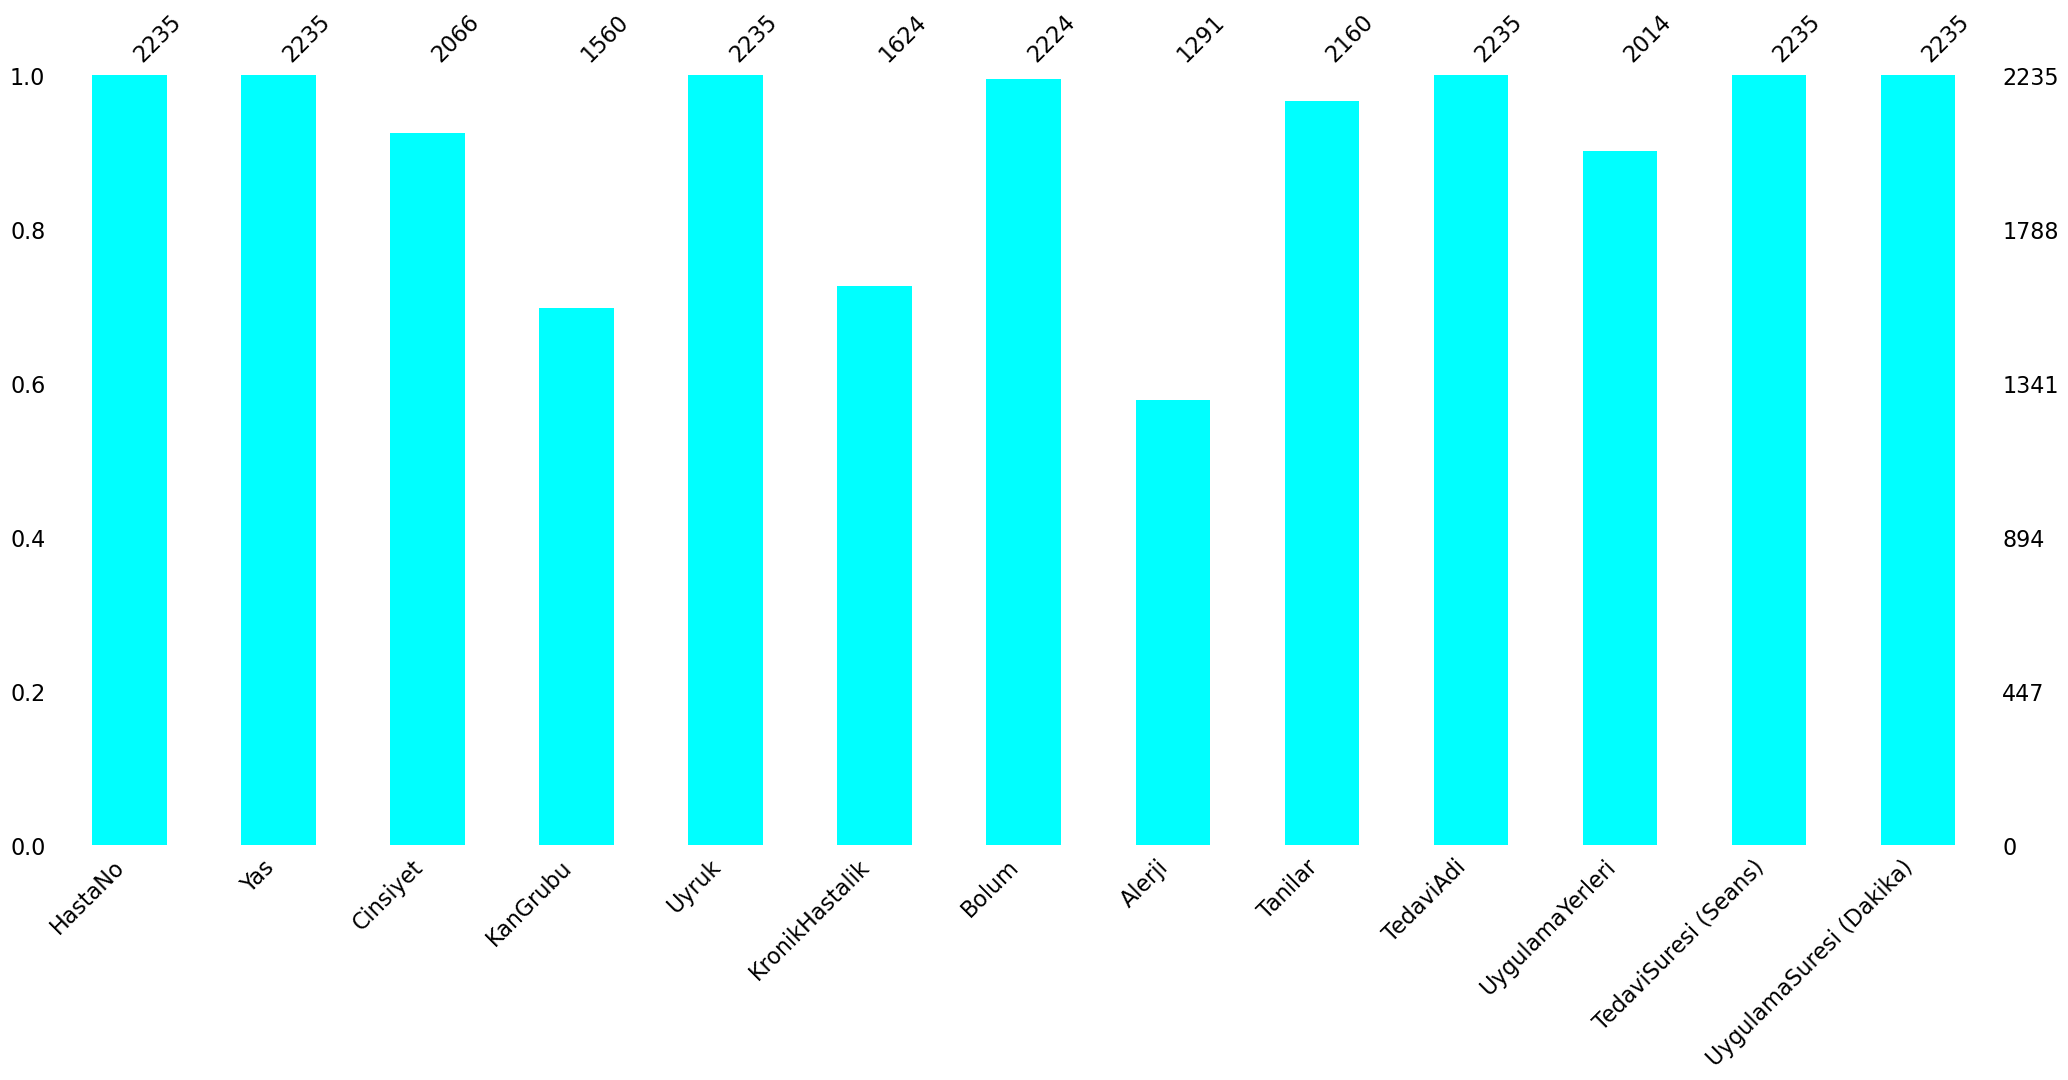

In [130]:
# Eksik değerlerin görselleştirilmesi
import missingno as msno
plt.figure(figsize=(12,5))
msno.bar(data, color = "aqua")
plt.show()

* `Alerji`, `KanGrubu`, `KronikHastalik`, `UygulamaYerleri`, `Cinsiyet`,`Tanilar`,`Tanilar` sütunlarında eksik değerler söz konusu bunlar üstünde işlemleri gerçekleştirmemiz gerekiyor. Öncelikle kendi verimiz içerisinde tekrarlanan hastalardan yola çıkarak burada bulunan eksik değerleri doldurabilirmiyiz ona bakalım. 

## Data Pre-Processing (Veri Ön İşleme)

In [131]:
# Tekrarlanan hasta kayıtlarını bulalım
tekrarlanan_kayitlar = data['HastaNo'].value_counts()
tekrarlanan_hastalar = tekrarlanan_kayitlar[tekrarlanan_kayitlar > 1]

print("Birden fazla kaydı olan hasta sayısı:", len(tekrarlanan_hastalar))
print("\nHer bir tekrarlanan hastanın kayıt sayısı:")
tekrarlanan_hastalar

Birden fazla kaydı olan hasta sayısı: 392

Her bir tekrarlanan hastanın kayıt sayısı:


HastaNo
145267    27
145307    26
145343    20
145453    18
145201    17
          ..
145502     2
145349     2
145353     2
145308     2
145305     2
Name: count, Length: 392, dtype: int64

In [132]:
# Detaylı bilgi için örnek bir hastayı inceleyelim
print("\nÖrnek olarak en çok tekrar eden hastanın bilgileri:")
ornek_hasta = tekrarlanan_hastalar.index[0]
print(f"\n{ornek_hasta} numaralı hastanın kayıtları:")
data[data['HastaNo'] == ornek_hasta]


Örnek olarak en çok tekrar eden hastanın bilgileri:

145267 numaralı hastanın kayıtları:


HastaNo  Yas Cinsiyet KanGrubu    Uyruk  \
726   145267   48    Kadın    0 Rh+  Tokelau   
727   145267   48    Kadın    0 Rh+  Tokelau   
728   145267   48    Kadın    0 Rh+  Tokelau   
729   145267   48    Kadın    0 Rh+  Tokelau   
730   145267   48    Kadın    0 Rh+  Tokelau   
731   145267   48    Kadın    0 Rh+  Tokelau   
732   145267   48    Kadın    0 Rh+  Tokelau   
733   145267   48    Kadın    0 Rh+  Tokelau   
734   145267   48    Kadın    0 Rh+  Tokelau   
735   145267   48    Kadın    0 Rh+  Tokelau   
736   145267   48    Kadın    0 Rh+  Tokelau   
737   145267   48    Kadın    0 Rh+  Tokelau   
738   145267   48    Kadın    0 Rh+  Tokelau   
739   145267   48    Kadın    0 Rh+  Tokelau   
740   145267   48    Kadın    0 Rh+  Tokelau   
741   145267   48    Kadın    0 Rh+  Tokelau   
742   145267   48    Kadın    0 Rh+  Tokelau   
743   145267   48    Kadın    0 Rh+  Tokelau   
744   145267   48    Kadın    0 Rh+  Tokelau   
745   145267   48    Kadın    0 Rh+  Tokelau   
746   145267   48    Kadın    0 Rh+  Tokelau   
747   145267   48    Kadın    0 Rh+  Tokelau   
748   145267   48    Kadın    0 Rh+  Tokelau   
749   145267   48    Kadın    0 Rh+  Tokelau   
750   145267   48    Kadın    0 Rh+  Tokelau   
751   145267   48    Kadın    0 Rh+  Tokelau   
752   145267   48    Kadın    0 Rh+  Tokelau   

                                        KronikHastalik  \
726  Limb-Girdle Musküler Distrofi, Kalp yetmezliği...   
727  Limb-Girdle Musküler Distrofi, Kalp yetmezliği...   
728  Limb-Girdle Musküler Distrofi, Kalp yetmezliği...   
729  Limb-Girdle Musküler Distrofi, Kalp yetmezliği...   
730  Limb-Girdle Musküler Distrofi, Kalp yetmezliği...   
731  Limb-Girdle Musküler Distrofi, Kalp yetmezliği...   
732  Limb-Girdle Musküler Distrofi, Kalp yetmezliği...   
733  Limb-Girdle Musküler Distrofi, Kalp yetmezliği...   
734  Limb-Girdle Musküler Distrofi, Kalp yetmezliği...   
735  Limb-Girdle Musküler Distrofi, Kalp yetmezliği...   
736  Limb-Girdle Musküler Distrofi, Kalp yetmezliği...   
737  Limb-Girdle Musküler Distrofi, Kalp yetmezliği...   
738  Limb-Girdle Musküler Distrofi, Kalp yetmezliği...   
739  Limb-Girdle Musküler Distrofi, Kalp yetmezliği...   
740  Limb-Girdle Musküler Distrofi, Kalp yetmezliği...   
741  Limb-Girdle Musküler Distrofi, Kalp yetmezliği...   
742  Limb-Girdle Musküler Distrofi, Kalp yetmezliği...   
743  Limb-Girdle Musküler Distrofi, Kalp yetmezliği...   
744  Limb-Girdle Musküler Distrofi, Kalp yetmezliği...   
745  Limb-Girdle Musküler Distrofi, Kalp yetmezliği...   
746  Limb-Girdle Musküler Distrofi, Kalp yetmezliği...   
747  Limb-Girdle Musküler Distrofi, Kalp yetmezliği...   
748  Limb-Girdle Musküler Distrofi, Kalp yetmezliği...   
749  Limb-Girdle Musküler Distrofi, Kalp yetmezliği...   
750  Limb-Girdle Musküler Distrofi, Kalp yetmezliği...   
751  Limb-Girdle Musküler Distrofi, Kalp yetmezliği...   
752  Limb-Girdle Musküler Distrofi, Kalp yetmezliği...   

                                              Bolum Alerji Tanilar  \
726  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    NaN     NaN   
727  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    NaN     NaN   
728  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    NaN     NaN   
729  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    NaN     NaN   
730  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    NaN     NaN   
731  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    NaN     NaN   
732  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    NaN     NaN   
733  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    NaN     NaN   
734  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    NaN     NaN   
735  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    NaN     NaN   
736  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    NaN     NaN   
737  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    NaN     NaN   
738  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    NaN     NaN   
739  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    

In [133]:
# Tekrarlanan kayıtların genel istatistikleri
print("Tekrarlanan Hasta kayıtlarının özeti:")
print(f"Toplam hasta sayısı: {len(data['HastaNo'].unique())}")
print(f"Toplam kayıt sayısı: {len(data)}")
print(f"Birden fazla kaydı olan hasta sayısı: {len(tekrarlanan_hastalar)}")
print(f"Tekrarlanan kayıtların toplam sayısı: {len(data) - len(data['HastaNo'].unique())}")

Tekrarlanan Hasta kayıtlarının özeti:
Toplam hasta sayısı: 404
Toplam kayıt sayısı: 2235
Birden fazla kaydı olan hasta sayısı: 392
Tekrarlanan kayıtların toplam sayısı: 1831


In [134]:
# Tekrarlanan kayıtların dağılımı
print("Tekrar sayılarının dağılımı:")
tekrar_dagilimi = tekrarlanan_kayitlar[tekrarlanan_kayitlar > 1].value_counts().sort_index()
tekrar_dagilimi.to_list()

Tekrar sayılarının dağılımı:


[19, 20, 18, 246, 22, 16, 5, 4, 27, 3, 3, 1, 2, 1, 1, 1, 1, 1, 1]

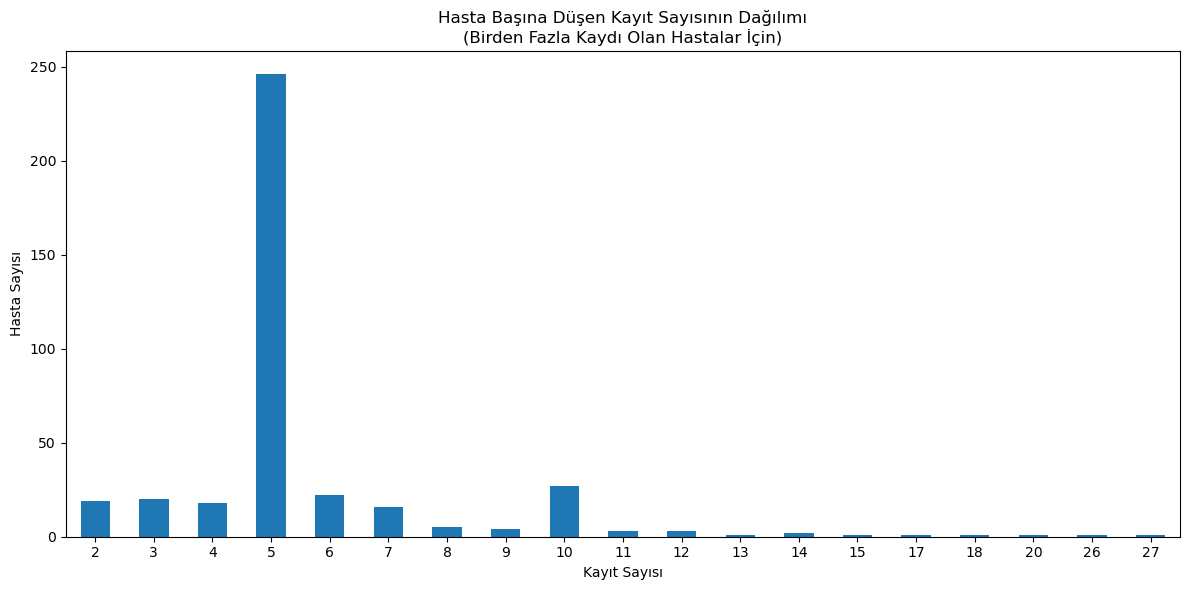

In [135]:
# Görselleştirme
plt.figure(figsize=(12, 6))
tekrar_dagilimi.plot(kind='bar')
plt.title('Hasta Başına Düşen Kayıt Sayısının Dağılımı\n(Birden Fazla Kaydı Olan Hastalar İçin)')
plt.xlabel('Kayıt Sayısı')
plt.ylabel('Hasta Sayısı')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [136]:
# Tekrarlanan kayıtlarda değişen alanları analiz edelim
def analyze_changes(hasta_id):
    hasta_kayitlari = data[data['HastaNo'] == hasta_id].copy()
    
    if len(hasta_kayitlari) <= 1:
        return {}
    
    degisenler = {}
    for column in data.columns:
        if column == 'HastaNo':  # HastaNo'yu kontrol etmeye gerek yok
            continue
            
        unique_values = hasta_kayitlari[column].unique()
        if len(unique_values) > 1:  # Eğer farklı değerler varsa
            degisenler[column] = list(unique_values)
    
    return degisenler

# En çok tekrar eden birkaç hasta için değişen alanları inceleyelim
print("En çok tekrar eden hastaların kayıtlarında değişen alanlar:")
for hasta_id in tekrarlanan_hastalar.head().index:
    print(f"\nHasta No {hasta_id} için değişen alanlar:")
    degisenler = analyze_changes(hasta_id)
    if not degisenler:
        print("Değişen alan yok.")
        continue
    for field, values in degisenler.items():
        print(f"{field}: {values}")

En çok tekrar eden hastaların kayıtlarında değişen alanlar:

Hasta No 145267 için değişen alanlar:
TedaviAdi: ['Serebral Palsi', 'Travmatik beyin yaralanması', 'Parapleji-Tetrapleji', 'İV DİSK BOZUKLUĞU-BEL-1', 'İV DİSK BOZUKLUĞU-BEL-2', 'Gonartroz-Meniskopati', 'Bilateral Diz Eklem İmplantı']
UygulamaYerleri: [nan, 'Yüz', 'Tüm Vücut Bölgesi', 'Bel,Tüm Vücut Bölgesi', 'Bel', 'Diz', 'Sağ Diz Bölgesi,Sol Diz Bölgesi']
TedaviSuresi (Seans): [20, 30, 15]
UygulamaSuresi (Dakika): [20, 10, 30, 5]

Hasta No 145307 için değişen alanlar:
Tanilar: ['Ekstremite ağrısı, bacak,Spondilolistezis', 'Ekstremite ağrısı,bacak,Spondilolistezis', 'Ekstremite ağrısı, bacak,Spondilolistezis,Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE', 'Ekstremite ağrısı, bacak,Spondilolistezis,Omuzun darbe sendromu\xa0,DORSALJİ,\xa0DİĞER, SERVİKOTORASİK BÖLGE', '\xa0Ekstremite ağrısı,\xa0bacak,Spondilolistezis,Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE', 'Ekstremite ağrısı,bacak,Spondilolist

In [137]:
# Tekrarlanan kayıtlardaki değişimlerin detaylı analizi
def analyze_patient_records(hasta_id):
    # Hastanın tüm kayıtlarını alalım
    hasta_data = data[data['HastaNo'] == hasta_id].copy()
    
    # Her sütun için analiz yapalım
    analysis = {}
    for column in data.columns:
        if column == 'HastaNo':  # HastaNo'yu analiz etmeye gerek yok
            continue
            
        # Sütundaki değerleri alalım (NaN değerler hariç)
        values = hasta_data[column].dropna().unique()
        
        # Eğer sütunda değer varsa analize ekleyelim
        if len(values) > 0:
            analysis[column] = {
                'unique_values': list(values),
                'value_count': len(values),
                'has_nan': hasta_data[column].isnull().any(),
                'nan_count': hasta_data[column].isnull().sum(),
                'total_records': len(hasta_data)
            }
    
    return analysis

# İlk 5 tekrarlanan hasta için detaylı analiz
print("Tekrarlanan kayıtların detaylı analizi:")
for hasta_id in tekrarlanan_hastalar.head().index:
    print(f"\nHasta No {hasta_id} Analizi:")
    print(f"Toplam Kayıt Sayısı: {len(data[data['HastaNo'] == hasta_id])}")
    
    analysis = analyze_patient_records(hasta_id)
    for column, details in analysis.items():
        if details['has_nan'] or details['value_count'] > 1:  # Sadece değişen veya NaN içeren alanları gösterelim
            print(f"\n{column}:")
            print(f"  Benzersiz Değerler: {details['unique_values']}")
            print(f"  Benzersiz Değer Sayısı: {details['value_count']}")
            print(f"  NaN Var mı: {details['has_nan']}")
            print(f"  NaN Sayısı: {details['nan_count']}")
            print(f"  Dolu Değer Sayısı: {details['total_records'] - details['nan_count']}")

Tekrarlanan kayıtların detaylı analizi:

Hasta No 145267 Analizi:
Toplam Kayıt Sayısı: 27

TedaviAdi:
  Benzersiz Değerler: ['Serebral Palsi', 'Travmatik beyin yaralanması', 'Parapleji-Tetrapleji', 'İV DİSK BOZUKLUĞU-BEL-1', 'İV DİSK BOZUKLUĞU-BEL-2', 'Gonartroz-Meniskopati', 'Bilateral Diz Eklem İmplantı']
  Benzersiz Değer Sayısı: 7
  NaN Var mı: False
  NaN Sayısı: 0
  Dolu Değer Sayısı: 27

UygulamaYerleri:
  Benzersiz Değerler: ['Yüz', 'Tüm Vücut Bölgesi', 'Bel,Tüm Vücut Bölgesi', 'Bel', 'Diz', 'Sağ Diz Bölgesi,Sol Diz Bölgesi']
  Benzersiz Değer Sayısı: 6
  NaN Var mı: True
  NaN Sayısı: 11
  Dolu Değer Sayısı: 16

TedaviSuresi (Seans):
  Benzersiz Değerler: [20, 30, 15]
  Benzersiz Değer Sayısı: 3
  NaN Var mı: False
  NaN Sayısı: 0
  Dolu Değer Sayısı: 27

UygulamaSuresi (Dakika):
  Benzersiz Değerler: [20, 10, 30, 5]
  Benzersiz Değer Sayısı: 4
  NaN Var mı: False
  NaN Sayısı: 0
  Dolu Değer Sayısı: 27

Hasta No 145307 Analizi:
Toplam Kayıt Sayısı: 26

Tanilar:
  Benzersiz De

In [138]:
# Tüm tekrarlanan kayıtlar için özet istatistik
all_changes = {}
nan_fills = {}

for hasta_id in tekrarlanan_hastalar.index:
    hasta_data = data[data['HastaNo'] == hasta_id].copy()
    
    # Her sütun için değişimleri kontrol edelim
    for column in data.columns:
        if column == 'HastaNo':
            continue
            
        # NaN olmayan benzersiz değerler
        values = hasta_data[column].dropna().unique()
        
        # Değişim varsa kaydet
        if len(values) > 1:
            if column not in all_changes:
                all_changes[column] = 0
            all_changes[column] += 1
        
        # NaN doldurma potansiyeli varsa kaydet
        if hasta_data[column].isnull().any() and len(values) > 0:
            if column not in nan_fills:
                nan_fills[column] = 0
            nan_fills[column] += 1

print("Tekrarlanan kayıtlarda değişen alanların özeti:")
for column, count in all_changes.items():
    print(f"{column}: {count} hastada değişiyor")

Tekrarlanan kayıtlarda değişen alanların özeti:
TedaviAdi: 78 hastada değişiyor
UygulamaYerleri: 102 hastada değişiyor
TedaviSuresi (Seans): 38 hastada değişiyor
UygulamaSuresi (Dakika): 363 hastada değişiyor
Tanilar: 132 hastada değişiyor
Bolum: 16 hastada değişiyor
KronikHastalik: 4 hastada değişiyor


In [139]:
print("NaN değerleri doldurulabilecek alanların özeti:")
for column, count in nan_fills.items():
    print(f"{column}: {count} hastada NaN değerler doldurulabilir")

NaN değerleri doldurulabilecek alanların özeti:
UygulamaYerleri: 69 hastada NaN değerler doldurulabilir
Tanilar: 3 hastada NaN değerler doldurulabilir
KanGrubu: 16 hastada NaN değerler doldurulabilir
KronikHastalik: 1 hastada NaN değerler doldurulabilir
Cinsiyet: 7 hastada NaN değerler doldurulabilir


In [140]:
# Aynı hastanın kayıtlarından NaN değerleri dolduran fonksiyon
def fill_from_same_patient(df):
    # Veri setinin bir kopyasını oluşturalım
    filled_df = df.copy()
    
    # Değişmeyen özellikler (hasta bazında sabit olmalı)
    constant_columns = ['Cinsiyet', 'KanGrubu', 'Yas', 'Uyruk']
    
    # Her hasta için işlem yapalım
    for hasta_id in df['HastaNo'].unique():
        # Hastanın tüm kayıtlarını alalım
        patient_mask = filled_df['HastaNo'] == hasta_id
        patient_records = filled_df[patient_mask]
        
        # Eğer birden fazla kayıt varsa
        if len(patient_records) > 1:
            # Sabit sütunlar için
            for col in constant_columns:
                # NaN olmayan değerleri alalım
                non_null_values = patient_records[col].dropna().unique()
                # Eğer değer varsa ve NaN değerler de varsa
                if len(non_null_values) > 0 and patient_records[col].isnull().any():
                    # İlk değeri kullanalım
                    filled_df.loc[patient_mask, col] = non_null_values[0]
            
            # Diğer sütunlar için (KronikHastalik, Alerji, Tanilar)
            other_columns = ['KronikHastalik', 'Alerji', 'Tanilar']
            for col in other_columns:
                # NaN olmayan değerleri birleştirelim
                non_null_values = patient_records[col].dropna().unique()
                if len(non_null_values) > 0 and patient_records[col].isnull().any():
                    # Birden fazla değer varsa virgülle birleştirelim
                    combined_value = ', '.join(sorted(set([str(v) for v in non_null_values])))
                    # Sadece NaN olanları dolduralım
                    filled_df.loc[patient_mask & filled_df[col].isnull(), col] = combined_value
    
    return filled_df

# Fonksiyonu uygulayalım
data_filled = fill_from_same_patient(data)
data_filled

HastaNo  Yas Cinsiyet KanGrubu    Uyruk  \
0      145134   60    Kadın    0 Rh+  Türkiye   
1      145135   28    Erkek    0 Rh+  Türkiye   
2      145135   28    Erkek    0 Rh+  Türkiye   
3      145135   28    Erkek    0 Rh+  Türkiye   
4      145135   28    Erkek    0 Rh+  Türkiye   
...       ...  ...      ...      ...      ...   
2230   145536   48    Erkek      NaN  Türkiye   
2231   145536   48    Erkek      NaN  Türkiye   
2232   145537   33    Kadın    A Rh+  Türkiye   
2233   145537   33    Kadın    A Rh+  Türkiye   
2234   145537   33    Kadın    A Rh+  Türkiye   

                                         KronikHastalik  \
0     Becker Musküler Distrofisi, Hiportiroidizm, Ka...   
1     Duchenne Musküler Distrofisi, Myastenia gravis...   
2     Duchenne Musküler Distrofisi, Myastenia gravis...   
3     Duchenne Musküler Distrofisi, Myastenia gravis...   
4     Duchenne Musküler Distrofisi, Myastenia gravis...   
...                                                 ...   
2230  Aritmi, Myastenia gravis, Fascioscapulohumeral...   
2231  Aritmi, Myastenia gravis, Fascioscapulohumeral...   
2232                                                NaN   
2233                                                NaN   
2234                                                NaN   

                                               Bolum            Alerji  \
0     Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi               TOZ   
1     Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi               NaN   
2     Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi               NaN   
3     Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi               NaN   
4     Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi               NaN   
...                                              ...               ...   
2230  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi  ARVELES,CORASPIN   
2231  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi  ARVELES,CORASPIN   
2232  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi             Sucuk   
2233  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi             Sucuk   
2234  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi             Sucuk   

                                                Tanilar  \
0            Ayak bileği ve ayağın yüzeysel yaralanması   
1     Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...   
2     Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...   
3     Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...   
4     Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...   
...                                                 ...   
2230                                Eklemin kontraktürü   
2231                                Eklemin kontraktürü   
2232  Aşil tendon yaralanması,​Algonörodistrofi,​ ay...   
2233  Aşil tendon yaralanması,Algonörodistrofi, ayak...   
2234  Aşil tendon yaralanması,Algonörodistrofi, ayak...   

                             TedaviAdi          UygulamaYerleri  \
0                          Ayak Bileği              Ayak Bileği   
1      Dorsalji -Boyun+trapez+skapular                    Boyun   
2      Dorsalji -Boyun+trapez+skapular               Boyun,Sırt   
3      Dorsalji -Boyun+trapez+skapular                    Boyun   
4      Dorsalji -Boyun+trapez+skapular               Boyun,Sırt   
...                                ...                      ...   
2230  Ekstansör tendon Rehabilitasyon      Sol El Bilek Bölgesi   
2231  Ekstansör tendon Rehabilitasyon      Sol El Bilek Bölgesi   
2232      Aşil Rüptürü Rehabilitasyonu  Sol Ayak Bileği Bölgesi   
2233      Aşil Rüptürü Rehabilitasyonu  Sol Ayak Bileği Bölgesi   
2234      Aşil Rüptürü Rehabilitasyonu  Sol Ayak Bileği Bölgesi   

      TedaviSuresi (Seans)  UygulamaSuresi (Dakika)  
0                        5                       20  
1                       15                       20  
2                       15                       20  
3                       15                        5  
4                       15         

In [141]:
# Değişiklikleri görelim
print("Orijinal veri setindeki NaN değerleri:")
print(data.isnull().sum())
print("\nDoldurma sonrası NaN değerleri:")
print(data_filled.isnull().sum())

Orijinal veri setindeki NaN değerleri:
HastaNo                      0
Yas                          0
Cinsiyet                   169
KanGrubu                   675
Uyruk                        0
KronikHastalik             611
Bolum                       11
Alerji                     944
Tanilar                     75
TedaviAdi                    0
UygulamaYerleri            221
TedaviSuresi (Seans)         0
UygulamaSuresi (Dakika)      0
dtype: int64

Doldurma sonrası NaN değerleri:
HastaNo                      0
Yas                          0
Cinsiyet                   145
KanGrubu                   644
Uyruk                        0
KronikHastalik             606
Bolum                       11
Alerji                     944
Tanilar                     62
TedaviAdi                    0
UygulamaYerleri            221
TedaviSuresi (Seans)         0
UygulamaSuresi (Dakika)      0
dtype: int64


In [142]:
# Hangi hastalarda ne kadar değer doldurulduğunu görelim
filled_counts = {}
for column in ['Cinsiyet', 'KanGrubu', 'KronikHastalik', 'Alerji', 'Tanilar']:
    # Orijinal ve doldurulmuş veri setindeki NaN sayılarını karşılaştıralım
    original_nulls = data[column].isnull().sum()
    filled_nulls = data_filled[column].isnull().sum()
    filled_count = original_nulls - filled_nulls
    
    if filled_count > 0:
        filled_counts[column] = {
            'Doldurulan Değer Sayısı': filled_count,
            'Orijinal NaN Sayısı': original_nulls,
            'Kalan NaN Sayısı': filled_nulls,
        }

print("Doldurma İstatistikleri:")
for column, stats in filled_counts.items():
    print(f"\n{column}:")
    for key, value in stats.items():
        print(f"  {key}: {value}")

Doldurma İstatistikleri:

Cinsiyet:
  Doldurulan Değer Sayısı: 24
  Orijinal NaN Sayısı: 169
  Kalan NaN Sayısı: 145

KanGrubu:
  Doldurulan Değer Sayısı: 31
  Orijinal NaN Sayısı: 675
  Kalan NaN Sayısı: 644

KronikHastalik:
  Doldurulan Değer Sayısı: 5
  Orijinal NaN Sayısı: 611
  Kalan NaN Sayısı: 606

Tanilar:
  Doldurulan Değer Sayısı: 13
  Orijinal NaN Sayısı: 75
  Kalan NaN Sayısı: 62


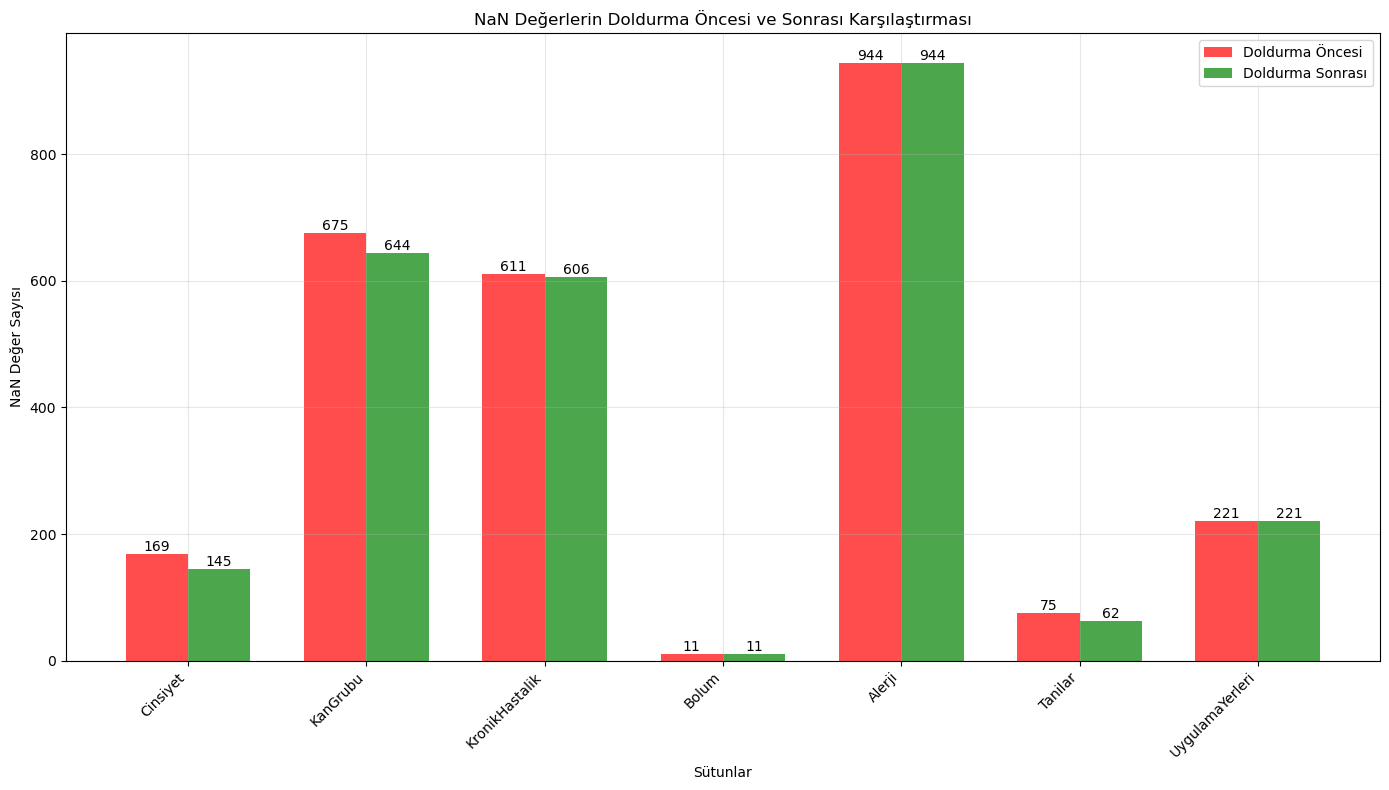

In [143]:
# NaN değerlerin doldurma öncesi ve sonrası karşılaştırması
# Orijinal ve doldurulmuş veri setindeki NaN sayıları
original_nulls = data.isnull().sum()
filled_nulls = data_filled.isnull().sum()

# Sadece NaN değeri olan sütunları alalım
columns_with_nulls = original_nulls[original_nulls > 0].index

# Görselleştirme için veri hazırlama
x = np.arange(len(columns_with_nulls))
width = 0.35

fig, (ax1) = plt.subplots(1, 1, figsize=(14, 8))

# İlk grafik: Bar plot karşılaştırması
bars1 = ax1.bar(x - width/2, original_nulls[columns_with_nulls], width, 
                label='Doldurma Öncesi', color='red', alpha=0.7)
bars2 = ax1.bar(x + width/2, filled_nulls[columns_with_nulls], width, 
                label='Doldurma Sonrası', color='green', alpha=0.7)

ax1.set_xlabel('Sütunlar')
ax1.set_ylabel('NaN Değer Sayısı')
ax1.set_title('NaN Değerlerin Doldurma Öncesi ve Sonrası Karşılaştırması')
ax1.set_xticks(x)
ax1.set_xticklabels(columns_with_nulls, rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Bar'ların üzerine değerleri yazdırma
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

* Burada görüldüğü üzere `Bolum`, `Alerji` ve `UygulamaYerleri` sütunlarında eksik değerleri elimizde bulunan birden fazla hasta kaydı olmasına rağmen dolduramamış bulunmaktayız. Bu sütunlara ayrı bir işlem gerçekleştirmemiz gerekmektedir. 

In [144]:
data_filled.columns.to_list()

['HastaNo',
 'Yas',
 'Cinsiyet',
 'KanGrubu',
 'Uyruk',
 'KronikHastalik',
 'Bolum',
 'Alerji',
 'Tanilar',
 'TedaviAdi',
 'UygulamaYerleri',
 'TedaviSuresi (Seans)',
 'UygulamaSuresi (Dakika)']

In [145]:
# TedaviAdi'na göre Bolum, UygulamaYerleri ve Tanilar'ı doldurma
# Aynı tedaviyi gören hastaların aynı bölüm, uygulama yerleri ve tanıları olması mantıklı

# Her TedaviAdi için en yaygın Bolum, UygulamaYerleri ve Tanilar'ı bulalım
most_common_by_tedavi = data_filled.groupby("TedaviAdi").agg({
    "UygulamaYerleri": lambda x: x.mode().iloc[0] if not x.mode().empty else "Bilinmiyor",
    "Bolum": lambda x: x.mode().iloc[0] if not x.mode().empty else "Bilinmiyor",
    "Tanilar": lambda x: x.mode().iloc[0] if not x.mode().empty else "Bilinmiyor"
})

print("TedaviAdi'na göre en yaygın değerler:")
most_common_by_tedavi.head(10)

TedaviAdi'na göre en yaygın değerler:


UygulamaYerleri  \
TedaviAdi                                                          
1. Parmak CMC eklem ağrısı                  Sağ El Bilek Bölgesi   
1. parmak bağ ve volar plak yaralanması     Sağ El Bilek Bölgesi   
5. metatars fissürü+bağ lezyonu          Sağ Ayak Bileği Bölgesi   
Aksiller web sendromu+kontraktür                Sol Omuz Bölgesi   
Algonörodistrofi Sol Ayak                Sol Ayak Bileği Bölgesi   
Algonörodistrofi Sol ayak                Sol Ayak Bileği Bölgesi   
Algonörodistrofi Sol el                     Sol El Bilek Bölgesi   
Alt ekstremite atrofi+yürüme                   Tüm Vücut Bölgesi   
Alt ekstremite atrofi-                                Bilinmiyor   
Alt ekstremite atrofi-Bilateral                Tüm Vücut Bölgesi   

                                                                                  Bolum  \
TedaviAdi                                                                                 
1. Parmak CMC eklem ağrısı               Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi   
1. parmak bağ ve volar plak yaralanması  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi   
5. metatars fissürü+bağ lezyonu          Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi   
Aksiller web sendromu+kontraktür         Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi   
Algonörodistrofi Sol Ayak                Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi   
Algonörodistrofi Sol ayak                Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi   
Algonörodistrofi Sol el                  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi   
Alt ekstremite atrofi+yürüme                                    Kalp Ve Damar Cerrahisi   
Alt ekstremite atrofi-                   Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi   
Alt ekstremite atrofi-Bilateral                                         İç Hastalıkları   

                                                                                   Tanilar  
TedaviAdi                                                                                   
1. Parmak CMC eklem ağrısı               El bileği ve el düzeyinde baş parmak ekstansör...  
1. parmak bağ ve volar plak yaralanması  El bileği ve el düzeyinde baş parmak intirinsi...  
5. metatars fissürü+bağ lezyonu          Metatarsalji,DORSALJİ, DİĞER, BİRDEN FAZLA YER...  
Aksiller web sendromu+kontraktür                                       Eklemin kontraktürü  
Algonörodistrofi Sol Ayak                  Algonörodistrofi,Ayak kırığı, ayak bileği hariç  
Algonörodistrofi Sol ayak                                                 Algonörodistrofi  
Algonörodistrofi Sol el                  El bileği ve el düzeyinde kas ve tendon yarala...  
Alt ekstremite atrofi+yürüme             Mitral ve triküspid kapak bozuklukları,Atrial ...  
Alt ekstremite atrofi-                             Aşil tendiniti,Kasın diğer bozuklukları  
Alt ekstremite atrofi-Bilateral          Kas bozuklukları, başka yerde sınıflanmış hast...

In [146]:
# TedaviAdi'na göre eksik değerleri dolduran fonksiyon (Tanilar dahil)
def fill_by_tedavi(row):
    tedavi = row["TedaviAdi"]
    
    # UygulamaYerleri eksikse
    if pd.isna(row["UygulamaYerleri"]):
        row["UygulamaYerleri"] = most_common_by_tedavi.loc[tedavi, "UygulamaYerleri"]
    
    # Bolum eksikse
    if pd.isna(row["Bolum"]):
        row["Bolum"] = most_common_by_tedavi.loc[tedavi, "Bolum"]
    
    # Tanilar eksikse
    if pd.isna(row["Tanilar"]):
        row["Tanilar"] = most_common_by_tedavi.loc[tedavi, "Tanilar"]
    
    return row

# Eksikleri doldur
data_filled = data_filled.apply(fill_by_tedavi, axis=1)

# Kontrol: eksik değer sayısı
print("Doldurma sonrası eksik değer sayıları:")
data_filled[["UygulamaYerleri", "Bolum", "Tanilar"]].isnull().sum()

Doldurma sonrası eksik değer sayıları:


UygulamaYerleri    0
Bolum              0
Tanilar            0
dtype: int64

In [147]:
# Genel eksik değer durumunu kontrol edelim
print("Tüm sütunlardaki eksik değer sayıları:")
print(data_filled.isnull().sum())

print("\nDoldurma işlemleri öncesi ve sonrası karşılaştırma:")
comparison_df = pd.DataFrame({
    'Orijinal_Eksik': data.isnull().sum(),
    'Sonraki_Eksik': data_filled.isnull().sum()
})
comparison_df['Doldurulan'] = comparison_df['Orijinal_Eksik'] - comparison_df['Sonraki_Eksik']
print(comparison_df[comparison_df['Doldurulan'] > 0])

Tüm sütunlardaki eksik değer sayıları:
HastaNo                      0
Yas                          0
Cinsiyet                   145
KanGrubu                   644
Uyruk                        0
KronikHastalik             606
Bolum                        0
Alerji                     944
Tanilar                      0
TedaviAdi                    0
UygulamaYerleri              0
TedaviSuresi (Seans)         0
UygulamaSuresi (Dakika)      0
dtype: int64

Doldurma işlemleri öncesi ve sonrası karşılaştırma:
                 Orijinal_Eksik  Sonraki_Eksik  Doldurulan
Cinsiyet                    169            145          24
KanGrubu                    675            644          31
KronikHastalik              611            606           5
Bolum                        11              0          11
Tanilar                      75              0          75
UygulamaYerleri             221              0         221


In [148]:
# Genel eksik değer durumunu kontrol edelim
print("Tüm sütunlardaki eksik değer sayıları:")
print(data_filled.isnull().sum())

print("\nDoldurma işlemi öncesi ve sonrası karşılaştırma:")
comparison_df = pd.DataFrame({
    'Önceki_Eksik': data.isnull().sum(),
    'Sonraki_Eksik': data_filled.isnull().sum()
})
comparison_df['Doldurulan'] = comparison_df['Önceki_Eksik'] - comparison_df['Sonraki_Eksik']
print(comparison_df[comparison_df['Doldurulan'] > 0])

Tüm sütunlardaki eksik değer sayıları:
HastaNo                      0
Yas                          0
Cinsiyet                   145
KanGrubu                   644
Uyruk                        0
KronikHastalik             606
Bolum                        0
Alerji                     944
Tanilar                      0
TedaviAdi                    0
UygulamaYerleri              0
TedaviSuresi (Seans)         0
UygulamaSuresi (Dakika)      0
dtype: int64

Doldurma işlemi öncesi ve sonrası karşılaştırma:
                 Önceki_Eksik  Sonraki_Eksik  Doldurulan
Cinsiyet                  169            145          24
KanGrubu                  675            644          31
KronikHastalik            611            606           5
Bolum                      11              0          11
Tanilar                    75              0          75
UygulamaYerleri           221              0         221


In [149]:
data_filled["Alerji"].unique()

array(['TOZ', nan, 'POLEN,NOVALGIN', 'NOVALGIN', 'Polen', 'Toz',
       'Polen,Yer Fıstığı', 'POLEN', 'TOZ,Novalgin', 'Sucuk', 'Volteren',
       'ARVELES,CORASPIN', 'VOLTAREN,Toz', 'Polen,Toz', 'GRİPİN',
       'Novalgin', 'VOLTAREN', 'Toz,TOZ', 'NOVALGIN,Novalgin', 'SUCUK',
       'TOZ,POLEN', 'TOZ,GRİPİN', 'SUCUK,GRIPIN', 'Novalgin,Sucuk',
       'VOLTAREN,Polen', 'Voltaren', 'GRIPIN', 'Polen,NOVALGIN',
       'Polen,TOZ', 'VOLTAREN,POLEN', 'POLEN,TOZ', 'NOVALGIN,Polen',
       'POLEN,Voltaren', 'Polen,GRIPIN', 'Volteren,GRİPİN',
       'TOZ,VOLTAREN', 'Novalgin,Polen', 'Voltaren,POLEN',
       'Polen,Voltaren'], dtype=object)

In [150]:
# Alerji sütunundaki mevcut değerleri inceleyelim
print("Alerji sütunundaki unique değerler:")
print(data_filled['Alerji'].value_counts().head(20))

print("\nAlerji sütunundaki eksik değer sayısı:")
print(data_filled['Alerji'].isnull().sum())

Alerji sütunundaki unique değerler:
Alerji
Polen                198
POLEN                134
Toz                  119
ARVELES,CORASPIN     102
Sucuk                 91
NOVALGIN              90
Polen,Yer Fıstığı     83
TOZ                   74
SUCUK                 73
Novalgin              49
GRİPİN                47
Volteren              30
Voltaren              26
GRIPIN                22
VOLTAREN              19
POLEN,TOZ             13
VOLTAREN,Polen        11
Toz,TOZ                9
TOZ,Novalgin           7
Polen,NOVALGIN         7
Name: count, dtype: int64

Alerji sütunundaki eksik değer sayısı:
944


In [151]:
# Alerji sütunundaki anormallikleri düzeltelim
# Hepsi aynı formatta olacak şekilde düzeltiyorum.
data_filled['Alerji'] = data_filled['Alerji'].apply(
    lambda x: ','.join([i.strip().title() for i in str(x).split(',')]) if pd.notna(x) else np.nan
)

In [152]:
# Alerji sütunundaki tekrarlanan ve yanlış yazılmış değerleri düzeltelim
replace_alerji = {
    'Toz,Toz': 'Toz',
    'Novalgin,Novalgin': 'Novalgin',
    'Polen,Novalgin': 'Novalgin,Polen',
    'Polen,Toz': 'Toz,Polen',
    'Gri̇Pi̇N': 'Gripin',
    'Toz,Gri̇Pi̇N': 'Toz,Gripin',
    'Volteren,Gri̇Pi̇N': 'Volteren,Gripin',
    'Voltaren,Toz': 'Toz,Voltaren',
    'Volteren': 'Voltaren',
    'Voltaren,Polen': 'Polen,Voltaren',
    'Volteren,Gripin': 'Voltaren,Gripin'
}

# Düzeltme işlemini uygula
data_filled['Alerji'] = data_filled['Alerji'].replace(replace_alerji)

print("Düzeltme sonrası unique değerler:")
data_filled['Alerji'].value_counts().head(15)

Düzeltme sonrası unique değerler:


Alerji
Polen                332
Toz                  202
Sucuk                164
Novalgin             144
Arveles,Coraspin     102
Polen,Yer Fıstığı     83
Voltaren              75
Gri̇pi̇n              47
Polen,Voltaren        31
Toz,Polen             28
Gripin                22
Novalgin,Polen        21
Toz,Voltaren          10
Toz,Novalgin           7
Sucuk,Gripin           5
Name: count, dtype: int64

In [153]:
# Alerji sütununda çok fazla NaN değer var. Mantık olarak değer yoksa alerjisi de yoktur.
# Büyük oranda boş değer var ama sonradan flaglenebilir (var,yok gibi). O yüzden drop etmiyorum.
data_filled['Alerji'].fillna('Yok', inplace=True)

print("NaN değerleri 'Yok' ile doldurma sonrası:")
print(data_filled['Alerji'].value_counts().head(10))

print("\nAlerji sütunundaki eksik değer sayısı:")
data_filled['Alerji'].isnull().sum()

NaN değerleri 'Yok' ile doldurma sonrası:
Alerji
Yok                  944
Polen                332
Toz                  202
Sucuk                164
Novalgin             144
Arveles,Coraspin     102
Polen,Yer Fıstığı     83
Voltaren              75
Gri̇pi̇n              47
Polen,Voltaren        31
Name: count, dtype: int64

Alerji sütunundaki eksik değer sayısı:


0

In [154]:
# Genel eksik değer durumunu kontrol edelim
print("Tüm sütunlardaki eksik değer sayıları:")
print(data_filled.isnull().sum())

Tüm sütunlardaki eksik değer sayıları:
HastaNo                      0
Yas                          0
Cinsiyet                   145
KanGrubu                   644
Uyruk                        0
KronikHastalik             606
Bolum                        0
Alerji                       0
Tanilar                      0
TedaviAdi                    0
UygulamaYerleri              0
TedaviSuresi (Seans)         0
UygulamaSuresi (Dakika)      0
dtype: int64


In [155]:
print("\nDoldurma işlemleri öncesi ve sonrası karşılaştırma:")
comparison_df = pd.DataFrame({
    'Orijinal_Eksik': data.isnull().sum(),
    'Sonraki_Eksik': data_filled.isnull().sum()
})
comparison_df['Doldurulan'] = comparison_df['Orijinal_Eksik'] - comparison_df['Sonraki_Eksik']
comparison_df[comparison_df['Doldurulan'] > 0]


Doldurma işlemleri öncesi ve sonrası karşılaştırma:


Orijinal_Eksik  Sonraki_Eksik  Doldurulan
Cinsiyet                    169            145          24
KanGrubu                    675            644          31
KronikHastalik              611            606           5
Bolum                        11              0          11
Alerji                      944              0         944
Tanilar                      75              0          75
UygulamaYerleri             221              0         221

In [156]:
# Kalan eksik değerleri "Bilinmiyor" ile doldurma
data_filled["Cinsiyet"] = data_filled["Cinsiyet"].fillna("Bilinmiyor")
data_filled["KanGrubu"] = data_filled["KanGrubu"].fillna("Bilinmiyor")
data_filled["KronikHastalik"] = data_filled["KronikHastalik"].fillna("Bilinmiyor")

print("Tüm eksik değerler doldurulduktan sonra:")
print(data_filled.isnull().sum())

Tüm eksik değerler doldurulduktan sonra:
HastaNo                    0
Yas                        0
Cinsiyet                   0
KanGrubu                   0
Uyruk                      0
KronikHastalik             0
Bolum                      0
Alerji                     0
Tanilar                    0
TedaviAdi                  0
UygulamaYerleri            0
TedaviSuresi (Seans)       0
UygulamaSuresi (Dakika)    0
dtype: int64


In [157]:
# Doldurma işlemlerinin özeti
print("=== EKSİK DEĞER DOLDURMA ÖZETİ ===")
print("\nOrijinal veri setindeki eksik değerler:")
original_missing = data.isnull().sum()
print(original_missing[original_missing > 0])

print("\nFinal veri setindeki eksik değerler:")
final_missing = data_filled.isnull().sum()
print(final_missing[final_missing > 0])

print("\nToplam doldurulan değer sayısı:")
total_filled = original_missing.sum() - final_missing.sum()
print(f"Toplam {total_filled} eksik değer dolduruldu!")

=== EKSİK DEĞER DOLDURMA ÖZETİ ===

Orijinal veri setindeki eksik değerler:
Cinsiyet           169
KanGrubu           675
KronikHastalik     611
Bolum               11
Alerji             944
Tanilar             75
UygulamaYerleri    221
dtype: int64

Final veri setindeki eksik değerler:
Series([], dtype: int64)

Toplam doldurulan değer sayısı:
Toplam 2706 eksik değer dolduruldu!


In [158]:
# Temizlenmiş veri setinin genel durumu
print("=== TEMİZLENMİŞ VERİ SETİ ÖZETİ ===")
print(f"Toplam gözlem sayısı: {len(data_filled)}")
print(f"Toplam özellik sayısı: {len(data_filled.columns)}")
print(f"Eksik değer sayısı: {data_filled.isnull().sum().sum()}")

=== TEMİZLENMİŞ VERİ SETİ ÖZETİ ===
Toplam gözlem sayısı: 2235
Toplam özellik sayısı: 13
Eksik değer sayısı: 0


In [159]:
# Kategorik sütunları belirleme
categorical_columns = data_filled.select_dtypes(include=['object']).columns.tolist()
print("Kategorik sütunlar:")
print(categorical_columns)
print(f"\nToplam {len(categorical_columns)} kategorik sütun bulundu.")

Kategorik sütunlar:
['Cinsiyet', 'KanGrubu', 'Uyruk', 'KronikHastalik', 'Bolum', 'Alerji', 'Tanilar', 'TedaviAdi', 'UygulamaYerleri']

Toplam 9 kategorik sütun bulundu.


Kategorik Sütun: Cinsiyet
Toplam benzersiz değer sayısı: 3
Benzersiz Değerleri:
Cinsiyet
Kadın         1298
Erkek          792
Bilinmiyor     145
Name: count, dtype: int64


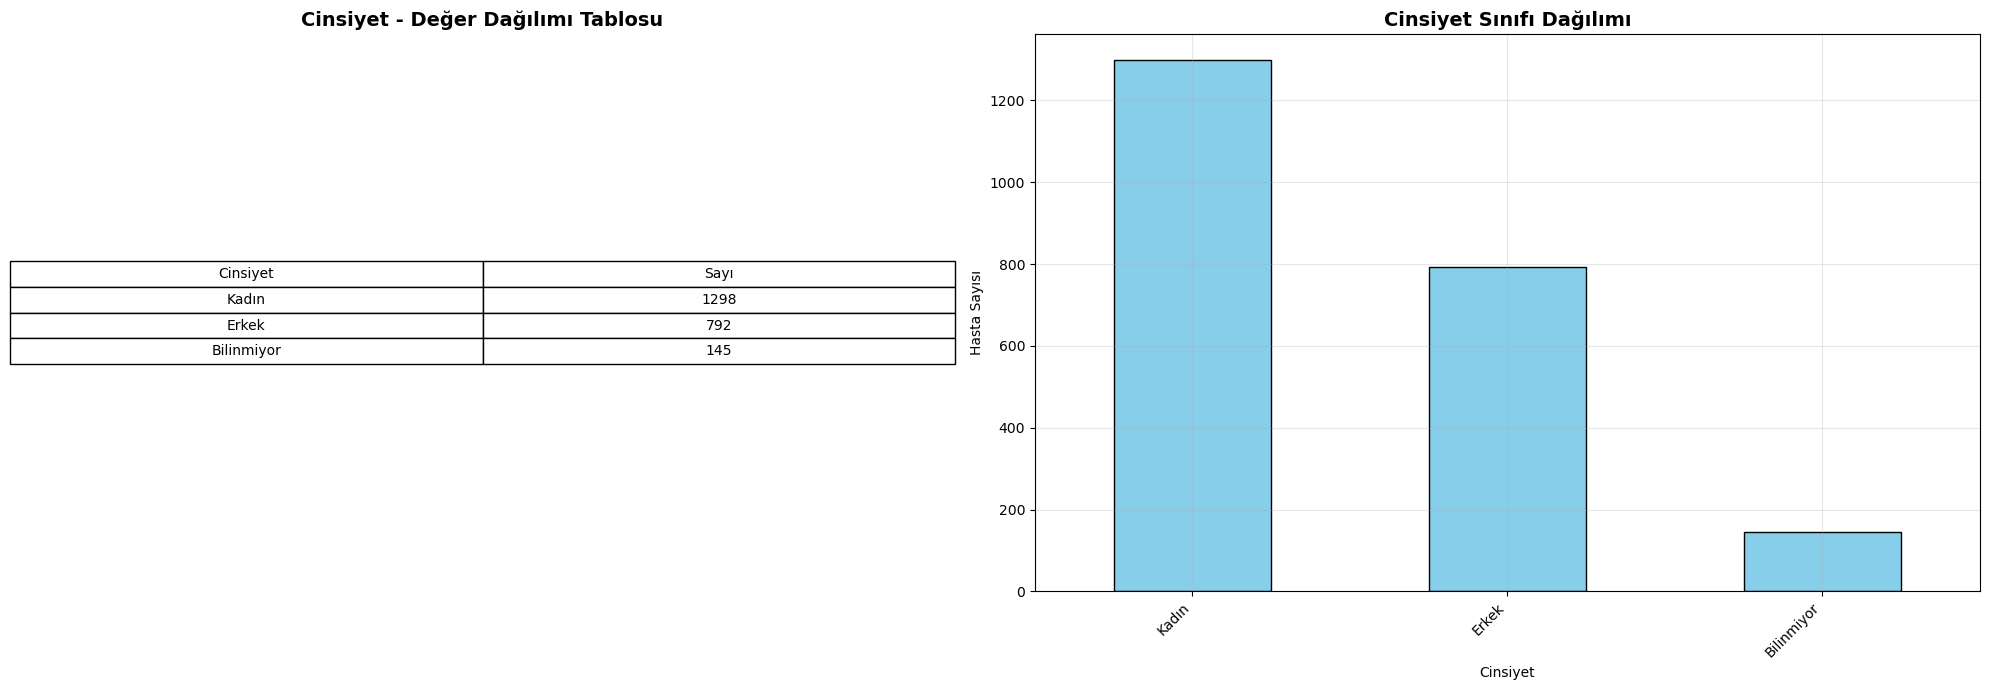

Kategorik Sütun: KanGrubu
Toplam benzersiz değer sayısı: 9
Benzersiz Değerleri:
KanGrubu
Bilinmiyor    644
0 Rh+         590
A Rh+         546
B Rh+         211
AB Rh+         82
B Rh-          72
A Rh-          53
0 Rh-          29
AB Rh-          8
Name: count, dtype: int64


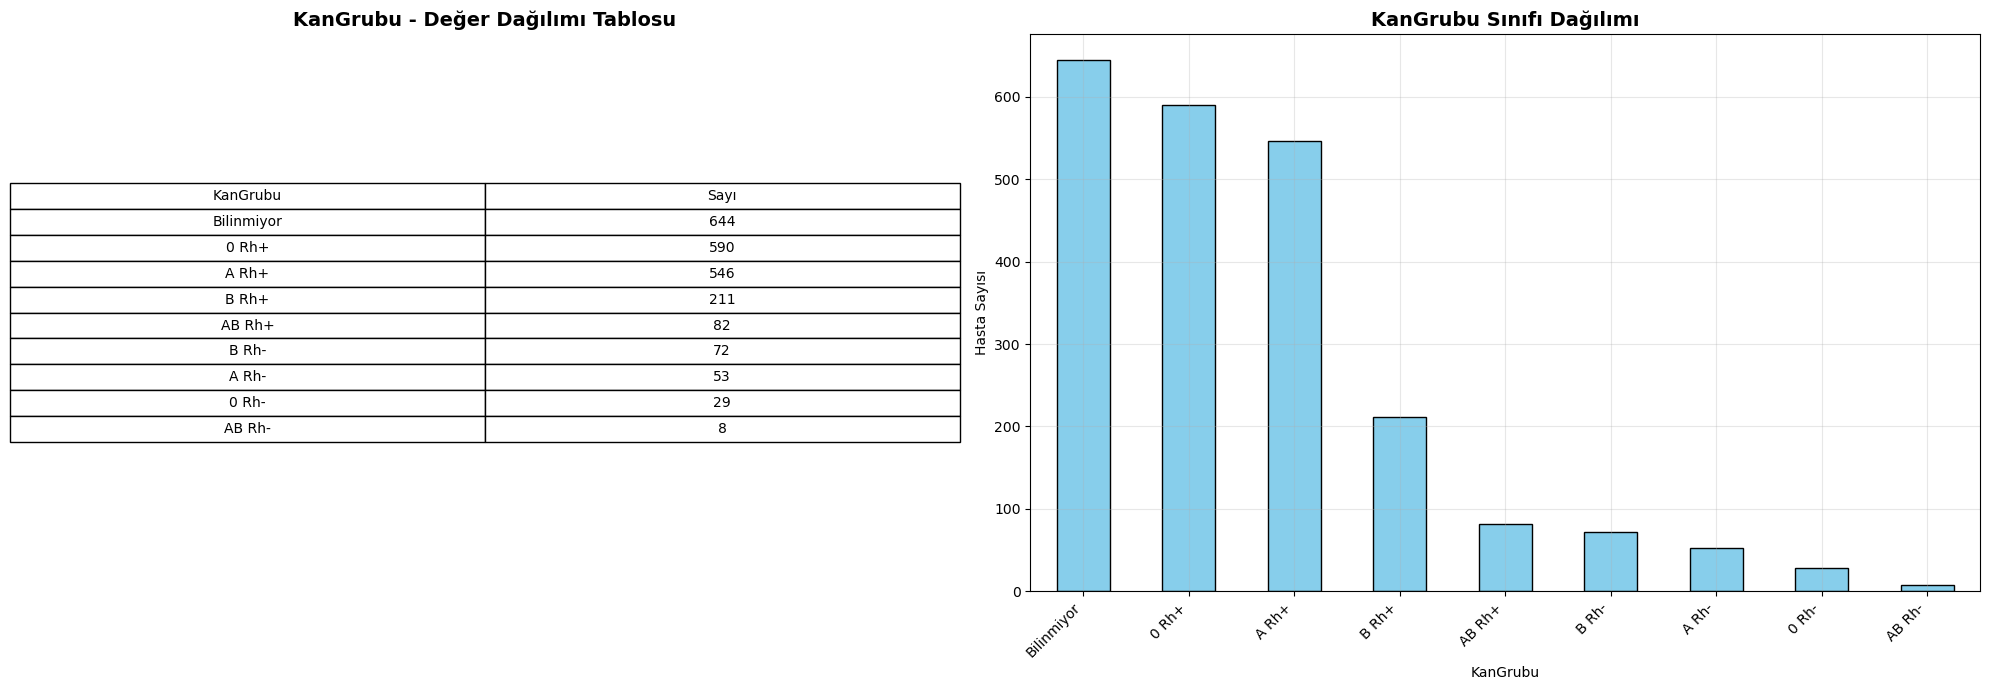

Kategorik Sütun: Uyruk
Toplam benzersiz değer sayısı: 5
Benzersiz Değerleri:
Uyruk
Türkiye       2173
Tokelau         27
Arnavutluk      13
Azerbaycan      12
Libya           10
Name: count, dtype: int64


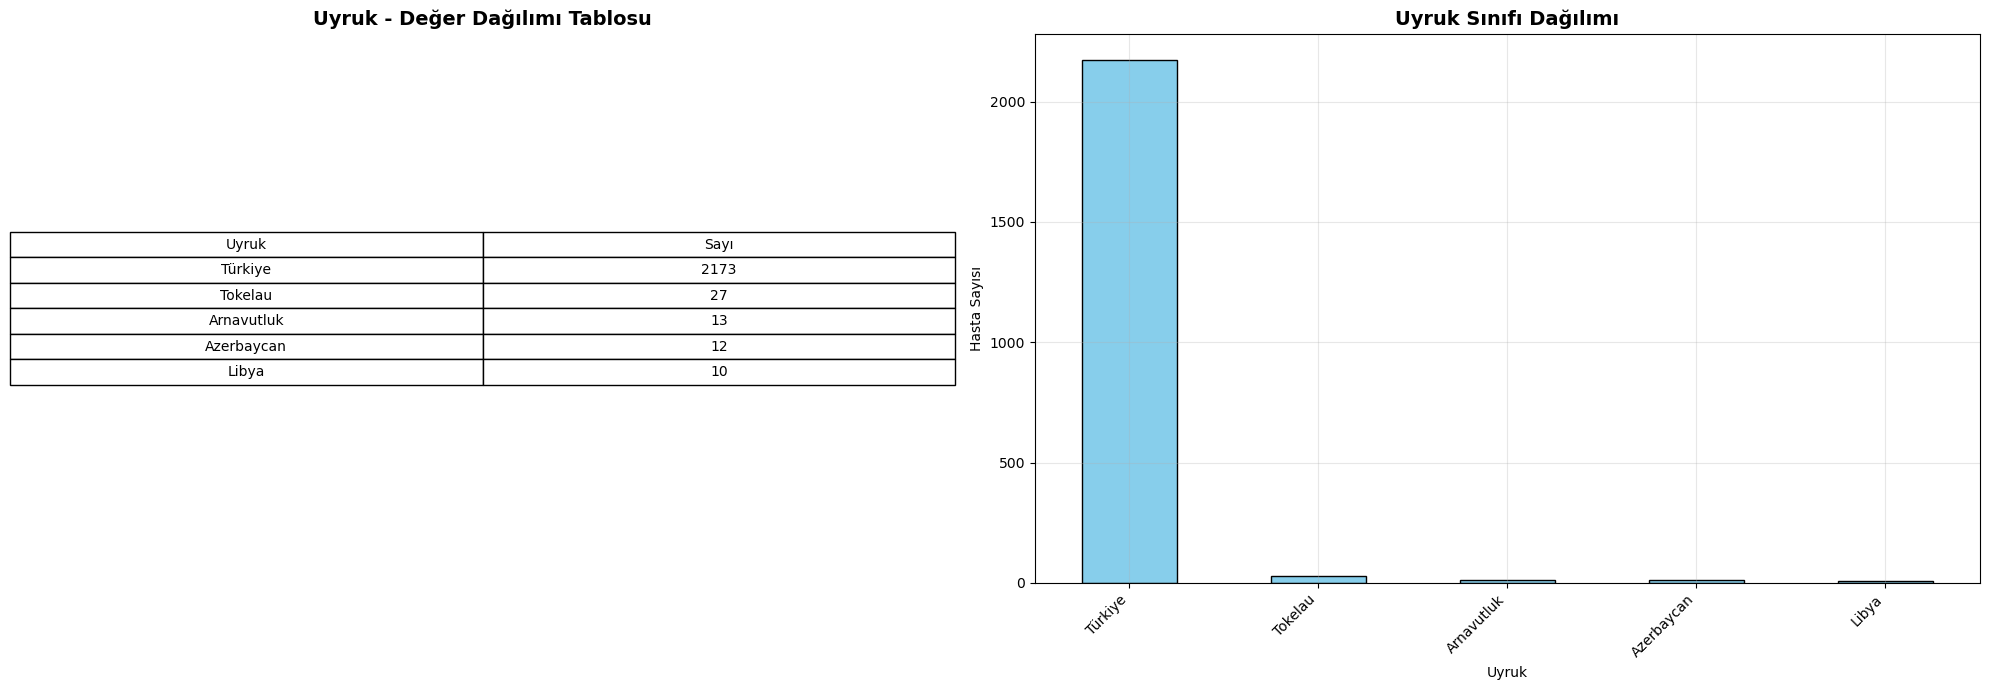

Kategorik Sütun: KronikHastalik
Toplam benzersiz değer sayısı: 221
Benzersiz Değerleri:
KronikHastalik
Bilinmiyor                              606
Myastenia gravis                         38
Aritmi                                   36
Fascioscapulohumeral Distrofi            36
Hipertansiyon                            36
Limb-Girdle Musküler Distrofi, Astım     34
Hipertiroidizm                           34
Kalp yetmezliği                          33
Astım                                    30
Becker Musküler Distrofisi               29
Name: count, dtype: int64


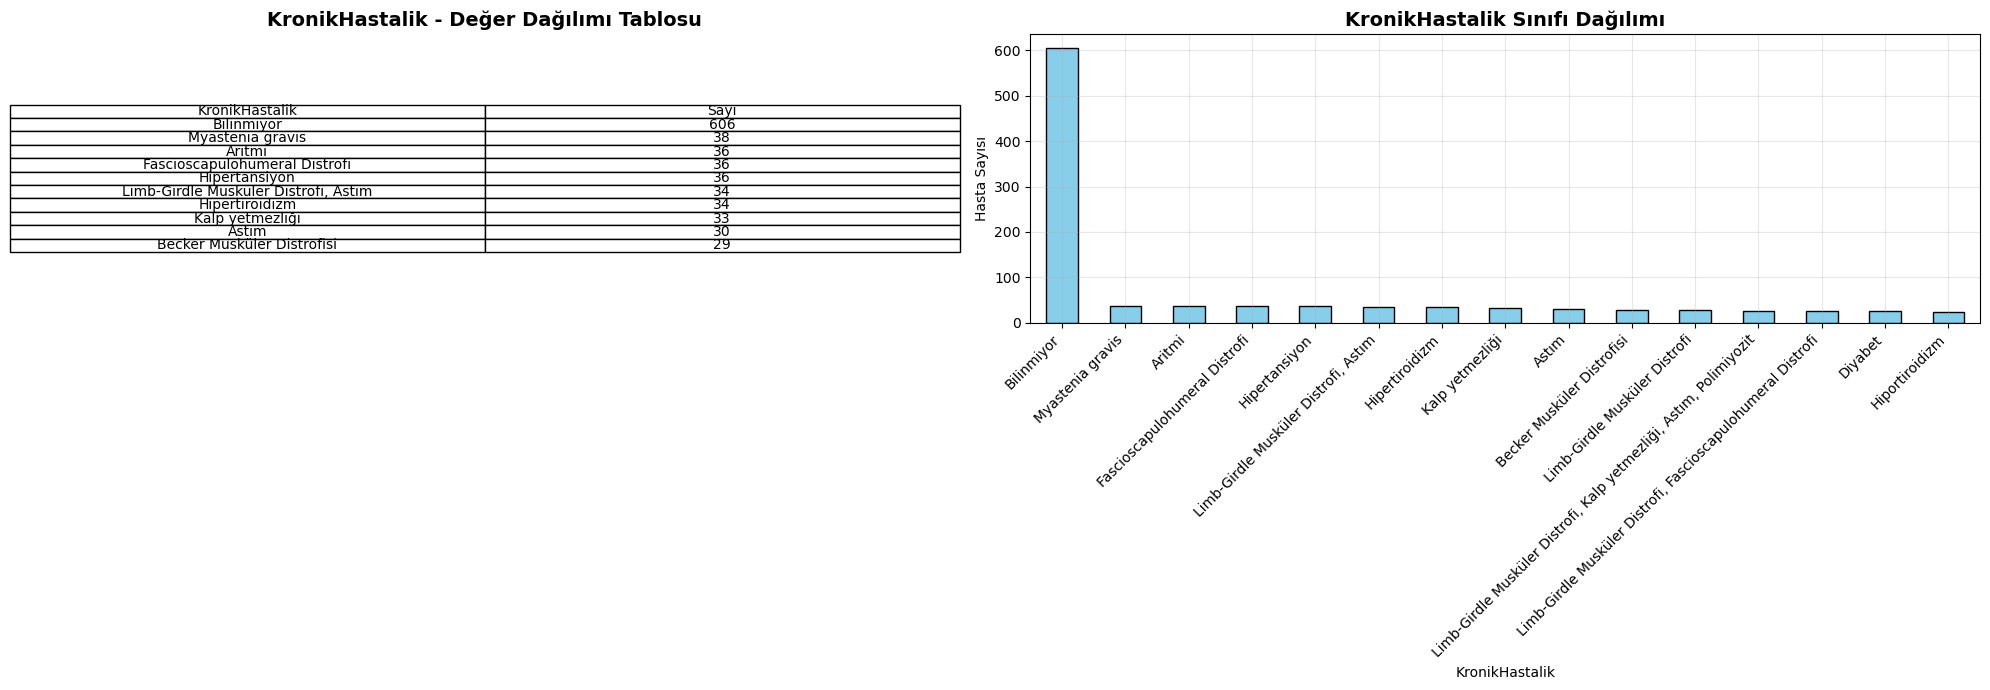

Kategorik Sütun: Bolum
Toplam benzersiz değer sayısı: 11
Benzersiz Değerleri:
Bolum
Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    2049
Ortopedi Ve Travmatoloji                            88
İç Hastalıkları                                     32
Nöroloji                                            17
Kardiyoloji                                         11
Göğüs Hastalıkları                                   8
Bilinmiyor                                           7
Laboratuar                                           7
Genel Cerrahi                                        6
Tıbbi Onkoloji                                       6
Name: count, dtype: int64


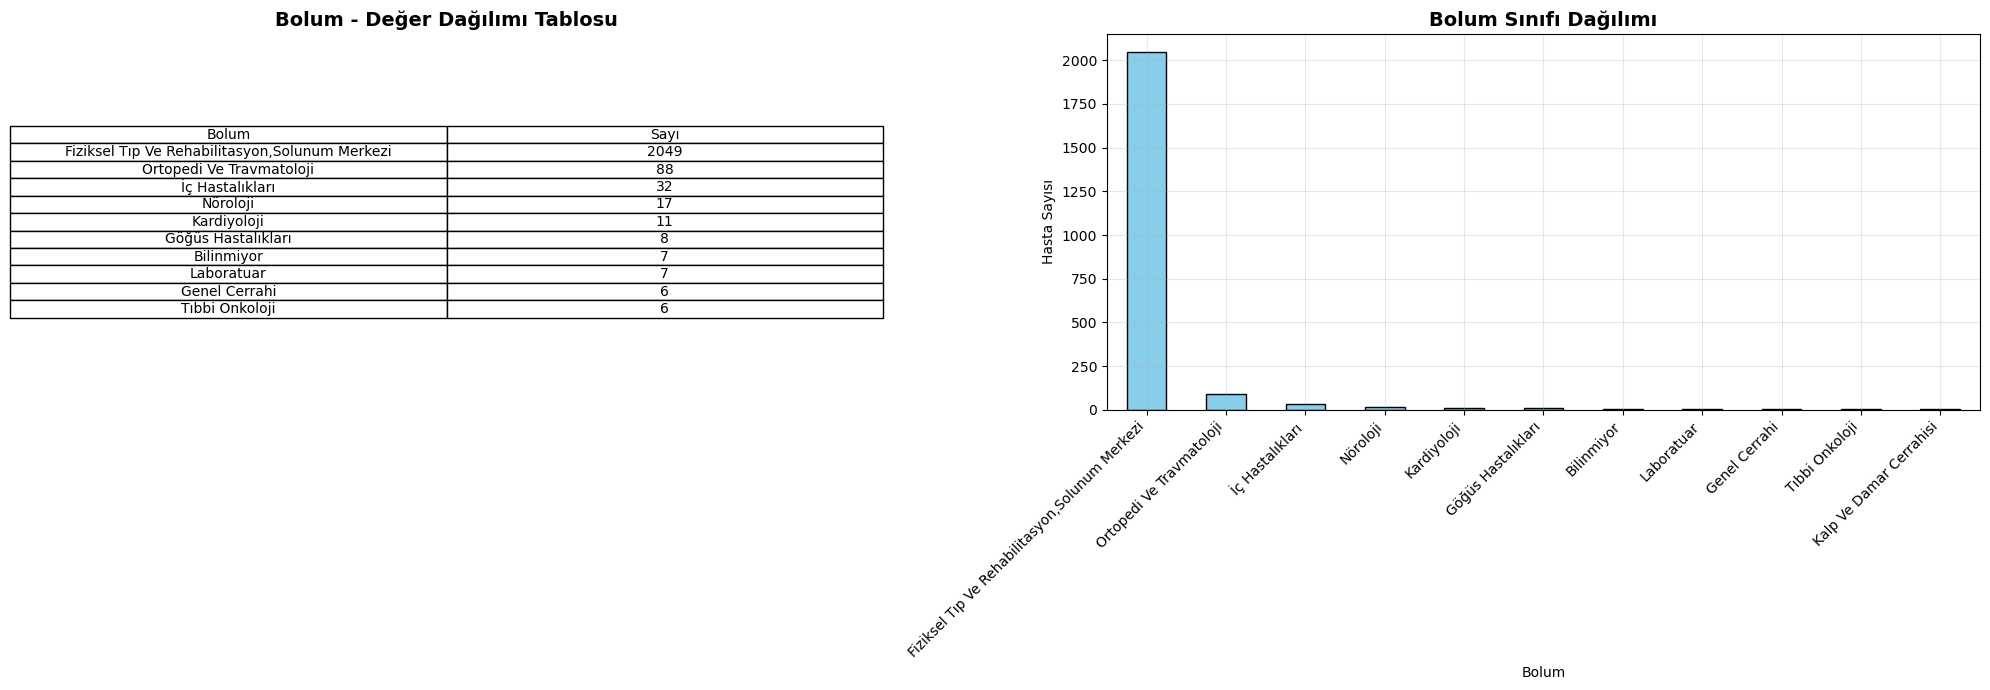

Kategorik Sütun: Alerji
Toplam benzersiz değer sayısı: 20
Benzersiz Değerleri:
Alerji
Yok                  944
Polen                332
Toz                  202
Sucuk                164
Novalgin             144
Arveles,Coraspin     102
Polen,Yer Fıstığı     83
Voltaren              75
Gri̇pi̇n              47
Polen,Voltaren        31
Name: count, dtype: int64


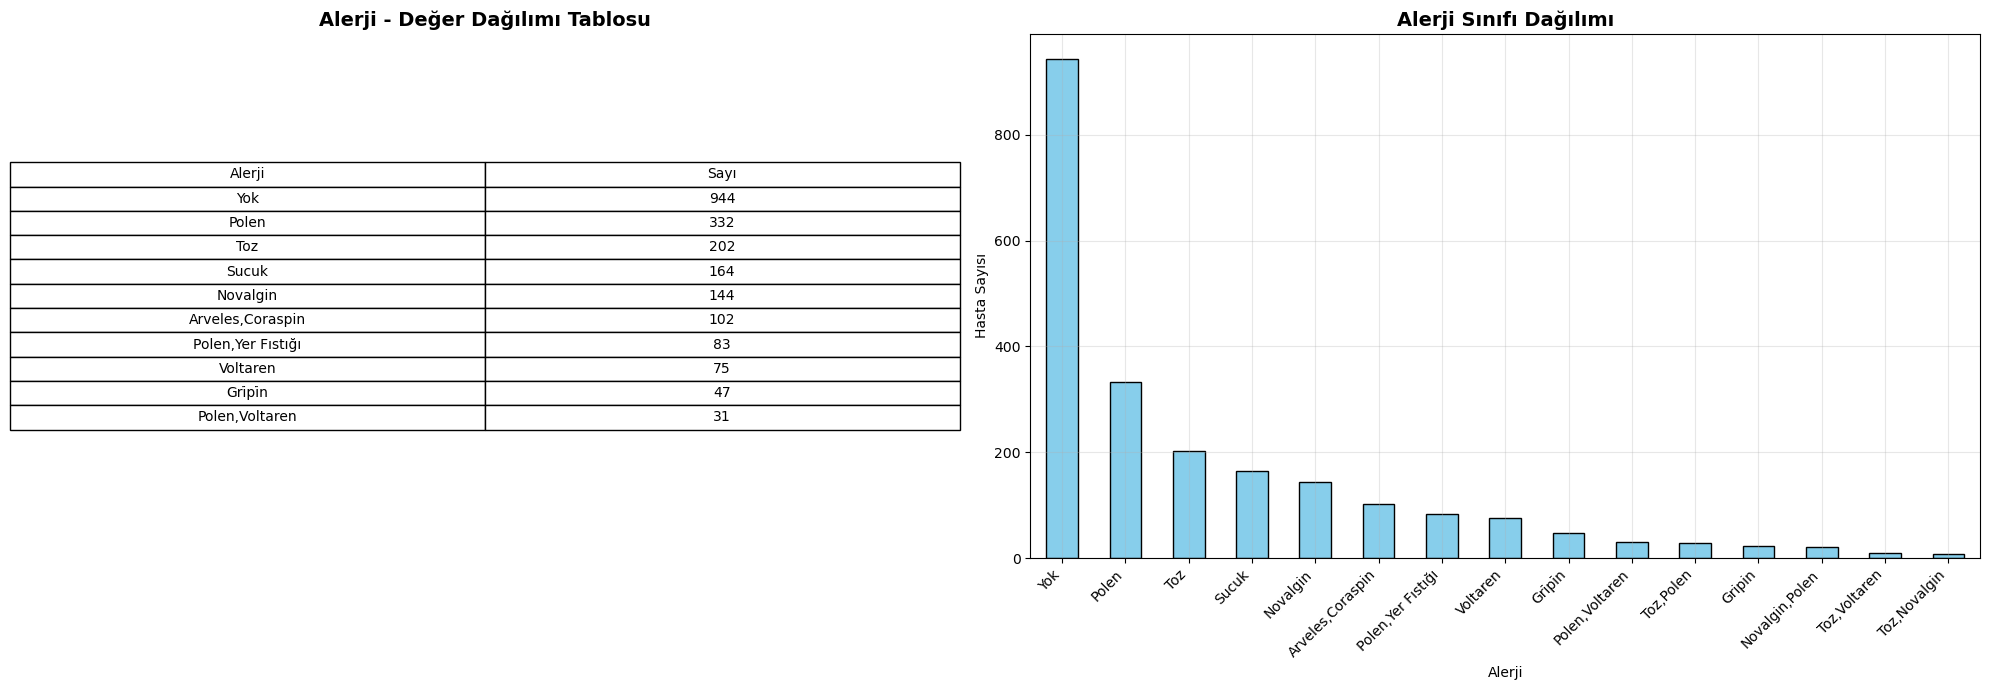

Kategorik Sütun: Tanilar
Toplam benzersiz değer sayısı: 370
Benzersiz Değerleri:
Tanilar
DORSALJİ, DİĞER, LUMBOSAKRAL BÖLGE                 155
Omuzun darbe sendromu                              128
İntervertebral disk bozuklukları, tanımlanmamış    126
DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE               96
Eklem ağrısı                                        56
DORSALJİ, DİĞER, SERVİKAL BÖLGE                     49
Ortopedik eklem implantı                            38
Radikülopati                                        37
Dorsalji, tanımlanmamış                             32
Menisküs yırtığı, şimdiki                           30
Name: count, dtype: int64


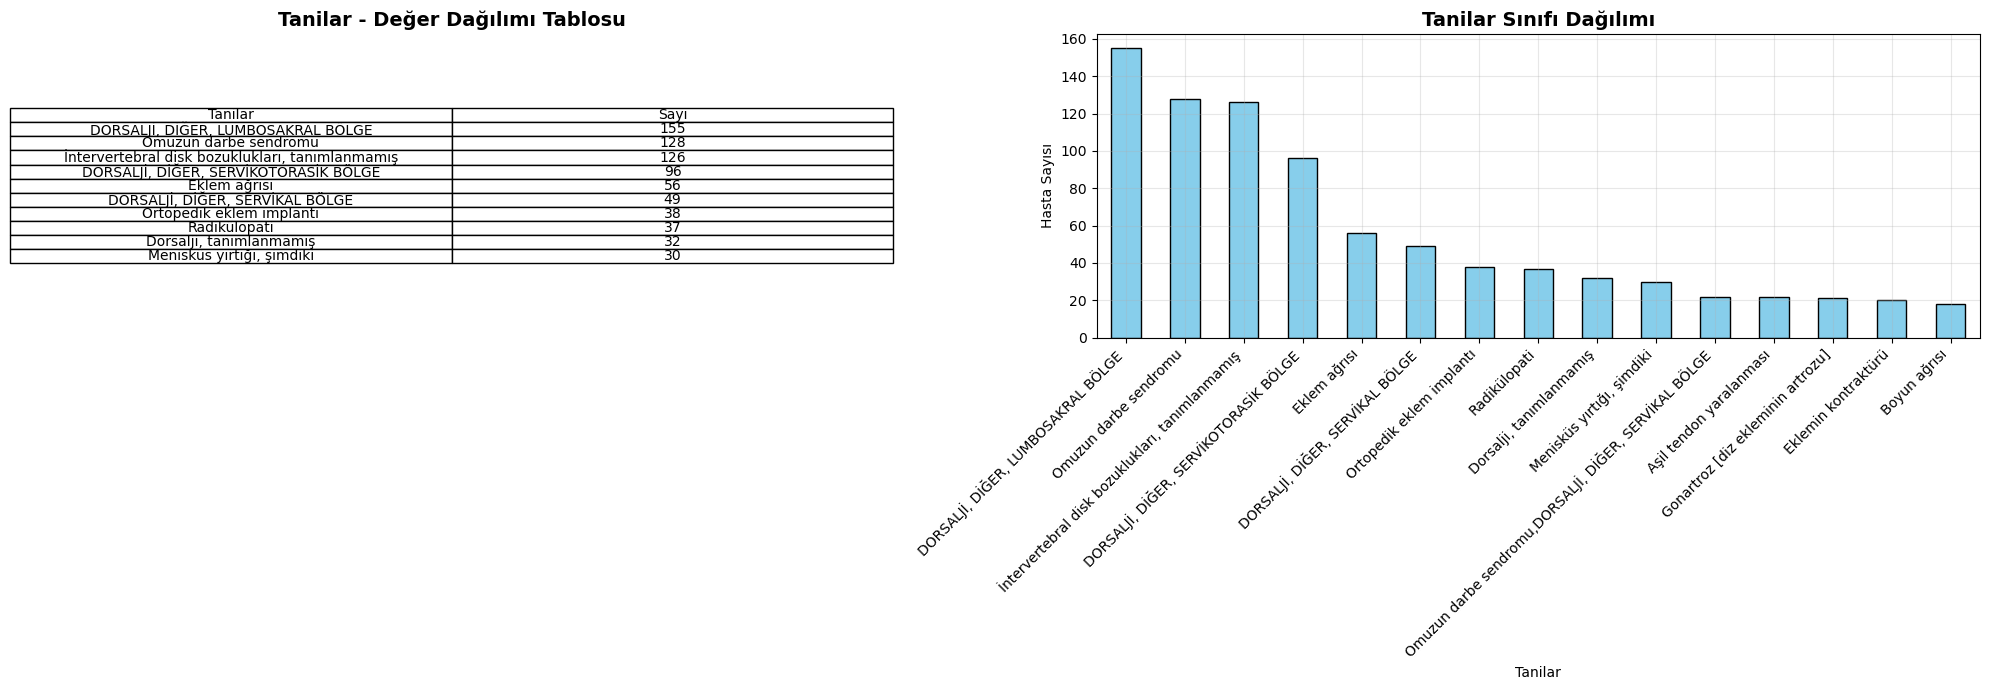

Kategorik Sütun: TedaviAdi
Toplam benzersiz değer sayısı: 244
Benzersiz Değerleri:
TedaviAdi
Dorsalji -Boyun+trapez             231
İV DİSK BOZUKLUĞU-BEL              200
Dorsalji 1                         140
Dorsalji-Bel                       120
Gonartroz-Meniskopati               95
SAĞ OMUZ İMPİNGEMENT                70
Boyun-Trapezz                       60
Dorsalji-Dorsal                     56
Sol omuz İmpingement                50
Alt ekstremite atrofi-Bilateral     37
Name: count, dtype: int64


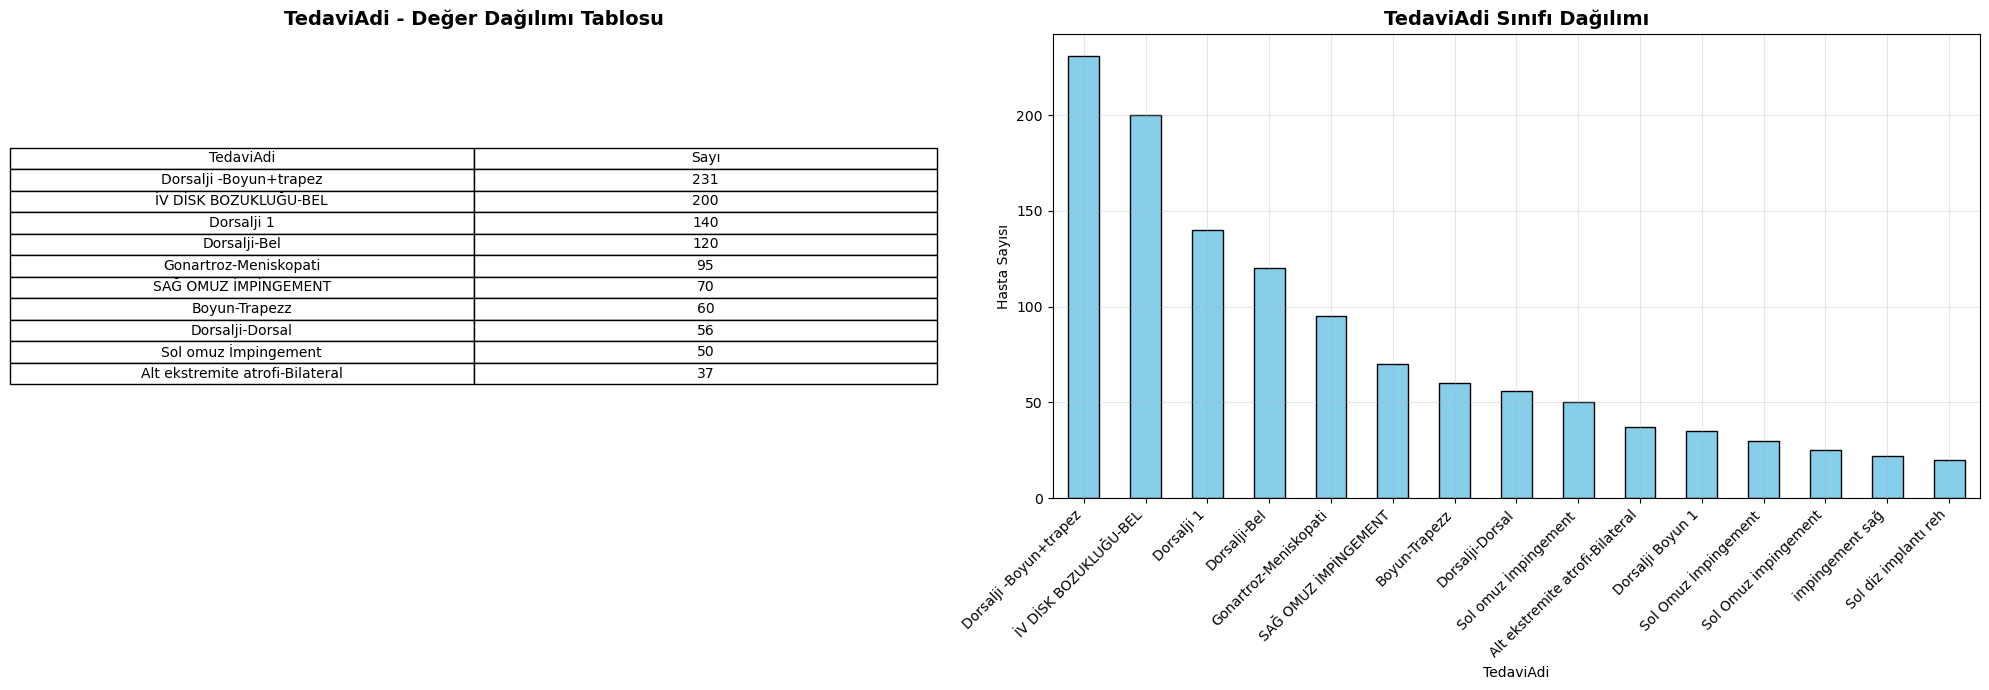

Kategorik Sütun: UygulamaYerleri
Toplam benzersiz değer sayısı: 38
Benzersiz Değerleri:
UygulamaYerleri
Bel                        531
Boyun                      366
Diz                        178
Sol Omuz Bölgesi           148
Tüm Vücut Bölgesi          138
Sağ Omuz Bölgesi           135
Sol El Bilek Bölgesi        84
Bilinmiyor                  83
Sırt                        80
Sağ Ayak Bileği Bölgesi     63
Name: count, dtype: int64


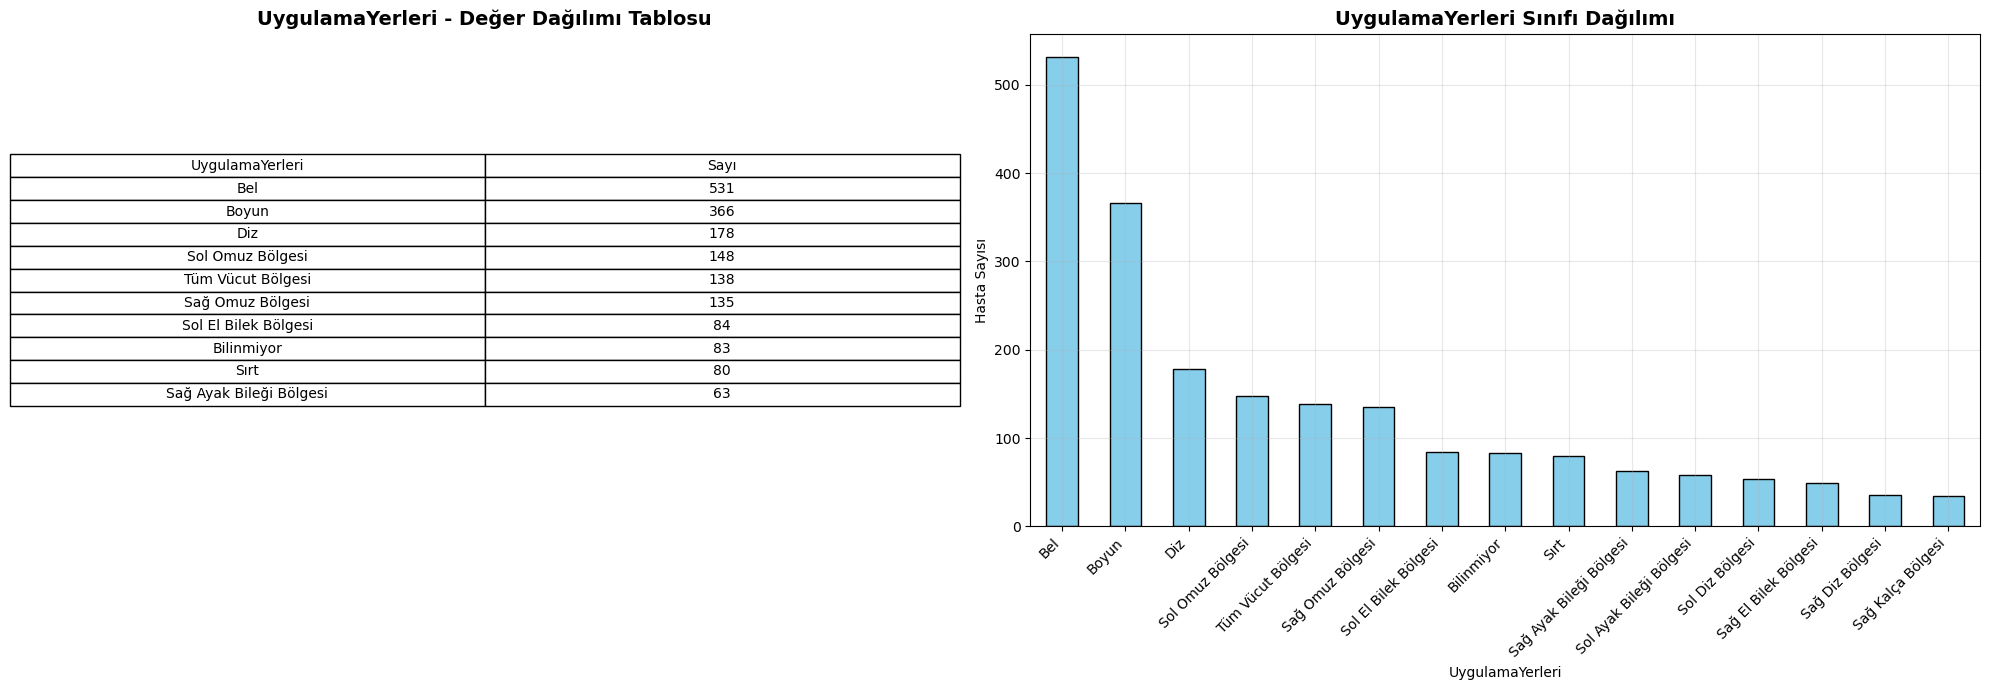

In [160]:
# Kategorik sütun analizi ve görselleştirme
for col in categorical_columns:
    # Kategorik sütun bilgilerini yazdır
    print(f"{'='*60}")
    print(f"Kategorik Sütun: {col}")
    print(f"{'='*60}")
    
    counts = data_filled[col].value_counts()
    print(f"Toplam benzersiz değer sayısı: {len(counts)}")
    print(f"Benzersiz Değerleri:")
    print(counts.head(10))
    
    # Görselleştirme
    fig = plt.figure(figsize=(20, 7))

    # İlk sütun: Tablo
    ax1 = fig.add_subplot(1, 2, 1)  # 1 satır, 2 sütun, 1. grafik
    ax1.axis('off')
    ax1.set_title(f"{col} - Değer Dağılımı Tablosu", fontsize=14, fontweight='bold')
    
    # Tablo için veri hazırlama (ilk 10 değer)
    table_data = counts.head(10).reset_index().values
    table = plt.table(
        cellText=table_data,
        colLabels=[col, 'Sayı'],
        loc='center',
        cellLoc='center',
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)

    # İkinci sütun: Bar grafiği
    ax2 = fig.add_subplot(1, 2, 2)  # 1 satır, 2 sütun, 2. grafik
    counts.head(15).plot(kind='bar', ax=ax2, color='skyblue', edgecolor='black')
    ax2.set_title(f"{col} Sınıfı Dağılımı", fontsize=14, fontweight='bold')
    ax2.set_ylabel("Hasta Sayısı")
    ax2.set_xlabel(col)
    plt.xticks(rotation=45, ha='right')
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

In [161]:
# Kategorik sütunların genel özeti
print(f"Toplam kategorik sütun sayısı: {len(categorical_columns)}")

# Kategorik sütunların detaylı özeti:
summary_df = pd.DataFrame({
    'Sütun_Adı': categorical_columns,
    'Benzersiz_Değer_Sayısı': [data_filled[col].nunique() for col in categorical_columns],
    'En_Yaygın_Değer': [data_filled[col].value_counts().index[0] for col in categorical_columns],
    'En_Yaygın_Değer_Sayısı': [data_filled[col].value_counts().iloc[0] for col in categorical_columns]
})
summary_df

Toplam kategorik sütun sayısı: 9


Sütun_Adı  Benzersiz_Değer_Sayısı  \
0         Cinsiyet                       3   
1         KanGrubu                       9   
2            Uyruk                       5   
3   KronikHastalik                     221   
4            Bolum                      11   
5           Alerji                      20   
6          Tanilar                     370   
7        TedaviAdi                     244   
8  UygulamaYerleri                      38   

                                  En_Yaygın_Değer  En_Yaygın_Değer_Sayısı  
0                                           Kadın                    1298  
1                                      Bilinmiyor                     644  
2                                         Türkiye                    2173  
3                                      Bilinmiyor                     606  
4  Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi                    2049  
5                                             Yok                     944  
6              DORSALJİ, DİĞER, LUMBOSAKRAL BÖLGE                     155  
7                          Dorsalji -Boyun+trapez                     231  
8                                             Bel                     531

In [162]:
# En çok çeşitlilik gösteren sütunlar
print(f"En çok çeşitlilik gösteren 3 sütun:")
top_diverse = summary_df.nlargest(3, 'Benzersiz_Değer_Sayısı')
for idx, row in top_diverse.iterrows():
    print(f"- {row['Sütun_Adı']}: {row['Benzersiz_Değer_Sayısı']} benzersiz değer")

# En az çeşitlilik gösteren sütunlar
print(f"\nEn az çeşitlilik gösteren 3 sütun:")
least_diverse = summary_df.nsmallest(3, 'Benzersiz_Değer_Sayısı')
for idx, row in least_diverse.iterrows():
    print(f"- {row['Sütun_Adı']}: {row['Benzersiz_Değer_Sayısı']} benzersiz değer")

En çok çeşitlilik gösteren 3 sütun:
- Tanilar: 370 benzersiz değer
- TedaviAdi: 244 benzersiz değer
- KronikHastalik: 221 benzersiz değer

En az çeşitlilik gösteren 3 sütun:
- Cinsiyet: 3 benzersiz değer
- Uyruk: 5 benzersiz değer
- KanGrubu: 9 benzersiz değer


In [163]:
# Sayısal sütunları belirleme
numerical_columns = data_filled.select_dtypes(include=[np.number]).columns.tolist()
print("Sayısal sütunlar:")
print(numerical_columns)
print(f"\nToplam {len(numerical_columns)} sayısal sütun bulundu.")

Sayısal sütunlar:
['HastaNo', 'Yas', 'TedaviSuresi (Seans)', 'UygulamaSuresi (Dakika)']

Toplam 4 sayısal sütun bulundu.


Sayısal Sütun: HastaNo
İstatistiksel özet:
count      2235.000000
mean     145333.100224
std         115.214248
min      145134.000000
25%      145235.000000
50%      145331.000000
75%      145432.000000
max      145537.000000
Name: HastaNo, dtype: float64


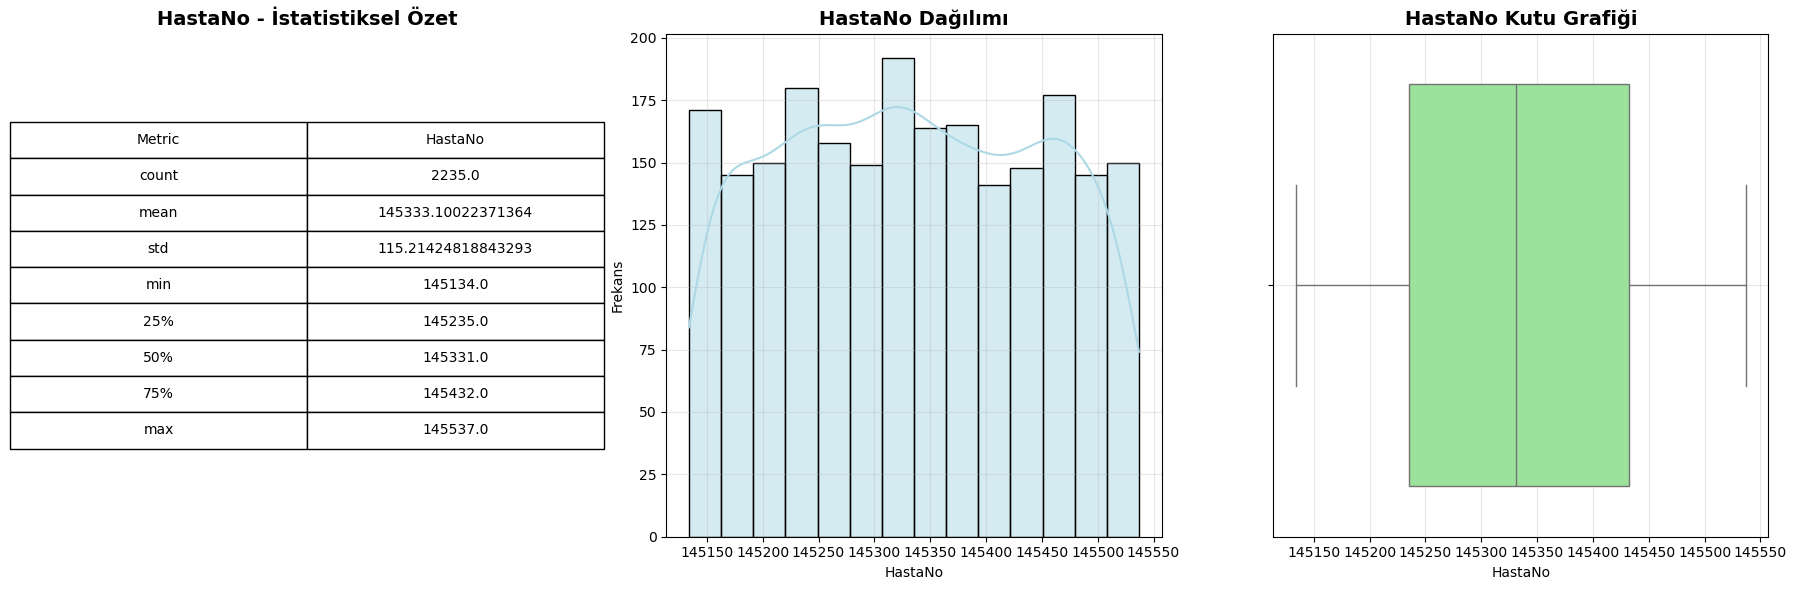

Sayısal Sütun: Yas
İstatistiksel özet:
count    2235.000000
mean       47.327069
std        15.208634
min         2.000000
25%        38.000000
50%        46.000000
75%        56.000000
max        92.000000
Name: Yas, dtype: float64


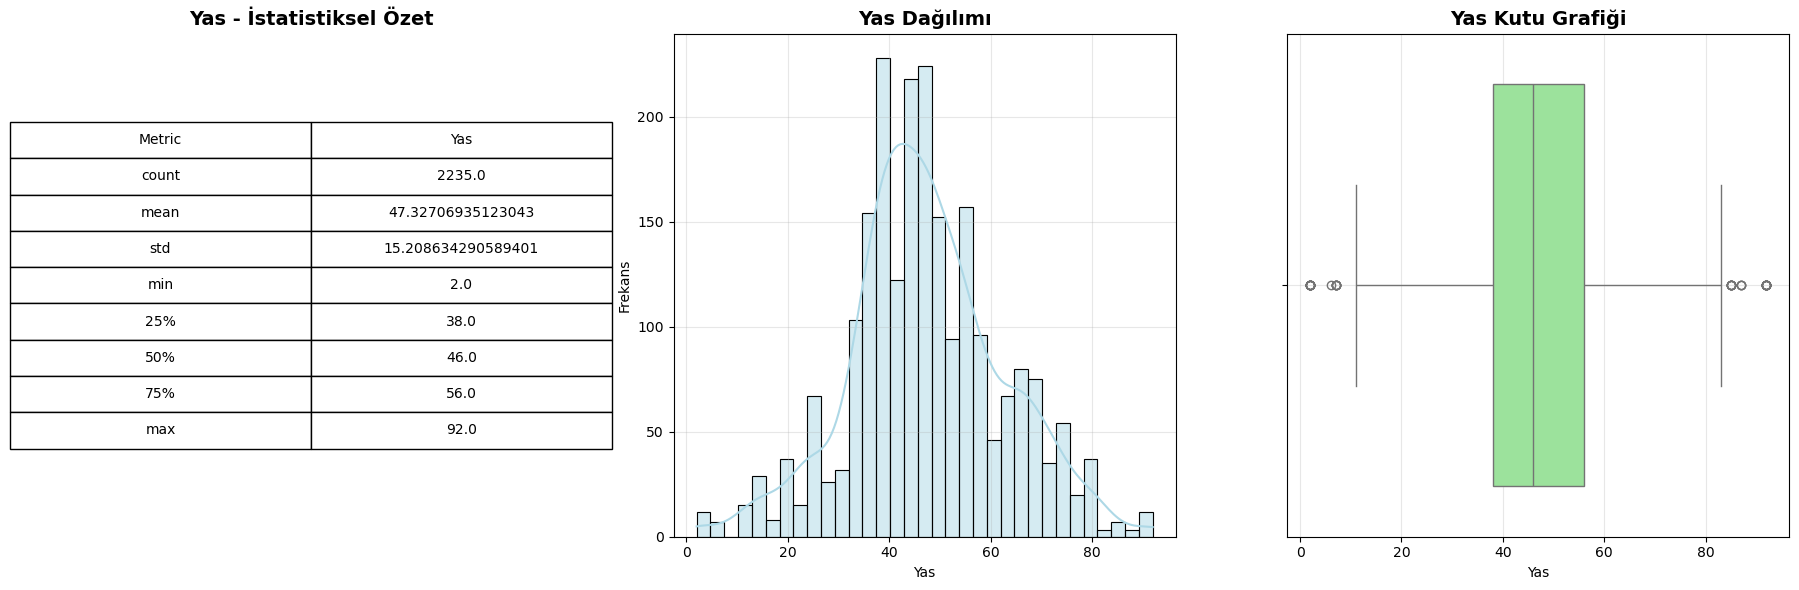

Sayısal Sütun: TedaviSuresi (Seans)
İstatistiksel özet:
count    2235.000000
mean       14.570917
std         3.725322
min         1.000000
25%        15.000000
50%        15.000000
75%        15.000000
max        37.000000
Name: TedaviSuresi (Seans), dtype: float64


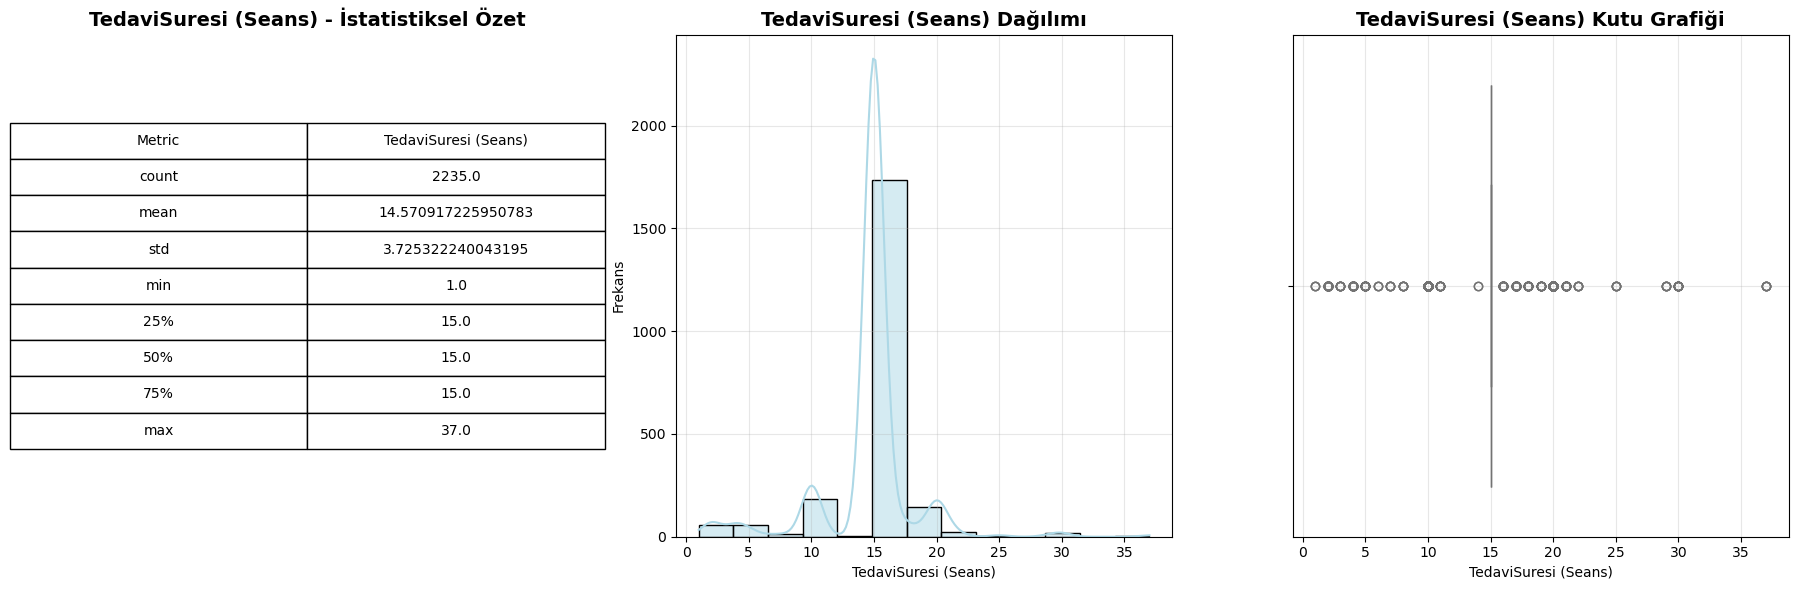

Sayısal Sütun: UygulamaSuresi (Dakika)
İstatistiksel özet:
count    2235.000000
mean       16.573154
std         6.268635
min         3.000000
25%        10.000000
50%        20.000000
75%        20.000000
max        45.000000
Name: UygulamaSuresi (Dakika), dtype: float64


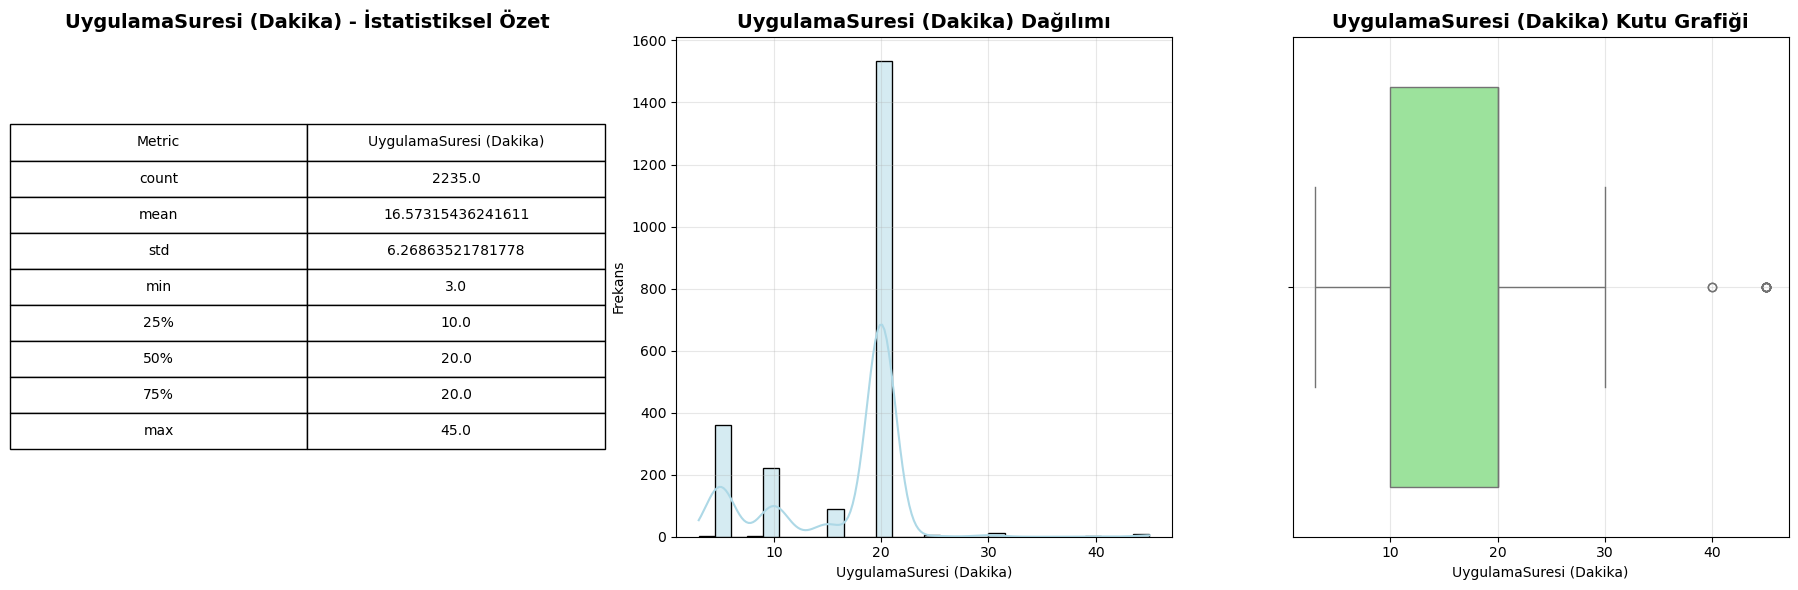

In [164]:
# Sayısal sütun analizi ve görselleştirme
for col in numerical_columns:
    print(f"{'='*60}")
    print(f"Sayısal Sütun: {col}")
    print(f"{'='*60}")
    
    stats = data_filled[col].describe()
    print(f"İstatistiksel özet:")
    print(stats)
    
    # Görselleştirme
    fig = plt.figure(figsize=(18, 6))

    # İlk sütun: İstatistiksel özet tablosu
    ax1 = fig.add_subplot(1, 3, 1)  # 1 satır, 3 sütun, 1. grafik
    ax1.axis('off')  # Grafik eksenlerini kapat
    ax1.set_title(f"{col} - İstatistiksel Özet", fontsize=14, fontweight='bold')
    
    table = plt.table(
        cellText=stats.reset_index().values,
        colLabels=["Metric", col],
        loc='center',
        cellLoc='center'
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)  # Yazı boyutu
    table.scale(1.2, 2)  # Tablo genişlik ve yükseklik ölçeklendirme

    # Histogram
    ax2 = fig.add_subplot(1, 3, 2)
    sns.histplot(data_filled[col], kde=True, ax=ax2, color='lightblue', edgecolor='black')
    ax2.set_title(f"{col} Dağılımı", fontsize=14, fontweight='bold')
    ax2.set_xlabel(col)
    ax2.set_ylabel("Frekans")
    ax2.grid(True, alpha=0.3)

    # Boxplot
    ax3 = fig.add_subplot(1, 3, 3)
    sns.boxplot(x=data_filled[col], ax=ax3, color='lightgreen')
    ax3.set_title(f"{col} Kutu Grafiği", fontsize=14, fontweight='bold')
    ax3.set_xlabel(col)
    ax3.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

In [165]:
# Sayısal sütunların genel özeti
print(f"Toplam sayısal sütun sayısı: {len(numerical_columns)}")

# Sayısal sütunların istatistiksel özeti
numerical_summary = data_filled[numerical_columns].describe().T
numerical_summary

Toplam sayısal sütun sayısı: 4


count           mean         std       min  \
HastaNo                  2235.0  145333.100224  115.214248  145134.0   
Yas                      2235.0      47.327069   15.208634       2.0   
TedaviSuresi (Seans)     2235.0      14.570917    3.725322       1.0   
UygulamaSuresi (Dakika)  2235.0      16.573154    6.268635       3.0   

                              25%       50%       75%       max  
HastaNo                  145235.0  145331.0  145432.0  145537.0  
Yas                          38.0      46.0      56.0      92.0  
TedaviSuresi (Seans)         15.0      15.0      15.0      37.0  
UygulamaSuresi (Dakika)      10.0      20.0      20.0      45.0

In [166]:
numerical_columns

['HastaNo', 'Yas', 'TedaviSuresi (Seans)', 'UygulamaSuresi (Dakika)']

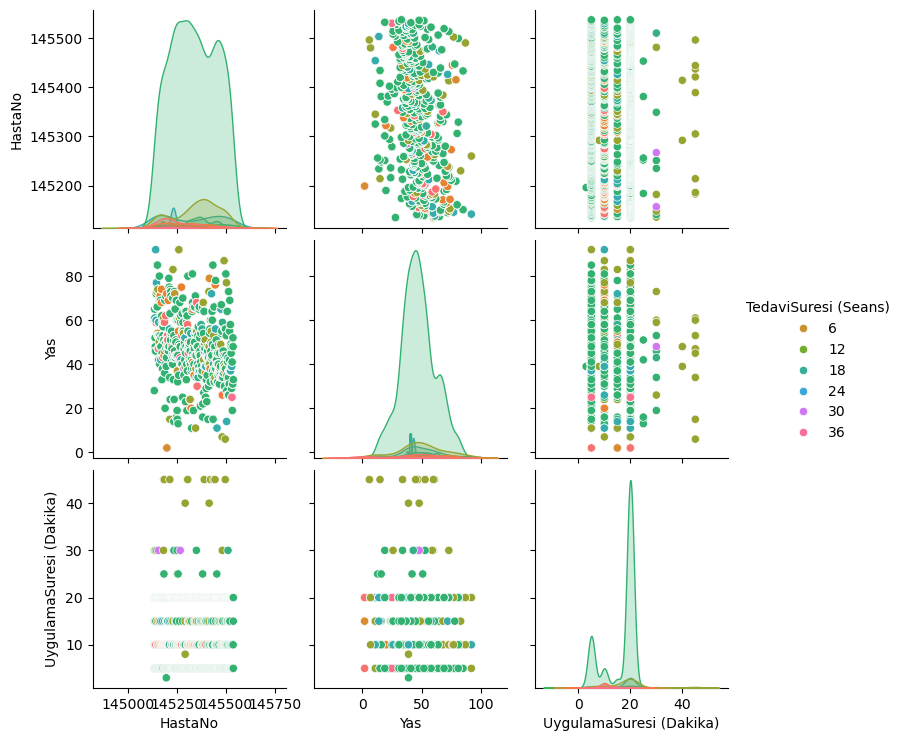

In [167]:
sns.pairplot(data=data[['HastaNo', 'Yas', 'TedaviSuresi (Seans)', 'UygulamaSuresi (Dakika)']],
             hue='TedaviSuresi (Seans)',  # Hedef sütun adı
             palette='husl')  # Renk paleti
plt.show()

In [168]:
# TedaviSuresi'ni kategorilere ayıralım
def categorize_tedavi_suresi(seans):
    if seans <= 10:
        return "Kısa (≤10 seans)"
    elif seans <= 20:
        return "Orta (11-20 seans)"
    else:
        return "Uzun (>20 seans)"

data_filled['TedaviSuresi_Kategori'] = data_filled['TedaviSuresi (Seans)'].apply(categorize_tedavi_suresi)

print("Kategorize edilmiş TedaviSuresi dağılımı:")
print(data_filled['TedaviSuresi_Kategori'].value_counts())

Kategorize edilmiş TedaviSuresi dağılımı:
TedaviSuresi_Kategori
Orta (11-20 seans)    1887
Kısa (≤10 seans)       296
Uzun (>20 seans)        52
Name: count, dtype: int64


In [169]:
data_filled.columns.to_list()

['HastaNo',
 'Yas',
 'Cinsiyet',
 'KanGrubu',
 'Uyruk',
 'KronikHastalik',
 'Bolum',
 'Alerji',
 'Tanilar',
 'TedaviAdi',
 'UygulamaYerleri',
 'TedaviSuresi (Seans)',
 'UygulamaSuresi (Dakika)',
 'TedaviSuresi_Kategori']

In [170]:
categorical_columns

['Cinsiyet',
 'KanGrubu',
 'Uyruk',
 'KronikHastalik',
 'Bolum',
 'Alerji',
 'Tanilar',
 'TedaviAdi',
 'UygulamaYerleri']

=== KATEGORİK SÜTUNLAR İLE HEDEF SÜTUN İLİŞKİSİ ===

Cinsiyet ile TedaviSuresi İlişkisi
Cinsiyet sütunundaki benzersiz değer sayısı: 3
En yaygın 5 değer:
Cinsiyet
Kadın         1298
Erkek          792
Bilinmiyor     145
Name: count, dtype: int64


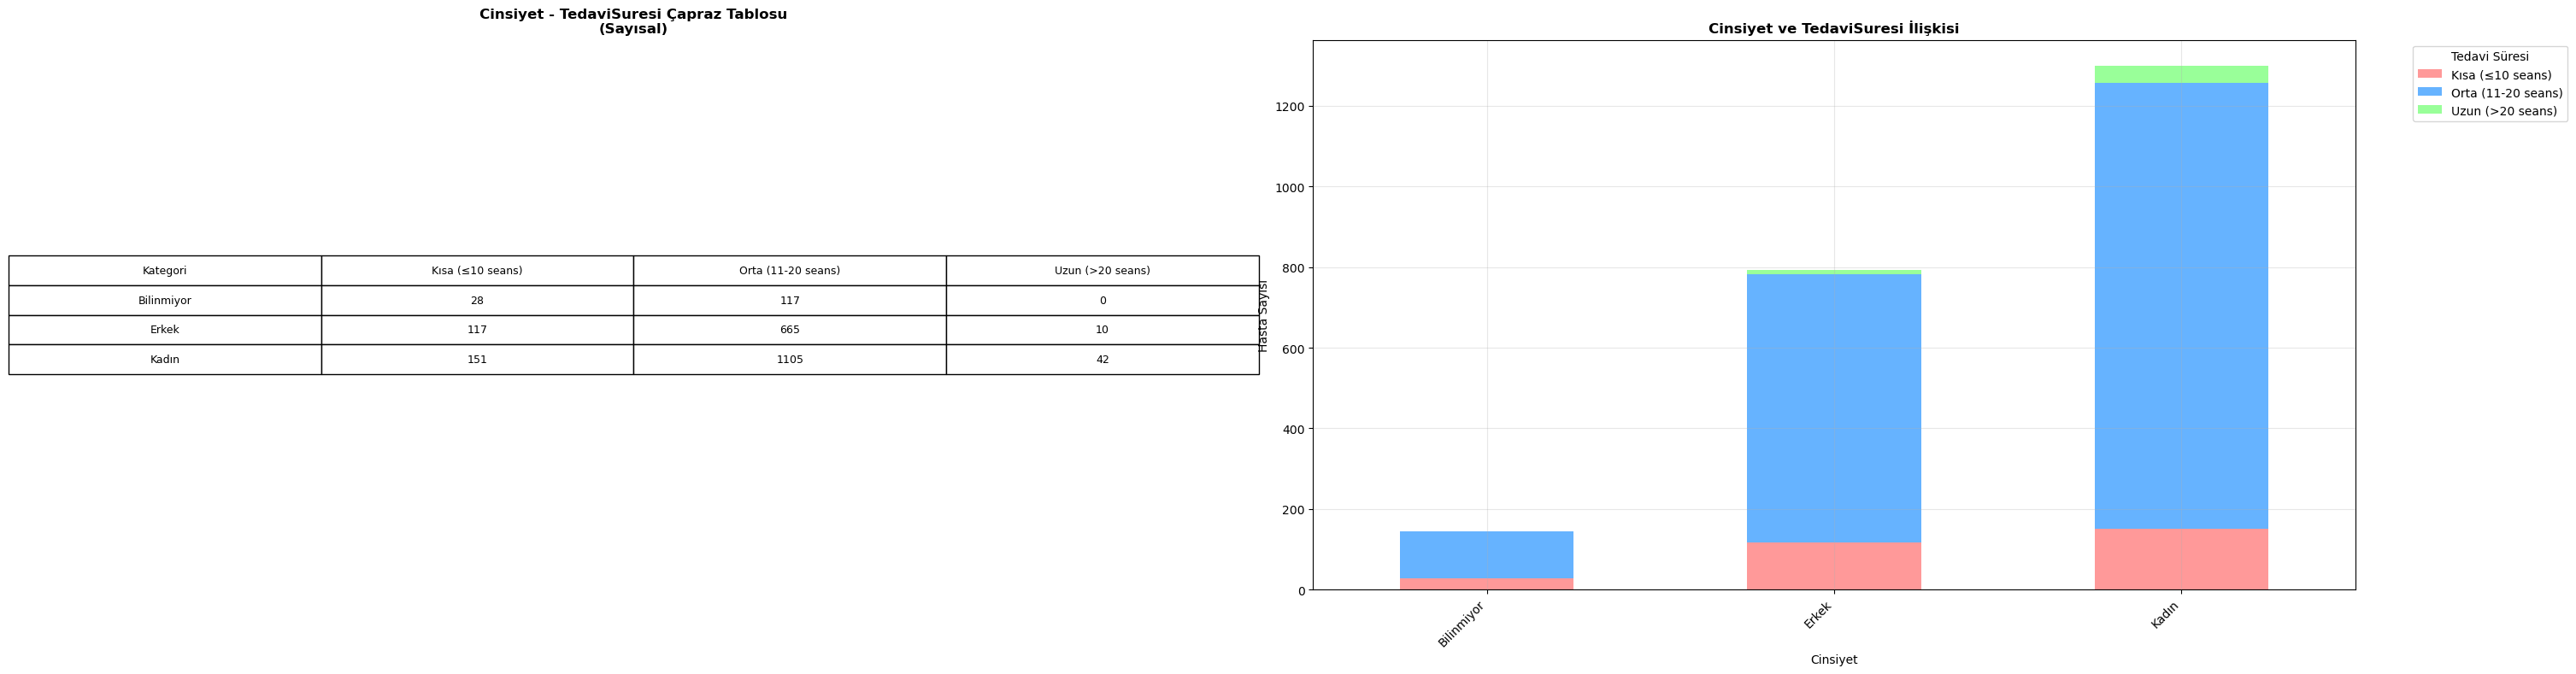


KanGrubu ile TedaviSuresi İlişkisi
KanGrubu sütunundaki benzersiz değer sayısı: 9
En yaygın 5 değer:
KanGrubu
Bilinmiyor    644
0 Rh+         590
A Rh+         546
B Rh+         211
AB Rh+         82
Name: count, dtype: int64


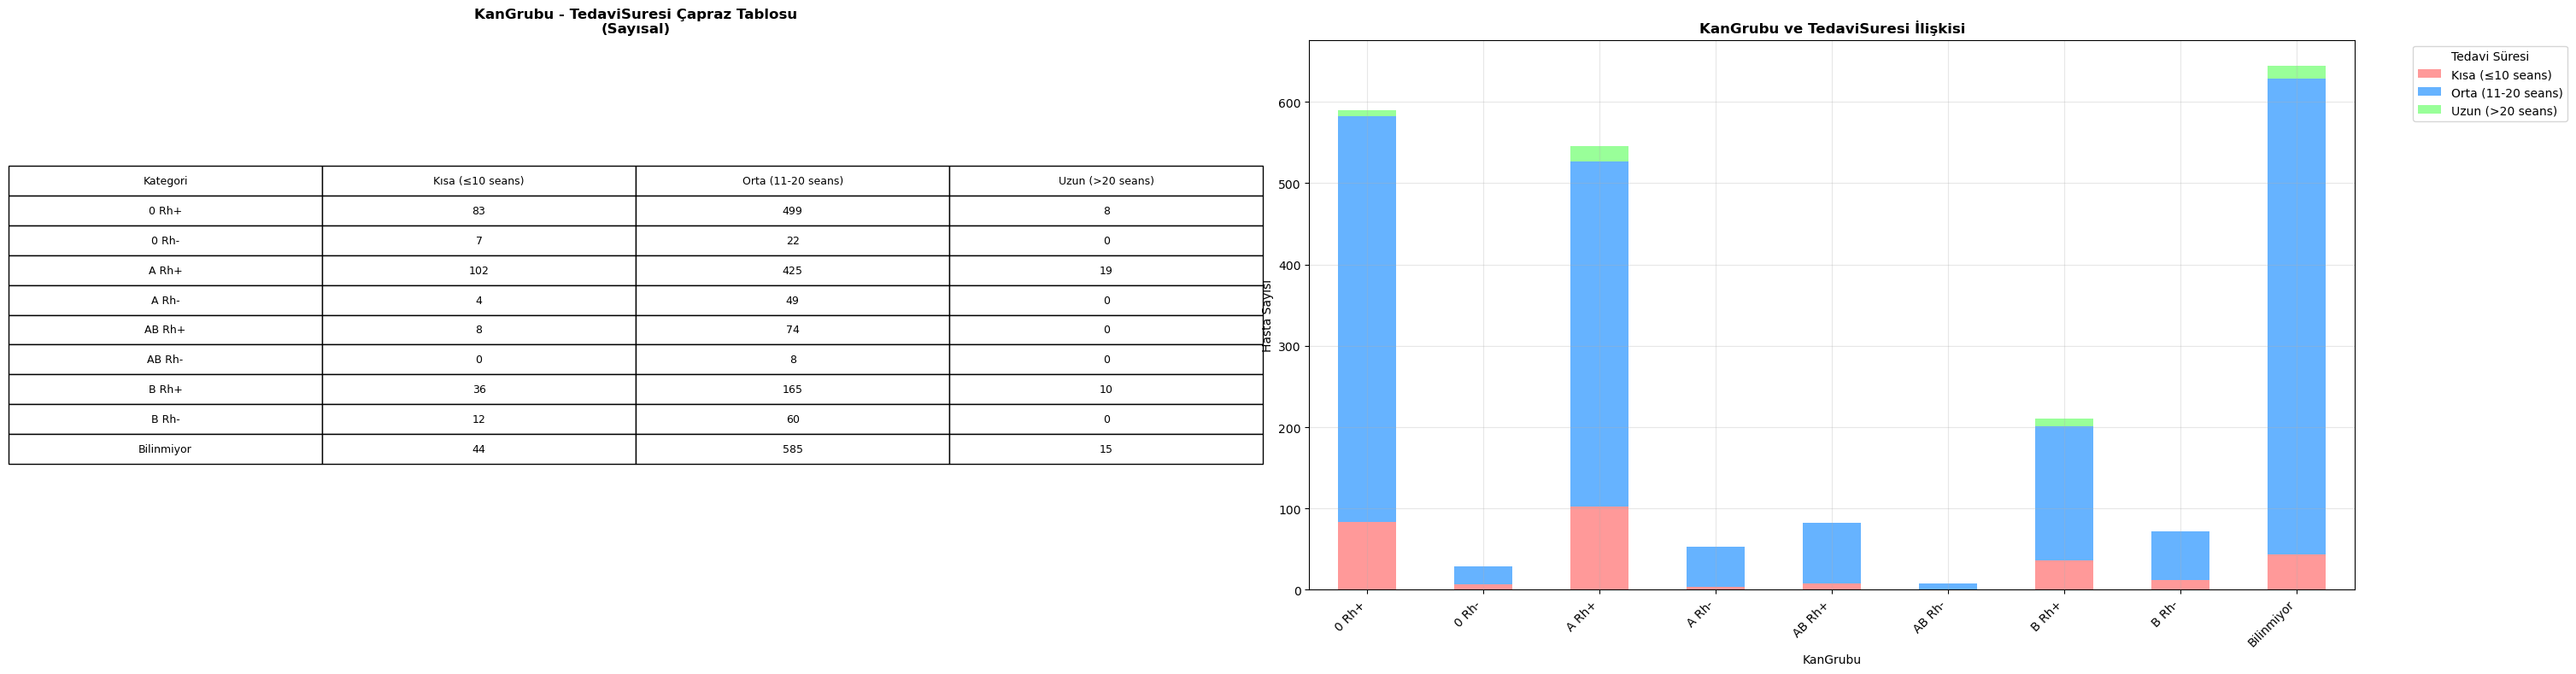


Uyruk ile TedaviSuresi İlişkisi
Uyruk sütunundaki benzersiz değer sayısı: 5
En yaygın 5 değer:
Uyruk
Türkiye       2173
Tokelau         27
Arnavutluk      13
Azerbaycan      12
Libya           10
Name: count, dtype: int64


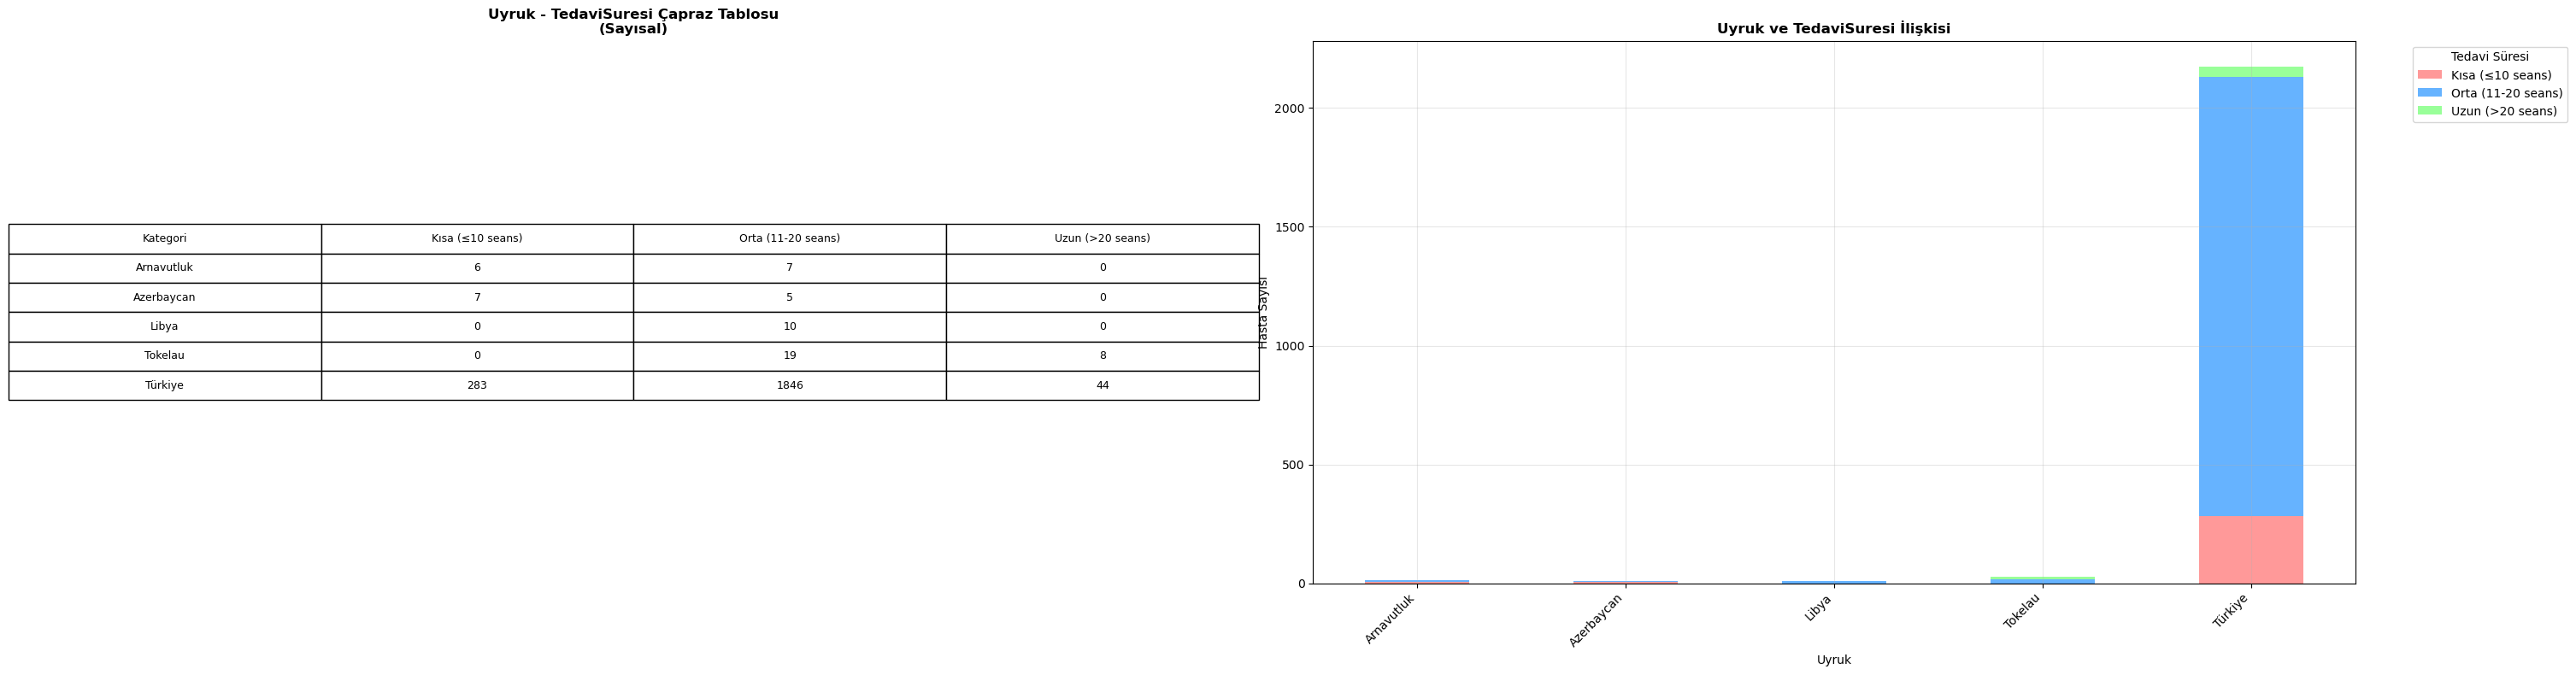


Bolum ile TedaviSuresi İlişkisi
Bolum sütunundaki benzersiz değer sayısı: 11
En yaygın 5 değer:
Bolum
Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi    2049
Ortopedi Ve Travmatoloji                            88
İç Hastalıkları                                     32
Nöroloji                                            17
Kardiyoloji                                         11
Name: count, dtype: int64


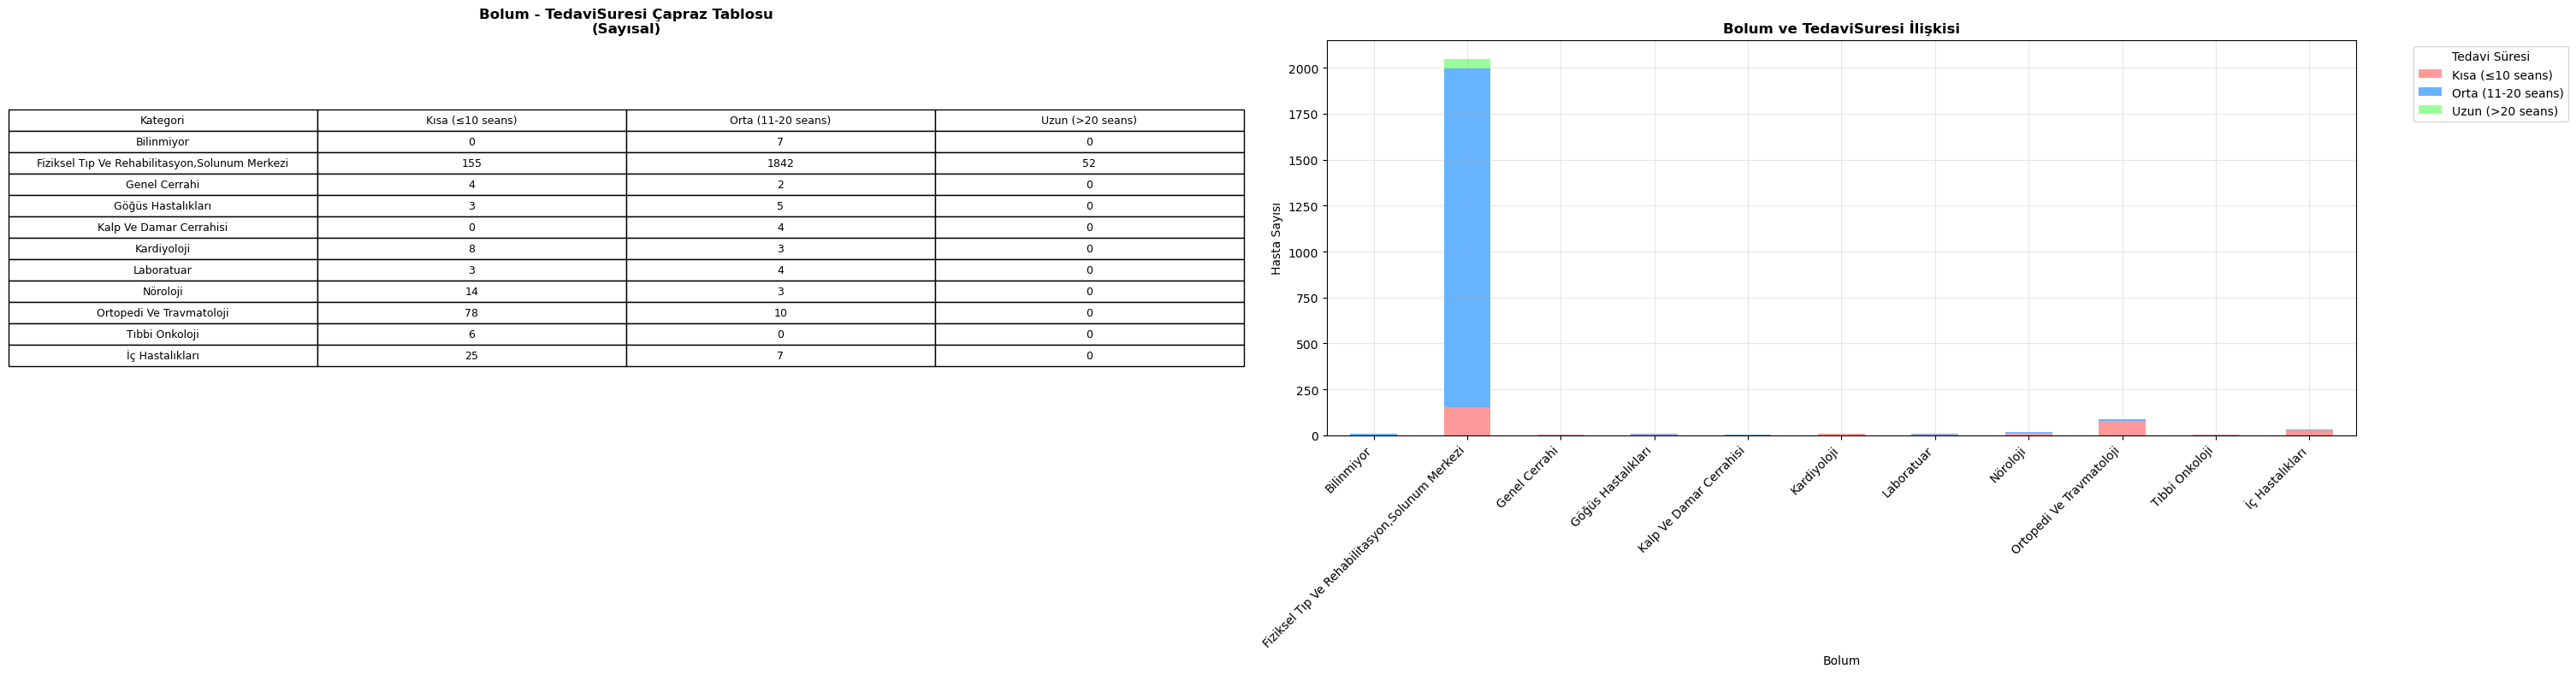


Alerji ile TedaviSuresi İlişkisi
Alerji sütunundaki benzersiz değer sayısı: 20
En yaygın 5 değer:
Alerji
Yok         944
Polen       332
Toz         202
Sucuk       164
Novalgin    144
Name: count, dtype: int64


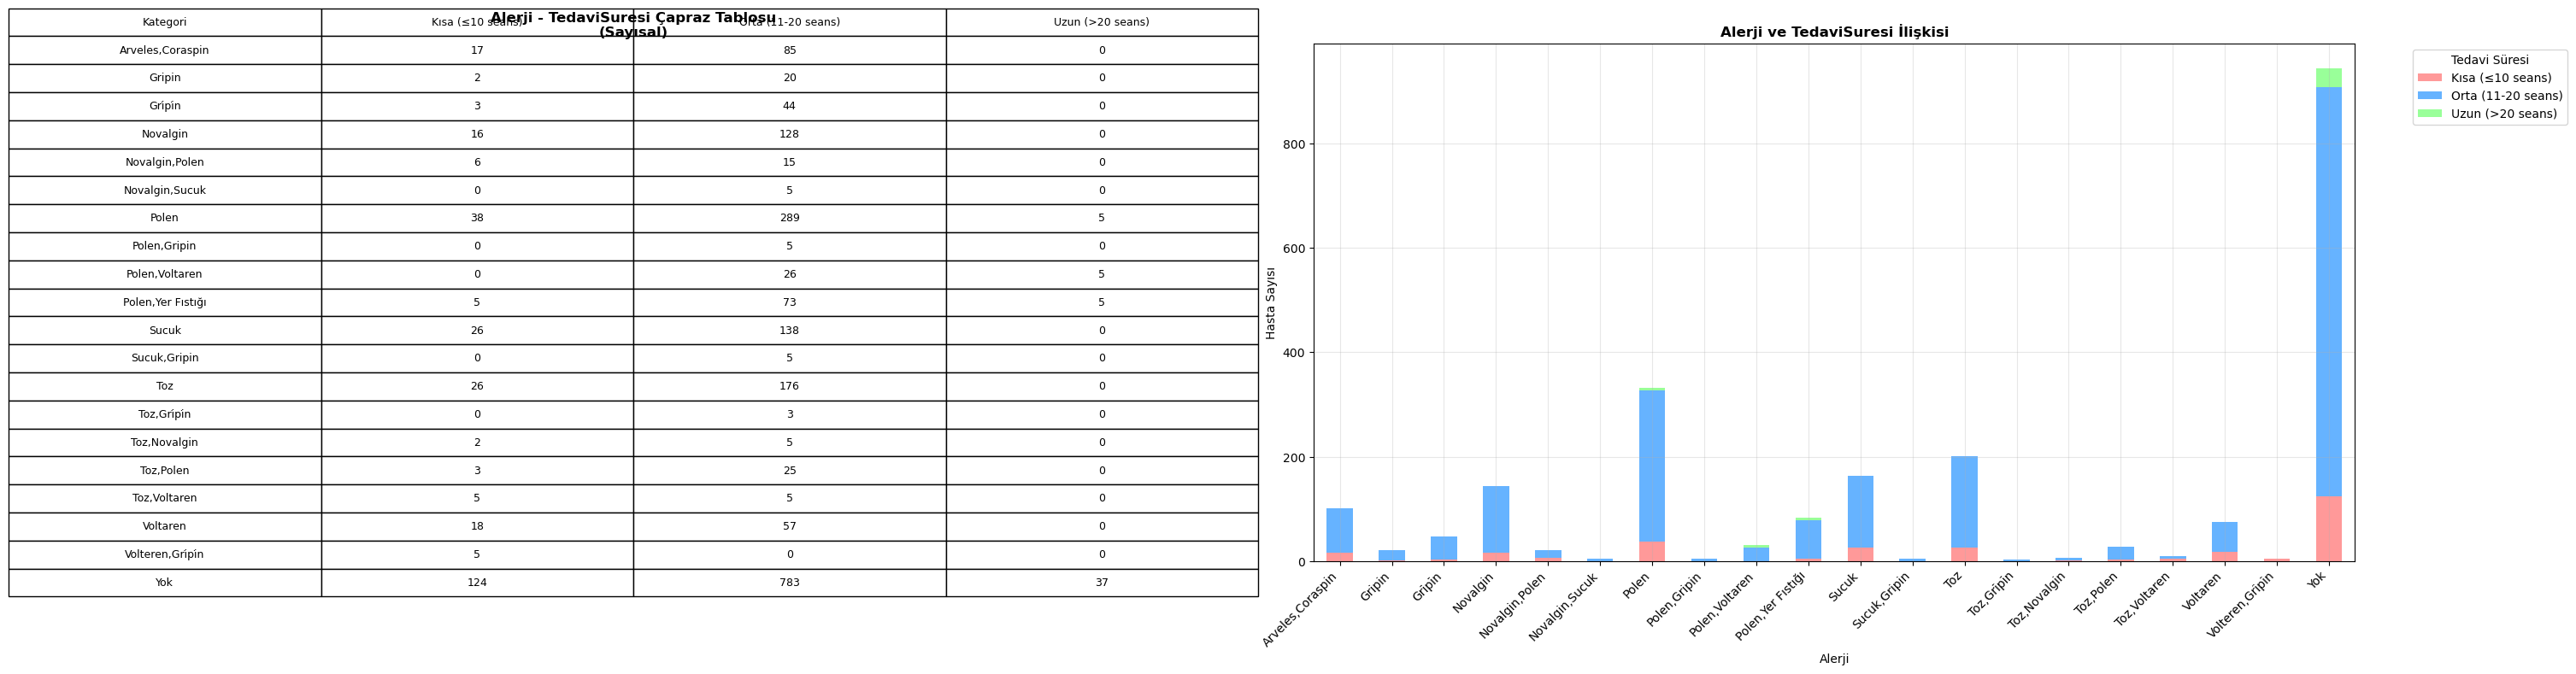

In [171]:
# Kategorik sütunların TedaviSuresi ile ilişkisini görselleştirme
print("=== KATEGORİK SÜTUNLAR İLE HEDEF SÜTUN İLİŞKİSİ ===")

selected_columns = ['Cinsiyet', 'KanGrubu', 'Uyruk', 'Bolum', 'Alerji']

for col in selected_columns:
    if col != 'TedaviSuresi_Kategori':  # Hedef sütunu kendisiyle karşılaştırmayalım
        print(f"\n{col} ile TedaviSuresi İlişkisi")
        print(f"{'='*60}")
        
        # Çapraz tablo oluştur
        cross_tab = pd.crosstab(data_filled[col], data_filled['TedaviSuresi_Kategori'])
                
        print(f"{col} sütunundaki benzersiz değer sayısı: {len(cross_tab)}")
        print(f"En yaygın 5 değer:")
        print(data_filled[col].value_counts().head())

        # Yeni figür oluştur
        fig = plt.figure(figsize=(30, 8))

        # İlk sütun: Çapraz Tablo (Sayısal)
        ax1 = fig.add_subplot(1, 2, 1)
        ax1.axis('off')  # Eksenleri kapat
        ax1.set_title(f"{col} - TedaviSuresi Çapraz Tablosu\n(Sayısal)", fontsize=12, fontweight='bold')
        
        table1 = plt.table(
            cellText=cross_tab.reset_index().values,
            colLabels=["Kategori"] + list(cross_tab.columns),
            loc='center',
            cellLoc='center'
        )
        table1.auto_set_font_size(False)
        table1.set_fontsize(9)
        table1.scale(1.2, 2)

        # İkinci sütun: Yığılmış Bar Grafiği
        ax3 = fig.add_subplot(1, 2, 2)
        cross_tab.plot(kind='bar', stacked=True, ax=ax3, 
                      color=['#ff9999', '#66b3ff', '#99ff99'])  # Kısa, Orta, Uzun için renkler
        ax3.set_title(f"{col} ve TedaviSuresi İlişkisi", fontsize=12, fontweight='bold')
        ax3.set_ylabel("Hasta Sayısı")
        ax3.set_xlabel(col)
        ax3.legend(title='Tedavi Süresi', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(rotation=45, ha='right')
        ax3.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

=== SAYISAL SÜTUNLAR İLE HEDEF SÜTUN İLİŞKİSİ ===

HastaNo ile TedaviSuresi İlişkisi:


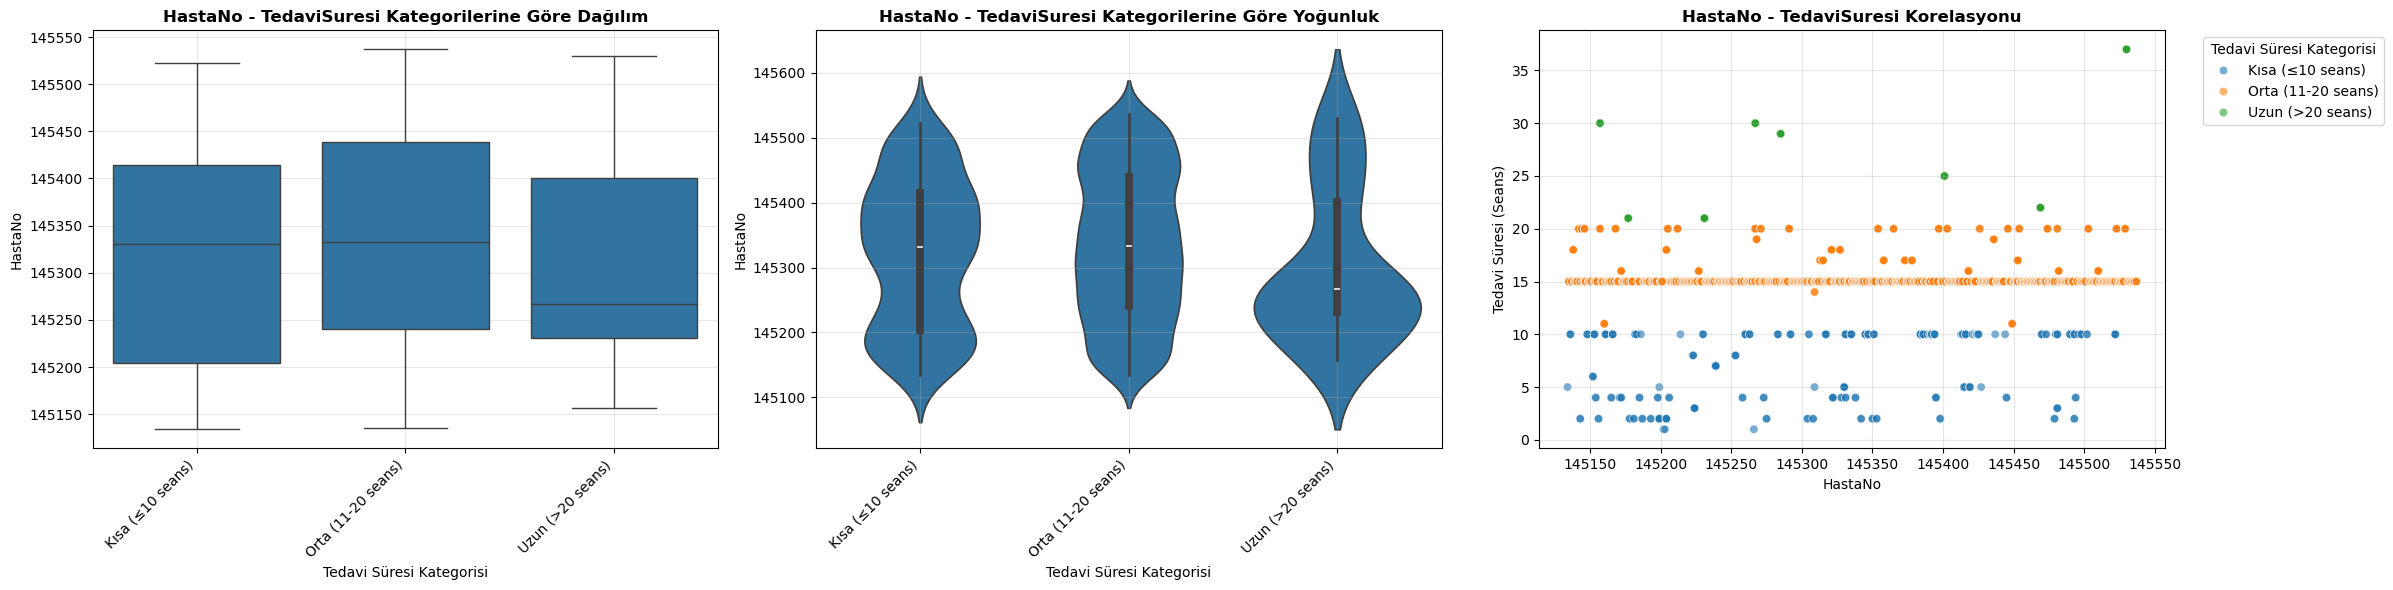


Yas ile TedaviSuresi İlişkisi:


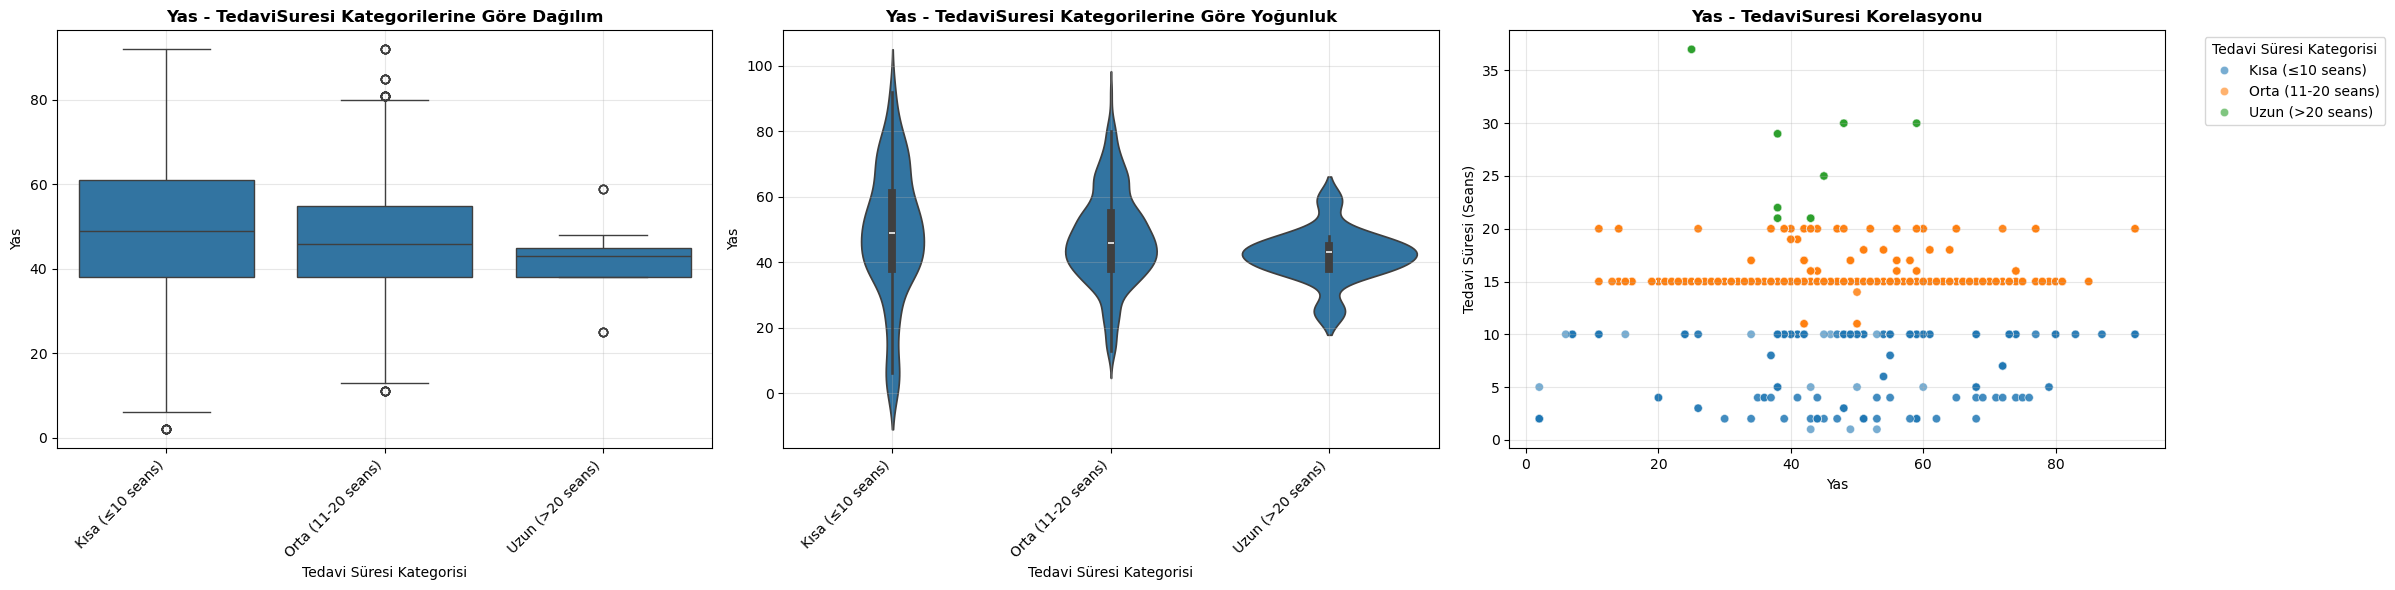


UygulamaSuresi (Dakika) ile TedaviSuresi İlişkisi:


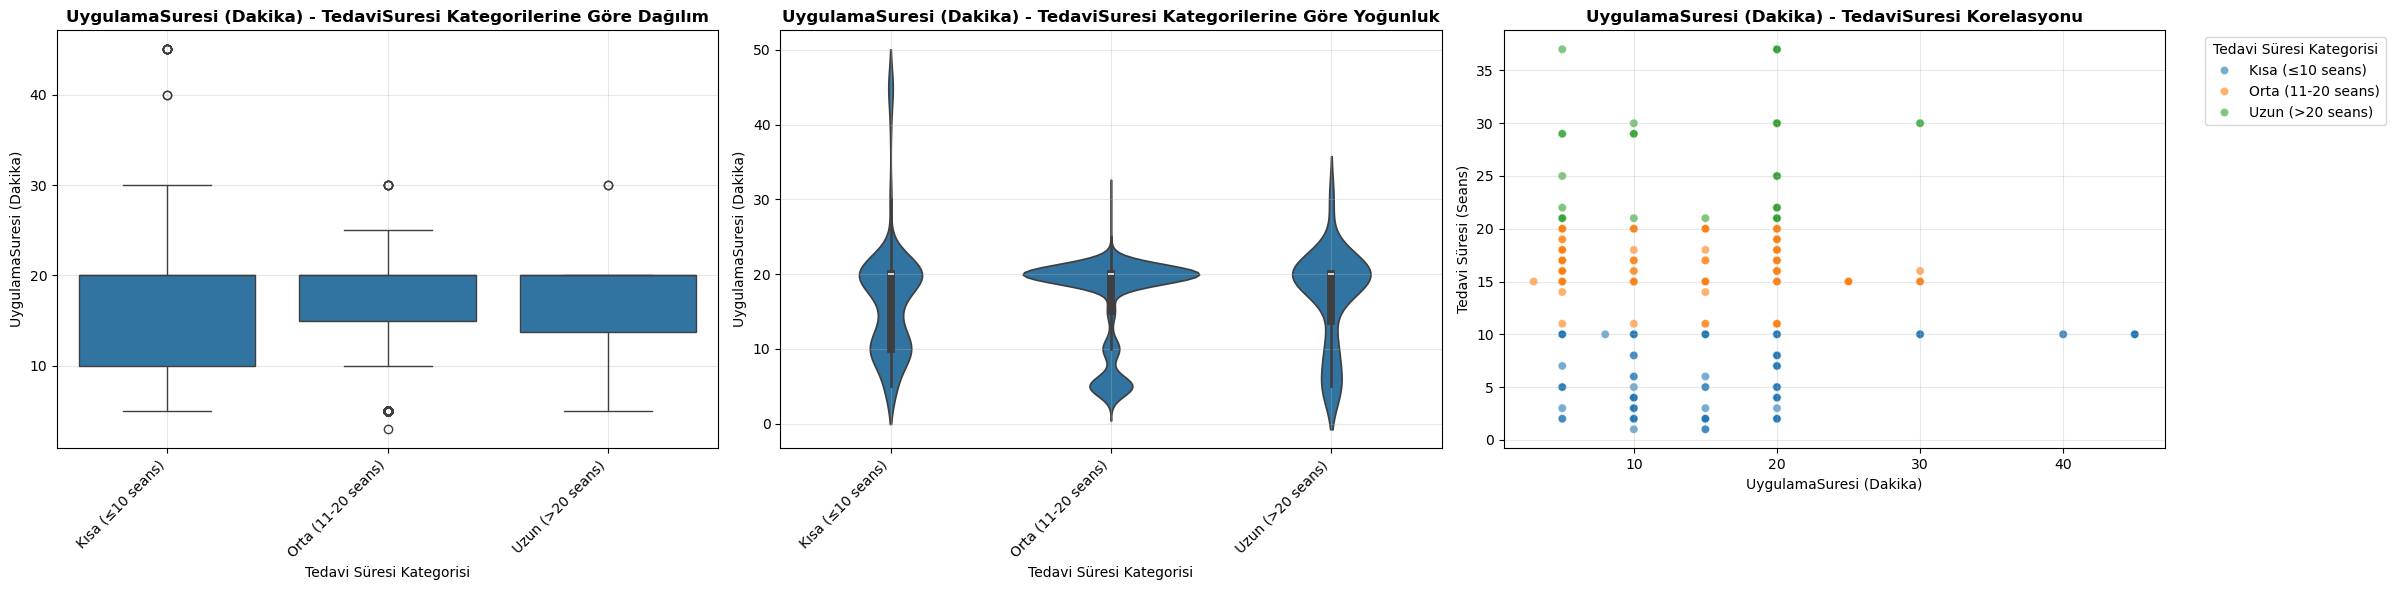

In [172]:
# Sayısal sütunların TedaviSuresi ile ilişkisini görselleştirme
print("=== SAYISAL SÜTUNLAR İLE HEDEF SÜTUN İLİŞKİSİ ===")

# Sayısal sütunları hedef sütun hariç alalım
numerical_cols_for_analysis = [col for col in numerical_columns if col != 'TedaviSuresi (Seans)']

for col in numerical_cols_for_analysis:
    print(f"\n{col} ile TedaviSuresi İlişkisi:")
    
    # Görselleştirme
    fig = plt.figure(figsize=(24, 6))

    # İlk sütun: Boxplot (TedaviSuresi kategorilerine göre)
    ax1 = fig.add_subplot(1, 3, 1)
    sns.boxplot(data=data_filled, x='TedaviSuresi_Kategori', y=col, ax=ax1)
    ax1.set_title(f"{col} - TedaviSuresi Kategorilerine Göre Dağılım", fontsize=12, fontweight='bold')
    ax1.set_xlabel('Tedavi Süresi Kategorisi')
    ax1.set_ylabel(col)
    plt.xticks(rotation=45, ha='right')
    ax1.grid(True, alpha=0.3)

    # İkinci sütun: Violin plot
    ax2 = fig.add_subplot(1, 3, 2)
    sns.violinplot(data=data_filled, x='TedaviSuresi_Kategori', y=col, ax=ax2)
    ax2.set_title(f"{col} - TedaviSuresi Kategorilerine Göre Yoğunluk", fontsize=12, fontweight='bold')
    ax2.set_xlabel('Tedavi Süresi Kategorisi')
    ax2.set_ylabel(col)
    plt.xticks(rotation=45, ha='right')
    ax2.grid(True, alpha=0.3)

    # Üçüncü sütun: Scatter plot
    ax3 = fig.add_subplot(1, 3, 3)
    sns.scatterplot(data=data_filled, x=col, y='TedaviSuresi (Seans)', 
                    hue='TedaviSuresi_Kategori', ax=ax3, alpha=0.6)
    ax3.set_title(f"{col} - TedaviSuresi Korelasyonu", fontsize=12, fontweight='bold')
    ax3.set_xlabel(col)
    ax3.set_ylabel('Tedavi Süresi (Seans)')
    ax3.legend(title='Tedavi Süresi Kategorisi', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax3.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

In [173]:
# Korelasyon hesapla
correlation = data_filled[col].corr(data_filled['TedaviSuresi (Seans)'])
print(f"\n{col} ile TedaviSuresi arasındaki korelasyon: {correlation:.3f}")
    
# Kategori bazlı istatistikler
print(f"\n{col} - TedaviSuresi kategorilerine göre istatistikler:")
stats_by_category = data_filled.groupby('TedaviSuresi_Kategori')[col].describe()
stats_by_category


UygulamaSuresi (Dakika) ile TedaviSuresi arasındaki korelasyon: 0.078

UygulamaSuresi (Dakika) - TedaviSuresi kategorilerine göre istatistikler:


count       mean       std  min    25%   50%   75%  \
TedaviSuresi_Kategori                                                        
Kısa (≤10 seans)        296.0  16.530405  7.909601  5.0  10.00  20.0  20.0   
Orta (11-20 seans)     1887.0  16.567568  5.971705  3.0  15.00  20.0  20.0   
Uzun (>20 seans)         52.0  17.019231  6.360079  5.0  13.75  20.0  20.0   

                        max  
TedaviSuresi_Kategori        
Kısa (≤10 seans)       45.0  
Orta (11-20 seans)     30.0  
Uzun (>20 seans)       30.0

In [174]:
# Hedef sütun ile tüm sütunlar arasındaki ilişki özeti
print("=== HEDEF SÜTUN İLE İLİŞKİ ANALİZİ ÖZETİ ===")

# TedaviSuresi kategorilerinin genel dağılımı
print("\n1. TedaviSuresi Kategorilerinin Dağılımı:")
category_distribution = data_filled['TedaviSuresi_Kategori'].value_counts()
category_percentage = data_filled['TedaviSuresi_Kategori'].value_counts(normalize=True) * 100

for category in category_distribution.index:
    count = category_distribution[category]
    percentage = category_percentage[category]
    print(f"   {category}: {count} hasta (%{percentage:.1f})")

# Sayısal sütunlar ile korelasyon özeti
print("\n2. Sayısal Sütunlar ile TedaviSuresi Korelasyonları:")
correlation_summary = []
for col in numerical_cols_for_analysis:
    corr = data_filled[col].corr(data_filled['TedaviSuresi (Seans)'])
    correlation_summary.append({
        'Sütun': col,
        'Korelasyon': round(corr, 3),
        'İlişki_Gücü': 'Güçlü' if abs(corr) > 0.5 else 'Orta' if abs(corr) > 0.3 else 'Zayıf'})

corr_df = pd.DataFrame(correlation_summary)
corr_df

=== HEDEF SÜTUN İLE İLİŞKİ ANALİZİ ÖZETİ ===

1. TedaviSuresi Kategorilerinin Dağılımı:
   Orta (11-20 seans): 1887 hasta (%84.4)
   Kısa (≤10 seans): 296 hasta (%13.2)
   Uzun (>20 seans): 52 hasta (%2.3)

2. Sayısal Sütunlar ile TedaviSuresi Korelasyonları:


Sütun  Korelasyon İlişki_Gücü
0                  HastaNo       0.052       Zayıf
1                      Yas      -0.013       Zayıf
2  UygulamaSuresi (Dakika)       0.078       Zayıf

=== AYKIRI DEĞER (OUTLIER) ANALİZİ ===

HastaNo - Outlier Analizi
Alt sınır: 144939.50
Üst sınır: 145727.50
Outlier sayısı: 0
Outlier oranı: %0.00


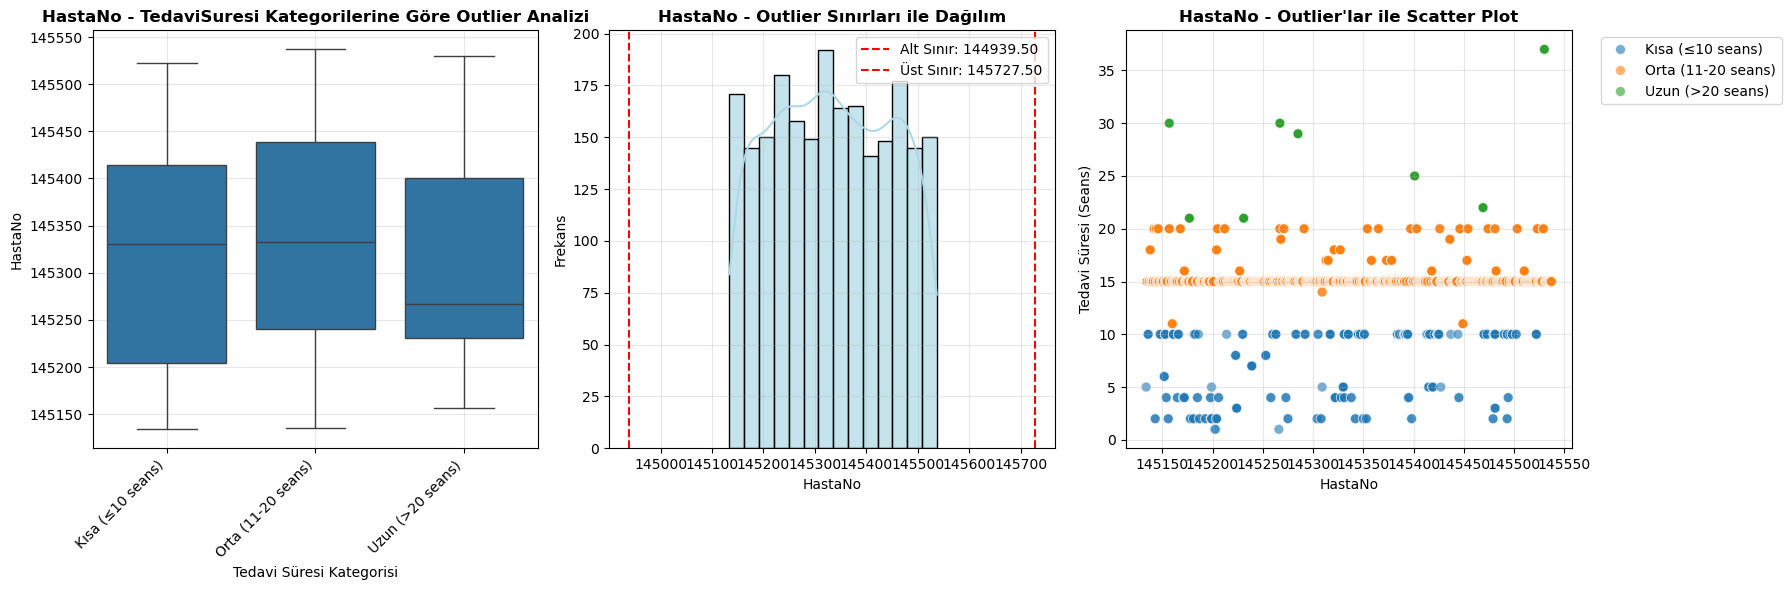


Yas - Outlier Analizi
Alt sınır: 11.00
Üst sınır: 83.00
Outlier sayısı: 41
Outlier oranı: %1.83


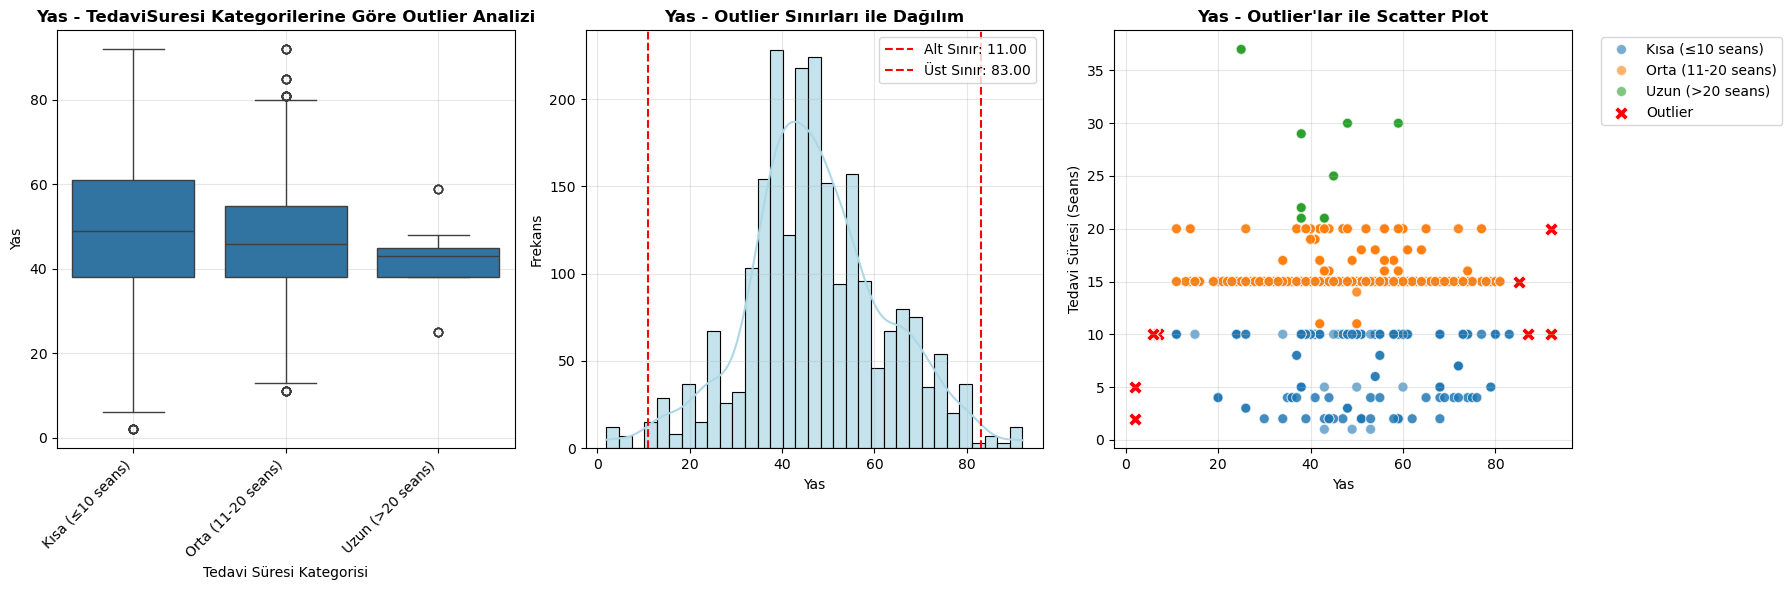


Outlier değerler:
En küçük outlier: 2.00
En büyük outlier: 92.00
Outlier'ların TedaviSuresi dağılımı:
TedaviSuresi_Kategori
Kısa (≤10 seans)      27
Orta (11-20 seans)    14
Name: count, dtype: int64

TedaviSuresi (Seans) - Outlier Analizi
Alt sınır: 15.00
Üst sınır: 15.00
Outlier sayısı: 565
Outlier oranı: %25.28


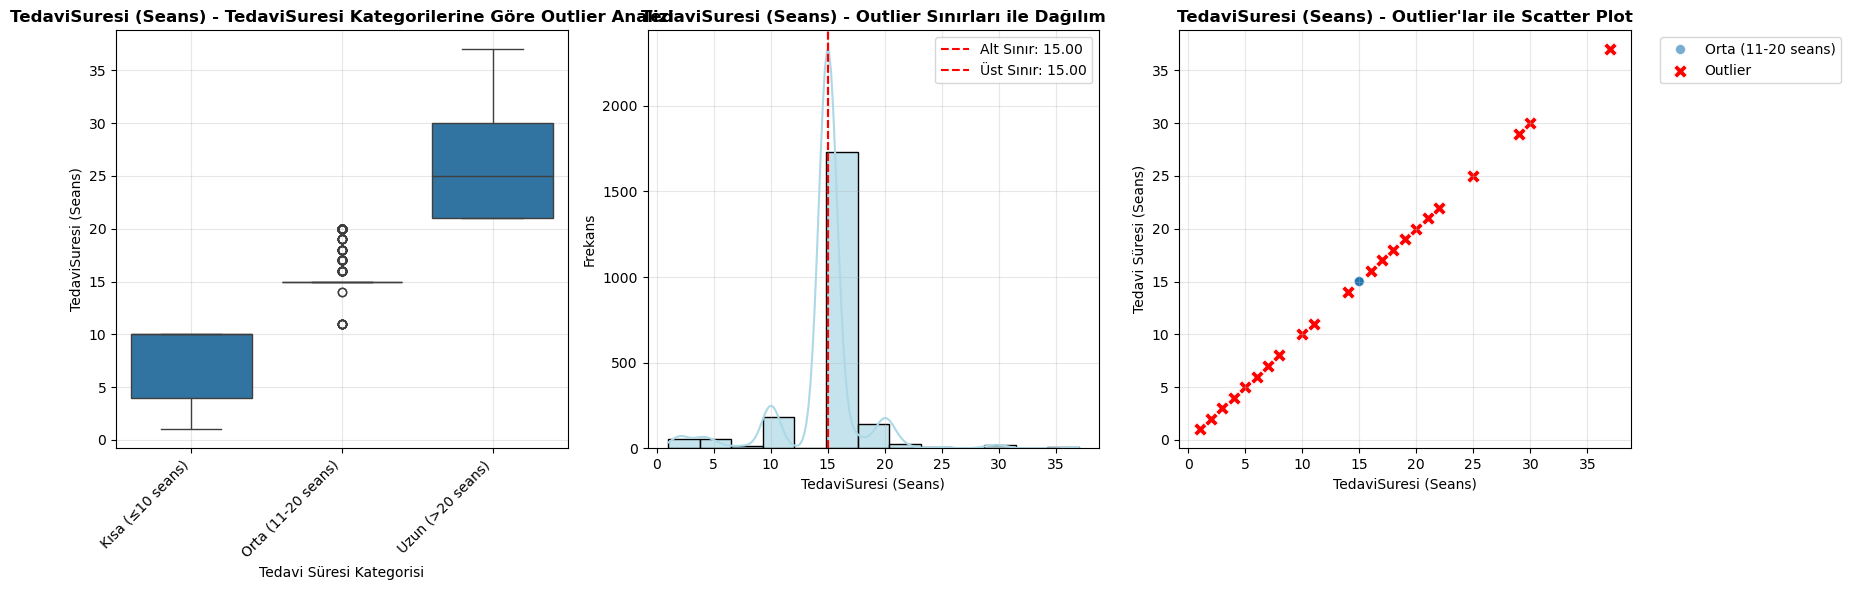


Outlier değerler:
En küçük outlier: 1.00
En büyük outlier: 37.00
Outlier'ların TedaviSuresi dağılımı:
TedaviSuresi_Kategori
Kısa (≤10 seans)      296
Orta (11-20 seans)    217
Uzun (>20 seans)       52
Name: count, dtype: int64

UygulamaSuresi (Dakika) - Outlier Analizi
Alt sınır: -5.00
Üst sınır: 35.00
Outlier sayısı: 12
Outlier oranı: %0.54


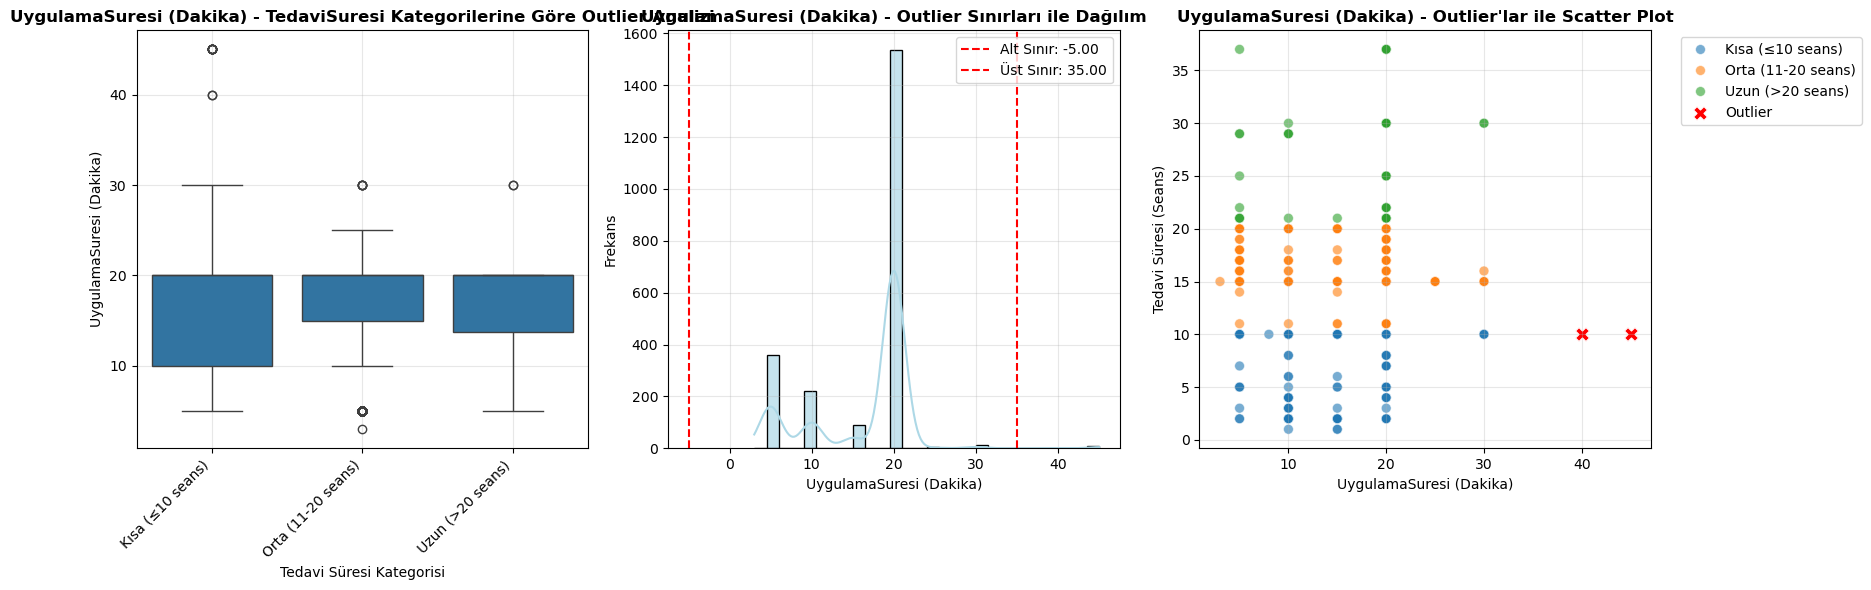


Outlier değerler:
En küçük outlier: 40.00
En büyük outlier: 45.00
Outlier'ların TedaviSuresi dağılımı:
TedaviSuresi_Kategori
Kısa (≤10 seans)    12
Name: count, dtype: int64


In [175]:
# Aykırı değer (Outlier) analizi
print("=== AYKIRI DEĞER (OUTLIER) ANALİZİ ===")

# Sayısal sütunlar için outlier analizi
for col in numerical_columns:
    print(f"\n{col} - Outlier Analizi")
    print(f"{'='*50}")
    
    # IQR yöntemi ile outlier hesaplama
    Q1 = data_filled[col].quantile(0.25)
    Q3 = data_filled[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Outlier'ları bul
    outliers = data_filled[(data_filled[col] < lower_bound) | (data_filled[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(data_filled)) * 100
    
    print(f"Alt sınır: {lower_bound:.2f}")
    print(f"Üst sınır: {upper_bound:.2f}")
    print(f"Outlier sayısı: {outlier_count}")
    print(f"Outlier oranı: %{outlier_percentage:.2f}")
    
    # Görselleştirme
    fig = plt.figure(figsize=(18, 6))

    # İlk sütun: Boxplot (TedaviSuresi kategorilerine göre)
    ax1 = fig.add_subplot(1, 3, 1)
    sns.boxplot(data=data_filled, x='TedaviSuresi_Kategori', y=col, ax=ax1)
    ax1.set_title(f"{col} - TedaviSuresi Kategorilerine Göre Outlier Analizi", fontsize=12, fontweight='bold')
    ax1.set_xlabel('Tedavi Süresi Kategorisi')
    ax1.set_ylabel(col)
    plt.xticks(rotation=45, ha='right')
    ax1.grid(True, alpha=0.3)

    # İkinci sütun: Histogram (Outlier'lar vurgulanmış)
    ax2 = fig.add_subplot(1, 3, 2)
    sns.histplot(data_filled[col], kde=True, ax=ax2, color='lightblue', alpha=0.7)
    ax2.axvline(lower_bound, color='red', linestyle='--', label=f'Alt Sınır: {lower_bound:.2f}')
    ax2.axvline(upper_bound, color='red', linestyle='--', label=f'Üst Sınır: {upper_bound:.2f}')
    ax2.set_title(f"{col} - Outlier Sınırları ile Dağılım", fontsize=12, fontweight='bold')
    ax2.set_xlabel(col)
    ax2.set_ylabel('Frekans')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # Üçüncü sütun: Scatter plot (Outlier'lar vurgulanmış)
    ax3 = fig.add_subplot(1, 3, 3)
    # Normal değerler
    normal_data = data_filled[(data_filled[col] >= lower_bound) & (data_filled[col] <= upper_bound)]
    sns.scatterplot(data=normal_data, x=col, y='TedaviSuresi (Seans)', 
                    hue='TedaviSuresi_Kategori', ax=ax3, alpha=0.6, s=50)
    
    # Outlier'lar
    if len(outliers) > 0:
        sns.scatterplot(data=outliers, x=col, y='TedaviSuresi (Seans)', 
                        color='red', ax=ax3, s=100, marker='X', label='Outlier')
    
    ax3.set_title(f"{col} - Outlier'lar ile Scatter Plot", fontsize=12, fontweight='bold')
    ax3.set_xlabel(col)
    ax3.set_ylabel('Tedavi Süresi (Seans)')
    ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax3.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()
    
    # Outlier'ların detayları
    if len(outliers) > 0:
        print(f"\nOutlier değerler:")
        print(f"En küçük outlier: {outliers[col].min():.2f}")
        print(f"En büyük outlier: {outliers[col].max():.2f}")
        print(f"Outlier'ların TedaviSuresi dağılımı:")
        print(outliers['TedaviSuresi_Kategori'].value_counts())

=== SAYISAL SÜTUNLAR İLE HEDEF SÜTUN İLİŞKİSİ ===


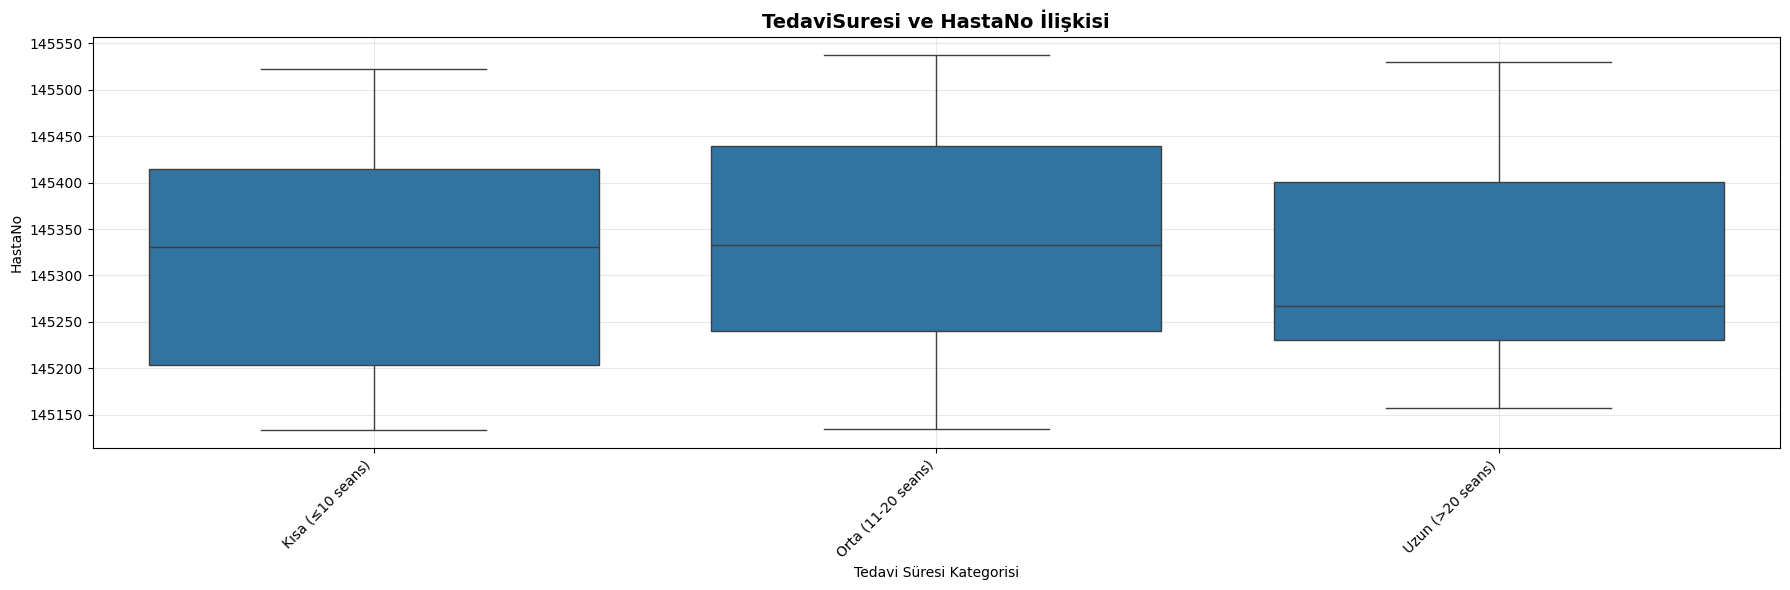

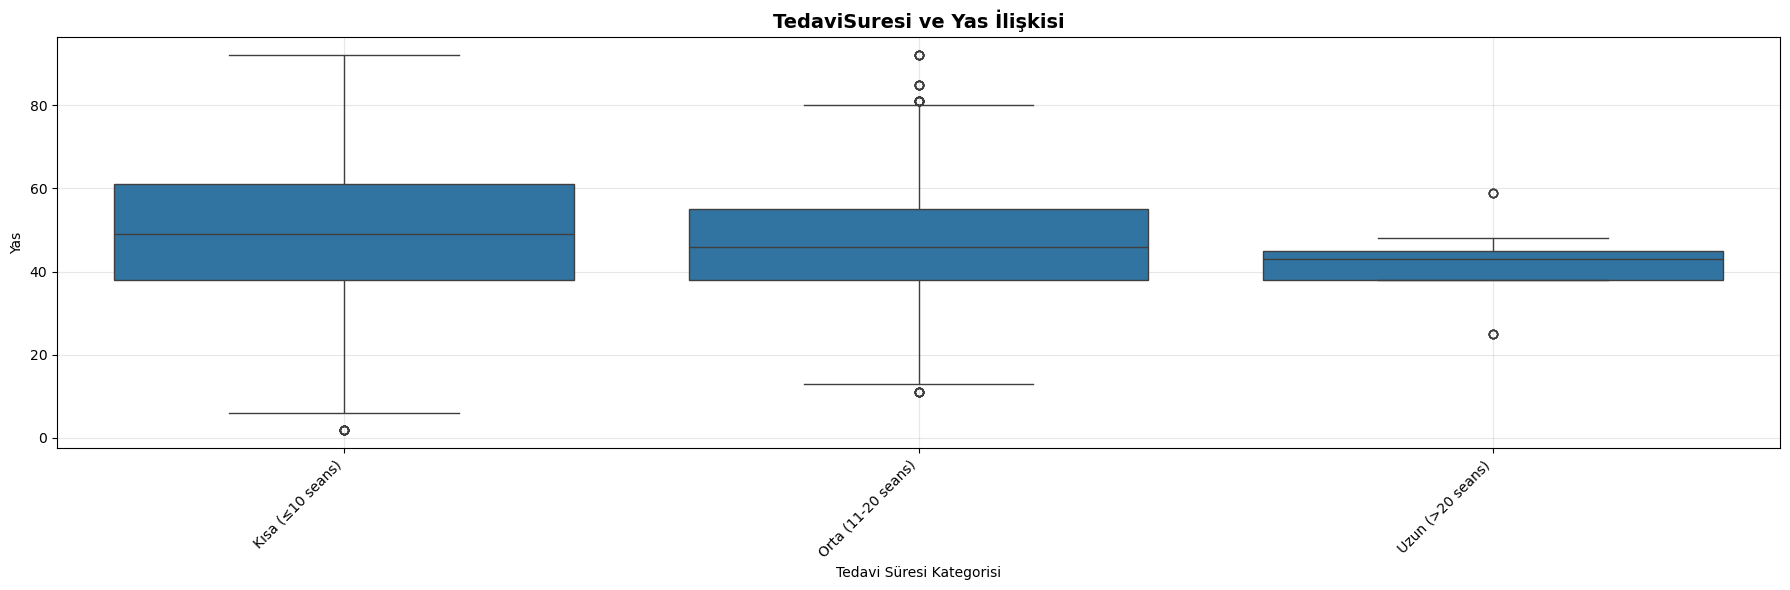

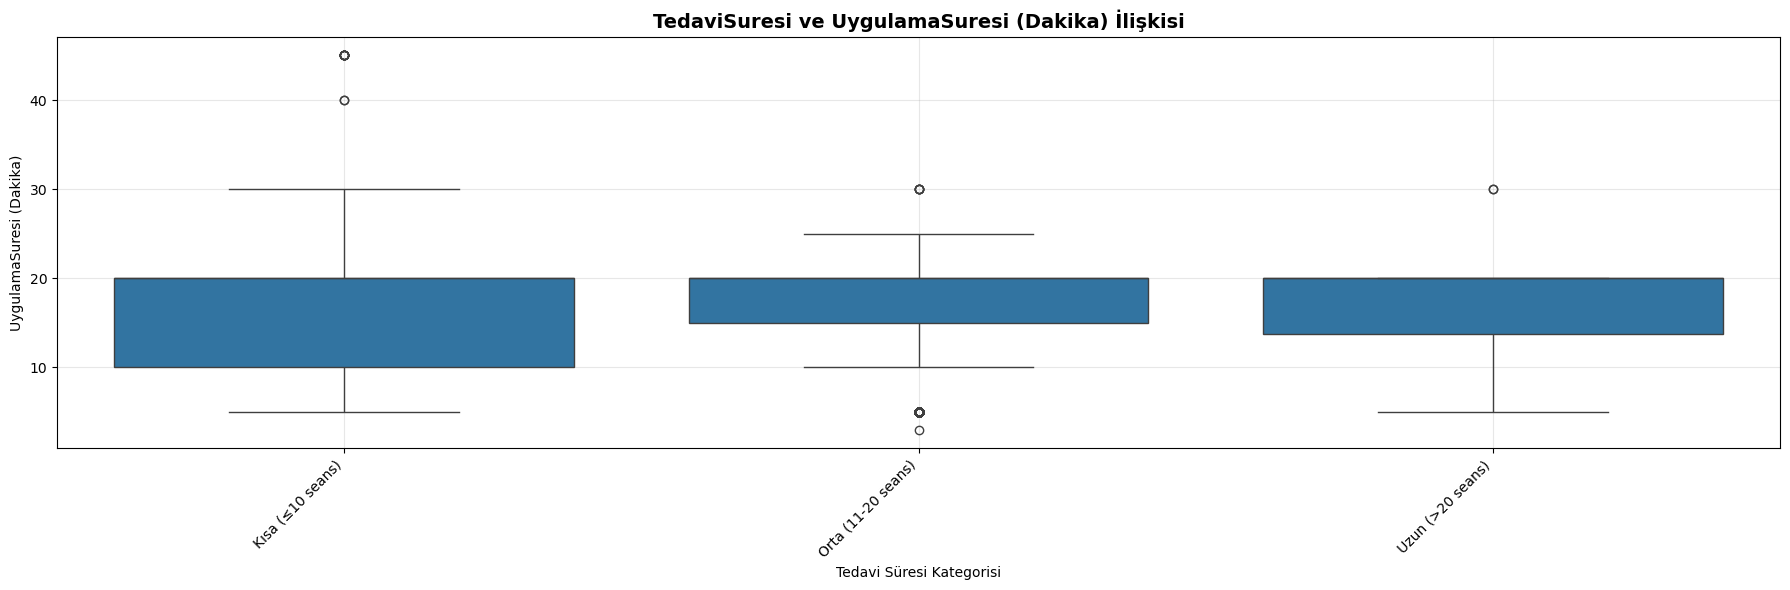

In [176]:
# Sayısal sütunların hedef sütun ile ilişkisini görselleştirme
print("=== SAYISAL SÜTUNLAR İLE HEDEF SÜTUN İLİŞKİSİ ===")

for col in numerical_columns:
    if col != 'TedaviSuresi (Seans)':  # Hedef sütunu kendisiyle karşılaştırmayalım
        fig = plt.figure(figsize=(18, 6))

        # Boxplot için grafik
        sns.boxplot(x=data_filled['TedaviSuresi_Kategori'], y=data_filled[col])
        plt.title(f"TedaviSuresi ve {col} İlişkisi", fontsize=14, fontweight='bold')
        plt.xlabel("Tedavi Süresi Kategorisi")
        plt.ylabel(col)
        plt.xticks(rotation=45, ha='right')
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

=== AYKIRI DEĞER GÖRSELLEŞTİRMESİ ===


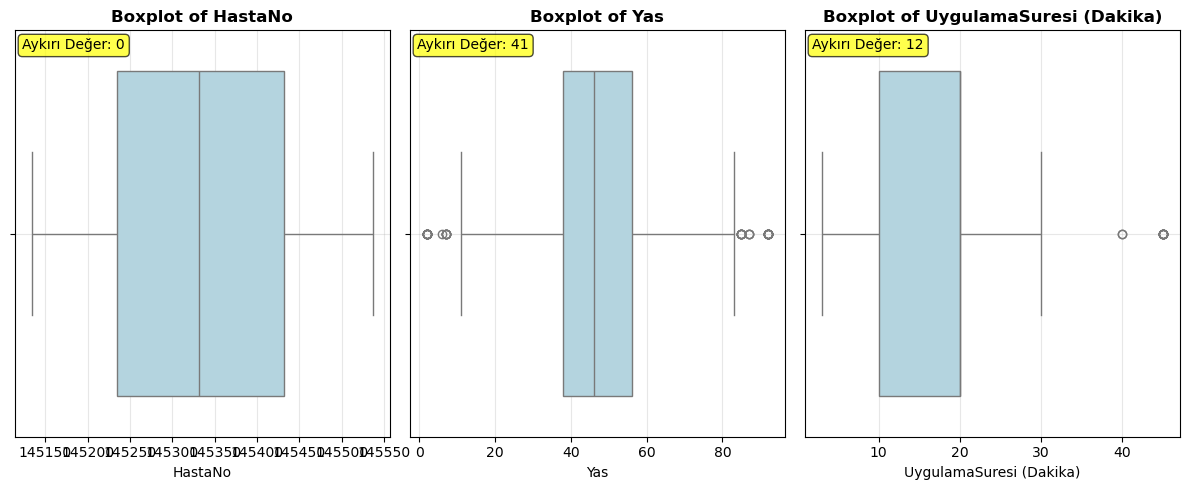

In [177]:
# Boxplot ile aykırı değerleri görselleştirme
print("=== AYKIRI DEĞER GÖRSELLEŞTİRMESİ ===")

# Sayısal sütunları hedef sütun hariç alalım
numerical_cols_for_outlier = [col for col in numerical_columns if col != 'TedaviSuresi (Seans)']

plt.figure(figsize=(12, 5))
for i, col in enumerate(numerical_cols_for_outlier, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=data_filled, x=col, color='lightblue')
    plt.title(f'Boxplot of {col}', fontsize=12, fontweight='bold')
    plt.xlabel(col)
    plt.grid(True, alpha=0.3)
    
    # Aykırı değer sayısını hesapla ve göster
    Q1 = data_filled[col].quantile(0.25)
    Q3 = data_filled[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data_filled[(data_filled[col] < lower_bound) | (data_filled[col] > upper_bound)]
    outlier_count = len(outliers)
    
    plt.text(0.02, 0.98, f'Aykırı Değer: {outlier_count}', 
             transform=plt.gca().transAxes, fontsize=10, 
             bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7),
             verticalalignment='top')

plt.tight_layout()
plt.show()

In [178]:
# IQR yöntemiyle aykırı değer tespiti

outlier_summary = {}
outlier_details = {}

for col in numerical_cols_for_outlier:
    Q1 = data_filled[col].quantile(0.25)
    Q3 = data_filled[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data_filled[(data_filled[col] < lower_bound) | (data_filled[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(data_filled)) * 100
    
    outlier_summary[col] = {
        'Aykırı_Değer_Sayısı': outlier_count,
        'Aykırı_Değer_Oranı': round(outlier_percentage, 2),
        'Alt_Sınır': round(lower_bound, 2),
        'Üst_Sınır': round(upper_bound, 2),
        'Q1': round(Q1, 2),
        'Q3': round(Q3, 2),
        'IQR': round(IQR, 2)
    }
    
    # Detaylı aykırı değer bilgileri
    if outlier_count > 0:
        outlier_details[col] = {
            'Min_Aykırı': round(outliers[col].min(), 2),
            'Max_Aykırı': round(outliers[col].max(), 2),
            'Ortalama_Aykırı': round(outliers[col].mean(), 2)
        }

# Aykırı değer özetini bir DataFrame olarak düzenleme
outlier_df = pd.DataFrame(outlier_summary).T
outlier_df.reset_index(inplace=True)
outlier_df.rename(columns={'index': 'Sütun'}, inplace=True)
outlier_df

Sütun  Aykırı_Değer_Sayısı  Aykırı_Değer_Oranı  \
0                  HastaNo                  0.0                0.00   
1                      Yas                 41.0                1.83   
2  UygulamaSuresi (Dakika)                 12.0                0.54   

   Alt_Sınır  Üst_Sınır        Q1        Q3    IQR  
0   144939.5   145727.5  145235.0  145432.0  197.0  
1       11.0       83.0      38.0      56.0   18.0  
2       -5.0       35.0      10.0      20.0   10.0

In [179]:
# Detaylı aykırı değer bilgileri
if outlier_details:
    print("\nDetaylı aykırı değer bilgileri:")
    outlier_details_df = pd.DataFrame(outlier_details).T
    outlier_details_df.reset_index(inplace=True)
    outlier_details_df.rename(columns={'index': 'Sütun'}, inplace=True)
    print(outlier_details_df)


Detaylı aykırı değer bilgileri:
                     Sütun  Min_Aykırı  Max_Aykırı  Ortalama_Aykırı
0                      Yas         2.0        92.0            49.56
1  UygulamaSuresi (Dakika)        40.0        45.0            44.17


=== AYKIRI DEĞER İŞLEME STRATEJİLERİ ===
1. En çok aykırı değer içeren sütunlar:
   Yas: 41.0 aykırı değer (%1.83)
   UygulamaSuresi (Dakika): 12.0 aykırı değer (%0.54)

2. Aykırı değer işleme önerileri:
   HastaNo: %0.0 aykırı değer - Çok düşük aykırı değer - Sorun yok
   Yas: %1.83 aykırı değer - Düşük seviye aykırı değer - Normal kabul edilebilir
   UygulamaSuresi (Dakika): %0.54 aykırı değer - Çok düşük aykırı değer - Sorun yok

3. Detaylı aykırı değer analizi:


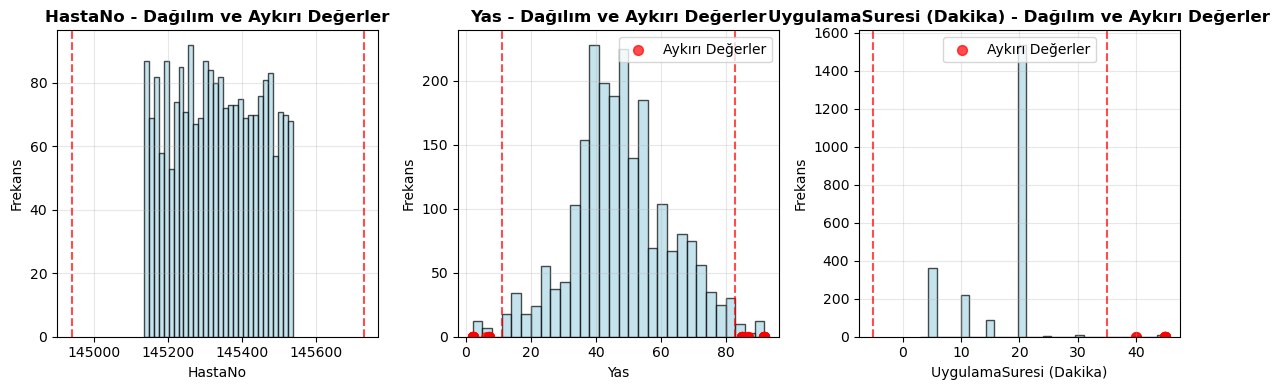

In [180]:
# Aykırı değer işleme stratejileri
print("=== AYKIRI DEĞER İŞLEME STRATEJİLERİ ===")

# En çok aykırı değer içeren sütunları belirle
print("1. En çok aykırı değer içeren sütunlar:")
top_outlier_cols = outlier_df.nlargest(2, 'Aykırı_Değer_Sayısı')
for idx, row in top_outlier_cols.iterrows():
    print(f"   {row['Sütun']}: {row['Aykırı_Değer_Sayısı']} aykırı değer (%{row['Aykırı_Değer_Oranı']})")

# Aykırı değer işleme önerileri
print("\n2. Aykırı değer işleme önerileri:")
for idx, row in outlier_df.iterrows():
    col = row['Sütun']
    count = row['Aykırı_Değer_Sayısı']
    percentage = row['Aykırı_Değer_Oranı']
    
    if percentage > 10:
        recommendation = "Dikkatli inceleme gerekli - Yüksek aykırı değer oranı"
    elif percentage > 5:
        recommendation = "Orta seviye aykırı değer - İnceleme önerilir"
    elif percentage > 1:
        recommendation = "Düşük seviye aykırı değer - Normal kabul edilebilir"
    else:
        recommendation = "Çok düşük aykırı değer - Sorun yok"
    
    print(f"   {col}: %{percentage} aykırı değer - {recommendation}")

# Aykırı değer görselleştirmesi (detaylı)
print("\n3. Detaylı aykırı değer analizi:")
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes = axes.ravel()

for i, col in enumerate(numerical_cols_for_outlier):
    if i < 4:  # Sadece ilk 4 sütunu göster
        # Histogram + Boxplot kombinasyonu
        ax1 = axes[i]
        
        # Histogram
        ax1.hist(data_filled[col], bins=30, alpha=0.7, color='lightblue', edgecolor='black')
        ax1.set_title(f'{col} - Dağılım ve Aykırı Değerler', fontsize=12, fontweight='bold')
        ax1.set_xlabel(col)
        ax1.set_ylabel('Frekans')
        ax1.grid(True, alpha=0.3)
        
        # Aykırı değerleri vurgula
        Q1 = data_filled[col].quantile(0.25)
        Q3 = data_filled[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = data_filled[(data_filled[col] < lower_bound) | (data_filled[col] > upper_bound)]
        if len(outliers) > 0:
            ax1.scatter(outliers[col], [0]*len(outliers), color='red', s=50, alpha=0.7, label='Aykırı Değerler')
            ax1.legend()
        
        # Sınırları çiz
        ax1.axvline(lower_bound, color='red', linestyle='--', alpha=0.7, label=f'Alt Sınır: {lower_bound:.1f}')
        ax1.axvline(upper_bound, color='red', linestyle='--', alpha=0.7, label=f'Üst Sınır: {upper_bound:.1f}')

plt.tight_layout()
plt.show()

In [181]:
# Kategorik sütunları analiz et ve encoding stratejilerini belirle
print("=== KATEGORİK SÜTUNLAR ENCODING ANALİZİ ===")

# Kategorik sütunları tekrar belirle
categorical_columns = data_filled.select_dtypes(include=['object']).columns.tolist()
print(f"Toplam kategorik sütun sayısı: {len(categorical_columns)}")
print(f"Kategorik sütunlar: {categorical_columns}")

# Her kategorik sütun için analiz
encoding_strategy = {}

for col in categorical_columns:
    unique_count = data_filled[col].nunique()
    total_count = len(data_filled)
    unique_ratio = unique_count / total_count
    
    print(f"\n{col}:")
    print(f"  Benzersiz değer sayısı: {unique_count}")
    print(f"  En yaygın değerler:")
    print(data_filled[col].value_counts().head(5))
    
    # Encoding stratejisi belirleme
    if unique_count <= 5:
        strategy = "OneHotEncoder (Az kategori)"
    elif unique_count <= 20:
        strategy = "OneHotEncoder (Orta kategori)"
    else:
        strategy = "LabelEncoder veya Target Encoding (Çok kategori)"
    
    encoding_strategy[col] = {
        'unique_count': unique_count,
        'unique_ratio': unique_ratio,
        'strategy': strategy
    }
    
    print(f"  Önerilen strateji: {strategy}")

print(f"\n=== ENCODING STRATEJİLERİ ÖZETİ ===")
for col, info in encoding_strategy.items():
    print(f"{col}: {info['strategy']} ({info['unique_count']} kategori)")

=== KATEGORİK SÜTUNLAR ENCODING ANALİZİ ===
Toplam kategorik sütun sayısı: 10
Kategorik sütunlar: ['Cinsiyet', 'KanGrubu', 'Uyruk', 'KronikHastalik', 'Bolum', 'Alerji', 'Tanilar', 'TedaviAdi', 'UygulamaYerleri', 'TedaviSuresi_Kategori']

Cinsiyet:
  Benzersiz değer sayısı: 3
  En yaygın değerler:
Cinsiyet
Kadın         1298
Erkek          792
Bilinmiyor     145
Name: count, dtype: int64
  Önerilen strateji: OneHotEncoder (Az kategori)

KanGrubu:
  Benzersiz değer sayısı: 9
  En yaygın değerler:
KanGrubu
Bilinmiyor    644
0 Rh+         590
A Rh+         546
B Rh+         211
AB Rh+         82
Name: count, dtype: int64
  Önerilen strateji: OneHotEncoder (Orta kategori)

Uyruk:
  Benzersiz değer sayısı: 5
  En yaygın değerler:
Uyruk
Türkiye       2173
Tokelau         27
Arnavutluk      13
Azerbaycan      12
Libya           10
Name: count, dtype: int64
  Önerilen strateji: OneHotEncoder (Az kategori)

KronikHastalik:
  Benzersiz değer sayısı: 221
  En yaygın değerler:
KronikHastalik
Bilinm

In [182]:
# OneHotEncoder ile kategorik sütunları encode et
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd

print("=== ONEHOT ENCODING İŞLEMİ ===")

# Encoding için veri setinin kopyasını oluştur
data_encoded = data_filled.copy()

# OneHotEncoder için uygun sütunları belirle (az kategori olanlar)
onehot_columns = []
label_columns = []

for col, info in encoding_strategy.items():
    if info['unique_count'] <= 20:  # 20'den az kategori olan sütunlar
        onehot_columns.append(col)
    else:
        label_columns.append(col)

print(f"OneHotEncoder ile encode edilecek sütunlar: {onehot_columns}")
print(f"LabelEncoder ile encode edilecek sütunlar: {label_columns}")

# OneHotEncoder uygula
if onehot_columns:
    print(f"\nOneHotEncoder uygulanıyor...")
    
    # OneHotEncoder'ı oluştur
    onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
    
    # Kategorik sütunları encode et
    encoded_features = onehot_encoder.fit_transform(data_encoded[onehot_columns])
    
    # Yeni sütun isimlerini oluştur
    feature_names = []
    for i, col in enumerate(onehot_columns):
        categories = onehot_encoder.categories_[i]
        for j, category in enumerate(categories[1:]):  # drop='first' nedeniyle ilk kategoriyi atla
            feature_names.append(f"{col}_{category}")
    
    # Encoded features'ları DataFrame'e çevir
    encoded_df = pd.DataFrame(encoded_features, columns=feature_names, index=data_encoded.index)
    
    # Orijinal kategorik sütunları sil ve encoded sütunları ekle
    data_encoded = data_encoded.drop(columns=onehot_columns)
    data_encoded = pd.concat([data_encoded, encoded_df], axis=1)
    
    print(f"OneHotEncoder tamamlandı. {len(feature_names)} yeni sütun oluşturuldu.")
else:
    print("OneHotEncoder için uygun sütun bulunamadı.")

print(f"\nEncoded veri seti shape: {data_encoded.shape}")
print(f"Yeni sütun sayısı: {data_encoded.shape[1]}")

=== ONEHOT ENCODING İŞLEMİ ===
OneHotEncoder ile encode edilecek sütunlar: ['Cinsiyet', 'KanGrubu', 'Uyruk', 'Bolum', 'Alerji', 'TedaviSuresi_Kategori']
LabelEncoder ile encode edilecek sütunlar: ['KronikHastalik', 'Tanilar', 'TedaviAdi', 'UygulamaYerleri']

OneHotEncoder uygulanıyor...
OneHotEncoder tamamlandı. 45 yeni sütun oluşturuldu.

Encoded veri seti shape: (2235, 53)
Yeni sütun sayısı: 53


In [183]:
# LabelEncoder ile kalan kategorik sütunları encode et
print("=== LABEL ENCODING İŞLEMİ ===")

# Kalan kategorik sütunları kontrol et
remaining_categorical = data_encoded.select_dtypes(include=['object']).columns.tolist()
print(f"LabelEncoder ile encode edilecek kalan sütunlar: {remaining_categorical}")

# LabelEncoder uygula
if remaining_categorical:
    print(f"\nLabelEncoder uygulanıyor...")
    
    label_encoders = {}
    
    for col in remaining_categorical:
        # LabelEncoder oluştur
        label_encoder = LabelEncoder()
        
        # Sütunu encode et
        data_encoded[col] = label_encoder.fit_transform(data_encoded[col])
        
        # Encoder'ı sakla (ileride kullanmak için)
        label_encoders[col] = label_encoder
        
        print(f"  {col}: {len(label_encoder.classes_)} kategori encode edildi")
    
    print(f"LabelEncoder tamamlandı. {len(remaining_categorical)} sütun encode edildi.")
else:
    print("LabelEncoder için kalan sütun bulunamadı.")

print(f"\nFinal encoded veri seti shape: {data_encoded.shape}")
print(f"Final sütun sayısı: {data_encoded.shape[1]}")

# Veri tiplerini kontrol et
print(f"\nVeri tipleri:")
print(data_encoded.dtypes.value_counts())

=== LABEL ENCODING İŞLEMİ ===
LabelEncoder ile encode edilecek kalan sütunlar: ['KronikHastalik', 'Tanilar', 'TedaviAdi', 'UygulamaYerleri']

LabelEncoder uygulanıyor...
  KronikHastalik: 221 kategori encode edildi
  Tanilar: 370 kategori encode edildi
  TedaviAdi: 244 kategori encode edildi
  UygulamaYerleri: 38 kategori encode edildi
LabelEncoder tamamlandı. 4 sütun encode edildi.

Final encoded veri seti shape: (2235, 53)
Final sütun sayısı: 53

Veri tipleri:
float64    45
int64       4
int32       4
Name: count, dtype: int64


In [184]:
# Sayısal sütunları normalize/standardize et
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

print("=== SAYISAL SÜTUNLAR NORMALİZASYONU ===")

# Sayısal sütunları belirle
numerical_columns_encoded = data_encoded.select_dtypes(include=[np.number]).columns.tolist()
print(f"Normalize edilecek sayısal sütunlar: {numerical_columns_encoded}")

# Hedef sütunu sayısal sütunlardan çıkar
target_column = 'TedaviSuresi (Seans)'
if target_column in numerical_columns_encoded:
    numerical_columns_encoded.remove(target_column)
    print(f"Hedef sütun ({target_column}) normalizasyondan çıkarıldı.")

print(f"Final normalize edilecek sütunlar: {numerical_columns_encoded}")

# StandardScaler uygula
if numerical_columns_encoded:
    print(f"\nStandardScaler uygulanıyor...")
    
    # StandardScaler oluştur
    scaler = StandardScaler()
    
    # Sayısal sütunları normalize et
    data_encoded[numerical_columns_encoded] = scaler.fit_transform(data_encoded[numerical_columns_encoded])
    
    print(f"StandardScaler tamamlandı. {len(numerical_columns_encoded)} sütun normalize edildi.")
    
    # Normalize edilen sütunların istatistiklerini göster
    print(f"\nNormalize edilen sütunların istatistikleri:")
    print(data_encoded[numerical_columns_encoded].describe())
else:
    print("Normalize edilecek sayısal sütun bulunamadı.")

print(f"\nFinal veri seti shape: {data_encoded.shape}")
print(f"Final sütun sayısı: {data_encoded.shape[1]}")

=== SAYISAL SÜTUNLAR NORMALİZASYONU ===
Normalize edilecek sayısal sütunlar: ['HastaNo', 'Yas', 'KronikHastalik', 'Tanilar', 'TedaviAdi', 'UygulamaYerleri', 'TedaviSuresi (Seans)', 'UygulamaSuresi (Dakika)', 'Cinsiyet_Erkek', 'Cinsiyet_Kadın', 'KanGrubu_0 Rh-', 'KanGrubu_A Rh+', 'KanGrubu_A Rh-', 'KanGrubu_AB Rh+', 'KanGrubu_AB Rh-', 'KanGrubu_B Rh+', 'KanGrubu_B Rh-', 'KanGrubu_Bilinmiyor', 'Uyruk_Azerbaycan', 'Uyruk_Libya', 'Uyruk_Tokelau', 'Uyruk_Türkiye', 'Bolum_Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi', 'Bolum_Genel Cerrahi', 'Bolum_Göğüs Hastalıkları', 'Bolum_Kalp Ve Damar Cerrahisi', 'Bolum_Kardiyoloji', 'Bolum_Laboratuar', 'Bolum_Nöroloji', 'Bolum_Ortopedi Ve Travmatoloji', 'Bolum_Tıbbi Onkoloji', 'Bolum_İç Hastalıkları', 'Alerji_Gripin', 'Alerji_Gri̇pi̇n', 'Alerji_Novalgin', 'Alerji_Novalgin,Polen', 'Alerji_Novalgin,Sucuk', 'Alerji_Polen', 'Alerji_Polen,Gripin', 'Alerji_Polen,Voltaren', 'Alerji_Polen,Yer Fıstığı', 'Alerji_Sucuk', 'Alerji_Sucuk,Gripin', 'Alerji_Toz', 'Ale

In [185]:
# Modelleme için final veri setini hazırla
print("=== MODELLEME İÇİN FİNAL VERİ SETİ HAZIRLIĞI ===")

# Hedef sütunu ve feature'ları ayır
target_column = 'TedaviSuresi (Seans)'
feature_columns = [col for col in data_encoded.columns if col != target_column]

print(f"Hedef sütun: {target_column}")
print(f"Feature sütunları sayısı: {len(feature_columns)}")
print(f"Feature sütunları: {feature_columns[:10]}...")  # İlk 10'unu göster

# X ve y'yi oluştur
X = data_encoded[feature_columns]
y = data_encoded[target_column]

print(f"\nX (features) shape: {X.shape}")
print(f"y (target) shape: {y.shape}")

# Hedef sütunun dağılımını kontrol et
print(f"\nHedef sütun ({target_column}) dağılımı:")
print(f"Min: {y.min()}")
print(f"Max: {y.max()}")
print(f"Mean: {y.mean():.2f}")
print(f"Std: {y.std():.2f}")

# Veri setinin kalitesini kontrol et
print(f"\nVeri seti kalite kontrolü:")
print(f"X'te eksik değer: {X.isnull().sum().sum()}")
print(f"y'de eksik değer: {y.isnull().sum()}")
print(f"X'te sonsuz değer: {np.isinf(X).sum().sum()}")
print(f"y'de sonsuz değer: {np.isinf(y).sum()}")

# Train/Test split için hazırlık
print(f"\nTrain/Test split için hazırlık:")
print(f"Toplam gözlem: {len(X)}")
print(f"Önerilen train size: {int(len(X) * 0.8)}")
print(f"Önerilen test size: {int(len(X) * 0.2)}")

=== MODELLEME İÇİN FİNAL VERİ SETİ HAZIRLIĞI ===
Hedef sütun: TedaviSuresi (Seans)
Feature sütunları sayısı: 52
Feature sütunları: ['HastaNo', 'Yas', 'KronikHastalik', 'Tanilar', 'TedaviAdi', 'UygulamaYerleri', 'UygulamaSuresi (Dakika)', 'Cinsiyet_Erkek', 'Cinsiyet_Kadın', 'KanGrubu_0 Rh-']...

X (features) shape: (2235, 52)
y (target) shape: (2235,)

Hedef sütun (TedaviSuresi (Seans)) dağılımı:
Min: 1
Max: 37
Mean: 14.57
Std: 3.73

Veri seti kalite kontrolü:
X'te eksik değer: 0
y'de eksik değer: 0
X'te sonsuz değer: 0
y'de sonsuz değer: 0

Train/Test split için hazırlık:
Toplam gözlem: 2235
Önerilen train size: 1788
Önerilen test size: 447


# **Son**